<a href="https://colab.research.google.com/github/rastehNili/lending_club_case/blob/main/ML_C56_Facilitator_RastehNili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results Expected

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

*   Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis

*   Present the overall approach of the analysis in a presentation:

> 1. Mention the problem statement and the analysis approach briefly

> 2. Explain the results of univariate, bivariate analysis etc. in business terms

> 3. Include visualisations and summarise the most important results in the presentation

*   You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots.

# Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

*   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
*   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


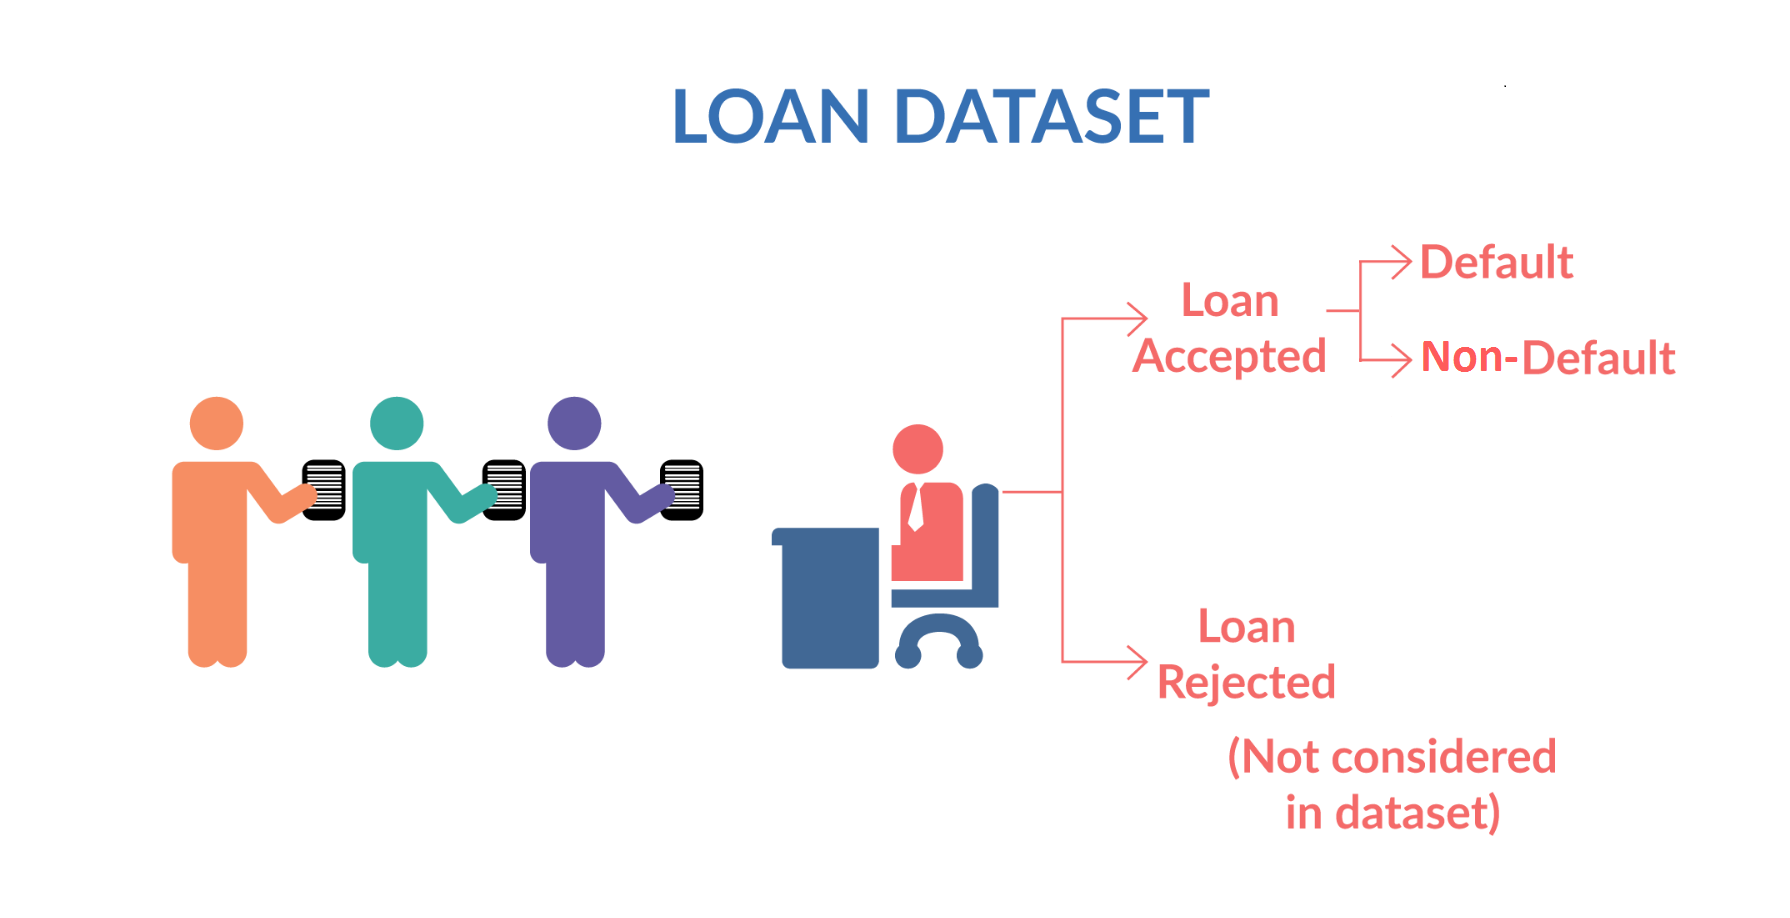

When a person applies for a loan, there are two types of decisions that could be taken by the company:



1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

> *   **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
> *   **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
> *   **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan

2.   **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)



# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.



Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.



If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.



In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

# **Beusiness Objection**

*   Lending Club is the largest online loan marketplace that facilitate personal
*   loans, business loans, and financing of medical procedures.
*   Through this company Borrowers easily access low interest loans through online interface.
*   Like most lending companies, the major source of financial loss in this company is lending loans to risky applicants.
*   The objective of this analysis is to understand driving factors behind loan default to be able to identify risky applicants “defaulted” using risk analytics on collected data from past applicants.

# **Loading Data**

In [401]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [402]:
!ls "/content/drive/MyDrive/upgrad/1.StatisticsEssentials/lendingClubCaseStudy"

 Data_Dictionary.xlsx		    loan.csv
'Lending Club Case Study.gslides'  'ML C56_Facilitator_RastehNili.ipynb'


In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from IPython.display import Javascript
warnings.filterwarnings('ignore')

In [404]:
ROOT_PATH = "/content/drive/MyDrive/upgrad/1.StatisticsEssentials/lendingClubCaseStudy"
df = pd.read_csv(f"{ROOT_PATH}/loan.csv")
df = df.dropna(axis='columns', how='all')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

Get information on the data

In [405]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [406]:
xls = pd.ExcelFile(f"{ROOT_PATH}/Data_Dictionary.xlsx")
print(xls.sheet_names)
loanStatDf = pd.read_excel(xls, sheet_name="LoanStats")
rejctStatDf = pd.read_excel(xls, sheet_name="RejectStats")

['LoanStats', 'RejectStats']


In [407]:
loanStatDf.head(loanStatDf.shape[0])

LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...
115                    NaN                                                NaN
116                    NaN  * Employer Title replaces Employer Name for al...

[117 rows x 2 columns]

In [408]:
rejctStatDf.head(rejctStatDf.shape[0])

RejectStats File                                        Description
0      Amount Requested         The total amount requested by the borrower
1      Application Date               The date which the borrower applied 
2            Loan Title            The loan title provided by the borrower
3            Risk_Score  For applications prior to November 5, 2013 the...
4  Debt-To-Income Ratio  A ratio calculated using the borrower’s total ...
5              Zip Code  The first 3 numbers of the zip code provided b...
6                 State  The state provided by the borrower in the loan...
7     Employment Length  Employment length in years. Possible values ar...
8           Policy Code  publicly available policy_code=1\nnew products...

# **Cleaning Data**

Check Percentage of missing values in each column

In [409]:
percNaDf = (df.isnull().sum()/df.shape[0])*100
percNaDf[percNaDf>0].head(20)

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

Removing columns with more than 90% missing values

In [410]:
df.drop(percNaDf[percNaDf>90].index, axis=1, inplace=True)
df.shape

(39717, 55)

Identify low variant columns

In [411]:
variantDf = df.nunique().sort_values()
variantDf.head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

Remove univariant columns

In [412]:
df = df[variantDf[variantDf > 1].index]
df.shape

(39717, 46)

In [413]:
df.head()

term  pub_rec_bankruptcies verification_status  loan_status  pub_rec  \
0   36 months                   0.0            Verified   Fully Paid        0   
1   60 months                   0.0     Source Verified  Charged Off        0   
2   36 months                   0.0        Not Verified   Fully Paid        0   
3   36 months                   0.0     Source Verified   Fully Paid        0   
4   60 months                   0.0     Source Verified      Current        0   

  home_ownership grade  inq_last_6mths  delinq_2yrs emp_length  ... revol_bal  \
0           RENT     B               1            0  10+ years  ...     13648   
1           RENT     C               5            0   < 1 year  ...      1687   
2           RENT     C               2            0  10+ years  ...      2956   
3           RENT     C               1            0  10+ years  ...      5598   
4           RENT     B               0            0     1 year  ...     27783   

                                                desc  \
0    Borrower added on 12/22/11 > I need to upgra...   
1    Borrower added on 12/22/11 > I plan to use t...   
2                                                NaN   
3    Borrower added on 12/21/11 > to pay for prop...   
4    Borrower added on 12/21/11 > I plan on combi...   

                  emp_title last_pymnt_amnt total_rec_int  total_pymnt_inv  \
0                       NaN          171.62        863.16          5833.84   
1                     Ryder          119.66        435.17          1008.71   
2                       NaN          649.91        605.67          3005.67   
3       AIR RESOURCES BOARD          357.48       2214.92         12231.89   
4  University Medical Group           67.79       1037.39          3513.33   

    total_pymnt                                                url member_id  \
0   5863.155187  https://lendingclub.com/browse/loanDetail.acti...   1296599   
1   1008.710000  https://lendingclub.com/browse/loanDetail.acti...   1314167   
2   3005.666844  https://lendingclub.com/browse/loanDetail.acti...   1313524   
3  12231.890000  https://lendingclub.com/browse/loanDetail.acti...   1277178   
4   3513.330000  https://lendingclub.com/browse/loanDetail.acti...   1311748   

        id  
0  1077501  
1  1077430  
2  1077175  
3  1076863  
4  1075358  

[5 rows x 46 columns]

Find number of unique values

In [414]:
df.nunique().sort_values(ascending=False).head(15)

id                 39717
member_id          39717
url                39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
dtype: int64

In [415]:
print("member_id:", df["member_id"].values)
print("id:", df["id"].values)
print("url:", df["url"].values)

member_id: [1296599 1314167 1313524 ...   90390   89243   86999]
id: [1077501 1077430 1077175 ...   90395   90376   87023]
url: ['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175' ...
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90395'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90376'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=87023']


"member_id", "id" and "url" are variables with all the values being unique. So all of them can be used as the identifier. I will keep the member_id and remove the others, since they don't have any effedct on our analysis.

In [416]:
df.drop(["id", "url"], axis=1, inplace=True)
df.shape

(39717, 44)

In [417]:
print("emp_title:", df["emp_title"].values, ", Number of unique values:", df["emp_title"].nunique(), ", Number of NA's:", df["emp_title"].isnull().sum())
print("title:", df["title"].values, ", Number of unique values:", df["title"].nunique(), ", Number of NA's:", df["title"].isnull().sum())

emp_title: [nan 'Ryder' nan ... nan nan 'Evergreen Center'] , Number of unique values: 28820 , Number of NA's: 2459
title: ['Computer' 'bike' 'real estate business' ... 'MBA Loan Consolidation'
 'JAL Loan' 'Consolidation Loan'] , Number of unique values: 19615 , Number of NA's: 11


emp_title and title columns are string based columns which most of their values are unique. So we can remove them too.

In [418]:
df.drop(["emp_title", "title"], axis=1, inplace=True)
df.shape

(39717, 42)

In [419]:
df.columns

Index(['term', 'pub_rec_bankruptcies', 'verification_status', 'loan_status',
       'pub_rec', 'home_ownership', 'grade', 'inq_last_6mths', 'delinq_2yrs',
       'emp_length', 'purpose', 'sub_grade', 'open_acc', 'addr_state',
       'issue_d', 'total_acc', 'mths_since_last_delinq', 'last_pymnt_d',
       'last_credit_pull_d', 'int_rate', 'earliest_cr_line', 'zip_code',
       'loan_amnt', 'funded_amnt', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 'collection_recovery_fee', 'dti', 'recoveries',
       'annual_inc', 'total_rec_prncp', 'funded_amnt_inv', 'installment',
       'revol_bal', 'desc', 'last_pymnt_amnt', 'total_rec_int',
       'total_pymnt_inv', 'total_pymnt', 'member_id'],
      dtype='object')

In [420]:
print(df.shape)
print(df.duplicated(subset=None, keep='first').count())
print(df.duplicated(subset=["member_id"], keep='first').count())
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=["member_id"], inplace=True)
print(df.shape)

(39717, 42)
39717
39717
(39717, 42)


total_rec_late_fee, recoveries, collection_recovery_fee variables are related

1.   total_rec_late_fee, recoveries, collection_recovery_fee variables are related to the late payment charges. So they will not be useful for estimation of risk association for each participant.

2.   last_credit_pull_d, last_pymnt_d, are dates for last pulled credit and last payments. So they cannot be considered as risk factors.

3.   out_prncp_inv, out_prncp are mainely related to remaining payments. So there is no association between these variables and risk factors.

4.   total_rec_int, total_rec_prncp are general information on the payments recived. So they are not an indicator of risk factors.

Since these variables are not considered as risk factors we can remove them.


In [421]:
notRiskFactor = ["total_rec_int", "total_rec_prncp", "total_rec_late_fee", "recoveries",
                 "collection_recovery_fee", "last_credit_pull_d", "last_pymnt_d", "out_prncp", "out_prncp_inv"]
df.drop(notRiskFactor, axis=1, inplace=True)

print(df.shape)

(39717, 33)


In [422]:
df.head(15)

term  pub_rec_bankruptcies verification_status  loan_status  \
0    36 months                   0.0            Verified   Fully Paid   
1    60 months                   0.0     Source Verified  Charged Off   
2    36 months                   0.0        Not Verified   Fully Paid   
3    36 months                   0.0     Source Verified   Fully Paid   
4    60 months                   0.0     Source Verified      Current   
5    36 months                   0.0     Source Verified   Fully Paid   
6    60 months                   0.0        Not Verified   Fully Paid   
7    36 months                   0.0     Source Verified   Fully Paid   
8    60 months                   0.0     Source Verified  Charged Off   
9    60 months                   0.0            Verified  Charged Off   
10   60 months                   0.0        Not Verified   Fully Paid   
11   36 months                   0.0     Source Verified   Fully Paid   
12   36 months                   0.0     Source Verified  Charged Off   
13   36 months                   0.0     Source Verified   Fully Paid   
14   36 months                   0.0     Source Verified  Charged Off   

    pub_rec home_ownership grade  inq_last_6mths  delinq_2yrs emp_length  ...  \
0         0           RENT     B               1            0  10+ years  ...   
1         0           RENT     C               5            0   < 1 year  ...   
2         0           RENT     C               2            0  10+ years  ...   
3         0           RENT     C               1            0  10+ years  ...   
4         0           RENT     B               0            0     1 year  ...   
5         0           RENT     A               3            0    3 years  ...   
6         0           RENT     C               1            0    8 years  ...   
7         0           RENT     E               2            0    9 years  ...   
8         0            OWN     F               2            0    4 years  ...   
9         0           RENT     B               0            0   < 1 year  ...   
10        0            OWN     C               2            0    5 years  ...   
11        0            OWN     B               0            0  10+ years  ...   
12        0           RENT     C               1            0   < 1 year  ...   
13        0           RENT     B               2            0    3 years  ...   
14        0           RENT     B               2            0    3 years  ...   

      dti annual_inc  funded_amnt_inv installment revol_bal  \
0   27.65    24000.0           4975.0      162.87     13648   
1    1.00    30000.0           2500.0       59.83      1687   
2    8.72    12252.0           2400.0       84.33      2956   
3   20.00    49200.0          10000.0      339.31      5598   
4   17.94    80000.0           3000.0       67.79     27783   
5   11.20    36000.0           5000.0      156.46      7963   
6   23.51    47004.0           7000.0      170.08     17726   
7    5.35    48000.0           3000.0      109.43      8221   
8    5.55    40000.0           5600.0      152.39      5210   
9   18.08    15000.0           5350.0      121.45      9279   
10  16.12    72000.0           6500.0      153.45      4032   
11  10.78    75000.0          12000.0      402.54     23336   
12  10.08    30000.0           9000.0      305.38     10452   
13  12.56    15000.0           3000.0       96.68      7323   
14   7.06   100000.0          10000.0      325.74     11997   

                                                 desc  last_pymnt_amnt  \
0     Borrower added on 12/22/11 > I need to upgra...           171.62   
1     Borrower added on 12/22/11 > I plan to use t...           119.66   
2                                                 NaN           649.91   
3     Borrower added on 12/21/11 > to pay for prop...           357.48   
4     Borrower added on 12/21/11 > I plan on combi...            67.79   
5                                                 NaN           161.03   
6     Borrower ad

From variables left loan status is very important since we are only interested in the loans have diffinite answer of being payed off or are defaulted.


In [423]:
print(df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


There are three different levels for loans status; Fully Paid, Charged off and current. Fully Paid and Charged off are considered as those loans that the result is cleared out as being defaulted or not but the current ones we do not know what would be the final result. So lenders that the status of their loan is current will be removed from the data.

In [424]:
df = df[df.loan_status!="Current"]
df.shape

(38577, 33)

From remaining subjects we want to identify percentage of missing values in each row. If there is a low percentage of rows have missing values since we have 39717 rows, we better to remove those rows instead of introducing bias to the analysis by applying imputation.

In [425]:
perceSubjNull = round((df.isnull().values.ravel().sum()/len(df.index))*100, 2)
perceSubjNull

101.65

Less than 5% of rows have missing values. We check the columns these missing values are blong to. If we can recover these missing values from other information we will do. If we can not and they are vital information it is better to remove them.  and remove them if they

In [426]:
# Columns that have missing values
# print(round(df.isnull().sum()), 2)
percNaCol = round(100*(df.isnull().sum()/len(df.index)), 2)
percNaCol[percNaCol>0]

pub_rec_bankruptcies       1.81
emp_length                 2.68
mths_since_last_delinq    64.56
revol_util                 0.13
desc                      32.47
dtype: float64

The desc variable is a Loan description provided by the borrower and it has high variation. So it is not a risk factor and we can remove it.

In [427]:
df.desc.nunique()

25803

In [428]:
df.columns

Index(['term', 'pub_rec_bankruptcies', 'verification_status', 'loan_status',
       'pub_rec', 'home_ownership', 'grade', 'inq_last_6mths', 'delinq_2yrs',
       'emp_length', 'purpose', 'sub_grade', 'open_acc', 'addr_state',
       'issue_d', 'total_acc', 'mths_since_last_delinq', 'int_rate',
       'earliest_cr_line', 'zip_code', 'loan_amnt', 'funded_amnt',
       'revol_util', 'dti', 'annual_inc', 'funded_amnt_inv', 'installment',
       'revol_bal', 'desc', 'last_pymnt_amnt', 'total_pymnt_inv',
       'total_pymnt', 'member_id'],
      dtype='object')

emp_length: Employment length in years.

revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

pub_rec_bankruptcies: Number of public record bankruptcies.

All of these informations are all vital information. Since missing values for revol_util is less than 0.5% we can remove rows with missing values for that column.



In [429]:
df.dropna(axis=0, subset=["revol_util"], inplace=True)
df.revol_util.isna().sum()

0

In [430]:
# Columns that have missing values
percNaCol = round(100*(df.isnull().sum()/len(df.index)), 2)
percNaCol[percNaCol>0]

pub_rec_bankruptcies       1.81
emp_length                 2.67
mths_since_last_delinq    64.55
desc                      32.47
dtype: float64

In [431]:
df.mths_since_last_delinq.unique()

array([ nan,  35.,  61.,   8.,  20.,  18.,  45.,  38.,  48.,  41.,  40.,
        74.,  25.,  53.,  39.,  10.,  26.,  77.,  28.,  56.,  52.,  24.,
        16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  22.,  59.,
        79.,  44.,  57.,  14.,  63.,  49.,  15.,  73.,  70.,  29.,  51.,
         5.,  75.,  55.,   2.,  30.,  47.,  69.,   4.,  43.,  33.,  21.,
        27.,  46.,  81.,  68.,  78.,  82.,  31.,  64.,  76.,  62.,  72.,
        42.,  50.,   3.,  12.,  34.,  58.,  17.,  71.,  66.,  32.,   6.,
        80.,  36.,  37.,   7.,  67.,   1.,  83.,  86., 115.,  96., 120.,
       106.,  89., 103., 107.,  85.,  97.,  95.,   0.])

Now we want to see how many subjects having missing values for both bakrupcies and employment lenght

In [432]:
df[["pub_rec_bankruptcies", "emp_length", "mths_since_last_delinq"]].isnull().all(1).sum()

0

Since these two variables are categorical and we don't know the value for them we can fill the null values by an string such as: "Not Known"

In [433]:

df["pub_rec_bankruptcies"].fillna('Not Known',inplace=True)
# df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].str.replace(".0", "")
df["emp_length"].fillna('Not Known',inplace=True)

# df["mths_since_last_delinq"].fillna('Not Known',inplace=True)

print(df.pub_rec_bankruptcies.unique())
print(df.emp_length.unique())
# print(df.mths_since_last_delinq.unique())

[0.0 1.0 2.0 'Not Known']
['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' 'Not Known']


Now we want to find number of factors for categorical (string base) columns

In [434]:
print(df.dtypes)

term                       object
pub_rec_bankruptcies       object
verification_status        object
loan_status                object
pub_rec                     int64
home_ownership             object
grade                      object
inq_last_6mths              int64
delinq_2yrs                 int64
emp_length                 object
purpose                    object
sub_grade                  object
open_acc                    int64
addr_state                 object
issue_d                    object
total_acc                   int64
mths_since_last_delinq    float64
int_rate                   object
earliest_cr_line           object
zip_code                   object
loan_amnt                   int64
funded_amnt                 int64
revol_util                 object
dti                       float64
annual_inc                float64
funded_amnt_inv           float64
installment               float64
revol_bal                   int64
desc                       object
last_pymnt_amn

In [435]:
print(df['term'].unique())

[' 36 months' ' 60 months']


Term is a categorical column with two factors. There is an extra spacea at the begining of each category so we need to remove those spaces

In [436]:
df["term"] = df.term.str.strip()
print(df['term'].unique())

['36 months' '60 months']


issue_d: The month which the loan was funded

earliest_cr_line: The month the borrower's earliest reported credit line was opened

issue_d and earliest_cr_line are date columns that can be splited to month and year

**There are Some years that are being converted to more than 2023 since they belong to befor unix time stamp.
So subtracting 100 from those years will give us more accurate results.**

In [437]:

df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%y")

df["issue_year"] = df["issue_d"].dt.year
df["issue_year"] = df["issue_year"].apply(lambda x: x-100 if x > 2023 else x)

df["issue_month"] = df["issue_d"].dt.month

# print(df[["issue_d", "issue_year"]])

df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%y")

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_year"] = df["earliest_cr_line_year"].apply(lambda x: x-100 if x > 2023 else x)

df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month

df.drop(["issue_d", "earliest_cr_line"], axis=1, inplace=True)
print(df.earliest_cr_line_year.unique(), df.issue_year.unique())


[1985 1999 2001 1996 2004 2005 2007 1998 1989 2003 1991 1993 1997 1983
 2002 1984 2006 1987 1981 2000 1994 1995 1992 1986 1990 1988 1980 2008
 1979 1978 1971 1972 1970 1969 1975 1982 1976 1977 1962 1973 1968 1974
 1967 1965 1963 1954 1966 1964 1959 1956 1946 1950 1961] [2011 2010 2009 2008 2007]


In [438]:
print(df.revol_util.unique())
print(df.revol_util.nunique())

print(df.int_rate.unique())
print(df.int_rate.nunique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
1088
['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '20.89%' '20.30%' '23.91%' '19.03%' '23.13%' '22.74%' '22.35%'
 '22.06%' '24.11%' '6.00%' '23.52%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '19.29%'
 '13.99%' '18.39%' '16.89%' '17.99%' '20.99%' '22.85%' '19.69%' '20.62%'
 '20.25%' '21.36%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.40%' '21.48%' '14.82%' '14.17%'
 '7.29%' '17.88%' '20.11%' '16.02%' '13.43%' '14.91%' '13.06%' '15.28%'
 '15.6

revol_util and int_rate are numerical columns that because of % sign been presented as string based column. So we need to remove the % from these columns and convert ithem to numerical.

In [439]:
df["revol_util"] = df["revol_util"].str.replace("%", "").astype(float)
df["int_rate"] = df["int_rate"].str.replace("%", "").astype(float)

# **Univariate Analysis**

### **For Numerical variables**: Get general idea about all the numerical variables

In [440]:
# numericalCols = ["issue_year", "issue_month", "earliest_cr_line_year", "earliest_cr_line_month",
#                  "pub_rec", "delinq_2yrs", "inq_last_6mths", "open_acc", "total_acc",
#                  "int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti", "annual_inc",
#                  "funded_amnt_inv", "installment", "last_pymnt_amnt", "total_pymnt",
#                  "total_pymnt_inv"]
numericalCols = ["int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti", "annual_inc",
                 "funded_amnt_inv", "installment", "last_pymnt_amnt", "total_pymnt",
                 "total_pymnt_inv", "mths_since_last_delinq"]

df[numericalCols].describe()

int_rate     loan_amnt   funded_amnt    revol_util           dti  \
count  38527.000000  38527.000000  38527.000000  38527.000000  38527.000000   
mean      11.927378  11055.265139  10791.956939     48.702777     13.276353   
std        3.690161   7348.433587   7090.256225     28.364741      6.671392   
min        5.420000    500.000000    500.000000      0.000000      0.000000   
25%        8.940000   5325.000000   5200.000000     25.200000      8.140000   
50%       11.710000   9600.000000   9600.000000     49.100000     13.370000   
75%       14.350000  15000.000000  15000.000000     72.300000     18.560000   
max       24.400000  35000.000000  35000.000000     99.900000     29.990000   

         annual_inc  funded_amnt_inv   installment  last_pymnt_amnt  \
count  3.852700e+04     38527.000000  38527.000000     38527.000000   
mean   6.880923e+04     10230.940095    322.678650      2749.201526   
std    6.421493e+04      7022.678989    208.649278      4496.740039   
min    4.000000e+03         0.000000     15.690000         0.000000   
25%    4.000000e+04      5000.000000    165.740000       217.775000   
50%    5.900000e+04      8750.000000    278.150000       569.030000   
75%    8.200000e+04     14000.000000    425.860000      3451.365000   
max    6.000000e+06     35000.000000   1305.190000     36115.200000   

        total_pymnt  total_pymnt_inv  mths_since_last_delinq  
count  38527.000000     38527.000000            13659.000000  
mean   11876.606662     11281.016641               35.878834  
std     8810.442949      8701.345967               22.027031  
min        0.000000         0.000000                0.000000  
25%     5519.447680      5031.275000               18.000000  
50%     9685.515720      9076.500000               34.000000  
75%    16147.246055     15341.180000               52.000000  
max    58563.679930     58563.680000              120.000000

The distribution and possible outliers in each of these continues variables will be investigated using histogram and box plot. Aside from identifying possible outlier we need to look at the distribution of the data to be able to:

1.   Identify ant skwednes or possible divergence to specific value
2.   Check the normality for selecting proper statistical tests



In [441]:
def dist_investigate(data, label):
  plt.figure(figsize=(16,4))

  plt.subplot(1,2,1)
  sns.distplot(data)
  plt.xlabel(label)

  plt.subplot(1,2,2)
  sns.boxplot(data)
  plt.xlabel(label)

  plt.gca().set_xticklabels([])
  plt.suptitle(label, fontsize=20, fontweight="bold")
  plt.show()

In [553]:
# continuesDict = {"Interest Rate": "int_rate", "Loan Amount": "loan_amnt", "Funded Loan Amount":"funded_amnt",
#                     "Loan Used Relative to Available": "revol_util", "Ration Debt to Income":"dti",
#                     "Anual Income":"annual_inc", "Funded Amount by Investors":"funded_amnt_inv", "Installment": "installment",
#                     "Last Payment Amount":"last_pymnt_amnt", "Total Payment Recieved Today": "total_pymnt",
#                     "Payment Recieved For Funded Proportion" :"total_pymnt_inv", "Total Credit Revolving Balance": "revol_bal",
#                     "Number of Months from Last deliguency":"mths_since_last_delinq"}
continuesDict = {"Loan Amount": "loan_amnt", "Funded Loan Amount":"funded_amnt",
                    "Anual Income":"annual_inc", "Funded Amount Investment":"funded_amnt_inv",
                    "Installment": "installment", "Total Payment Recieved Today": "total_pymnt",
                    "Payment Recieved For Funded Proportion" :"total_pymnt_inv",
                    "Total Credit Revolving Balance": "revol_bal",
                    "Number of Months from Last deliguency":"mths_since_last_delinq"

<IPython.core.display.Javascript object>

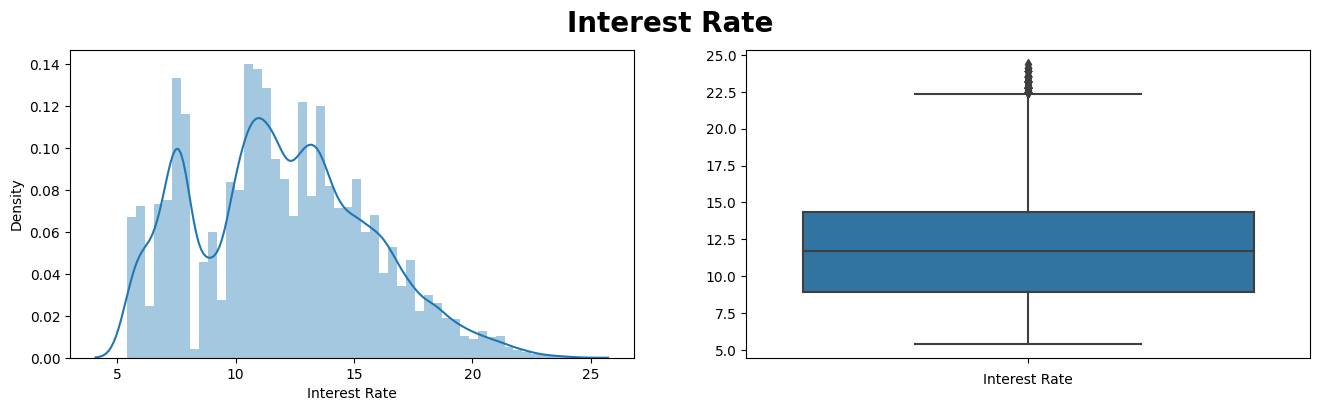

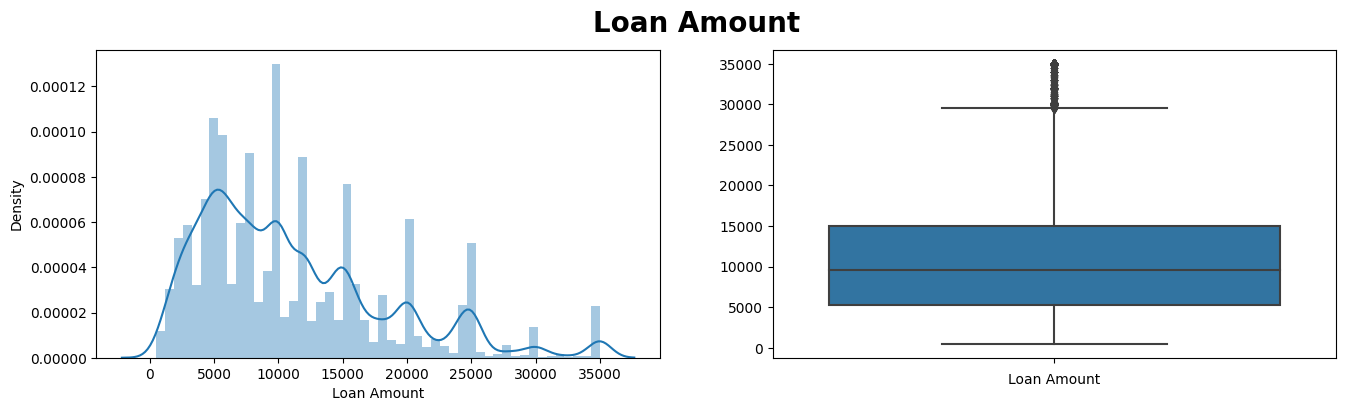

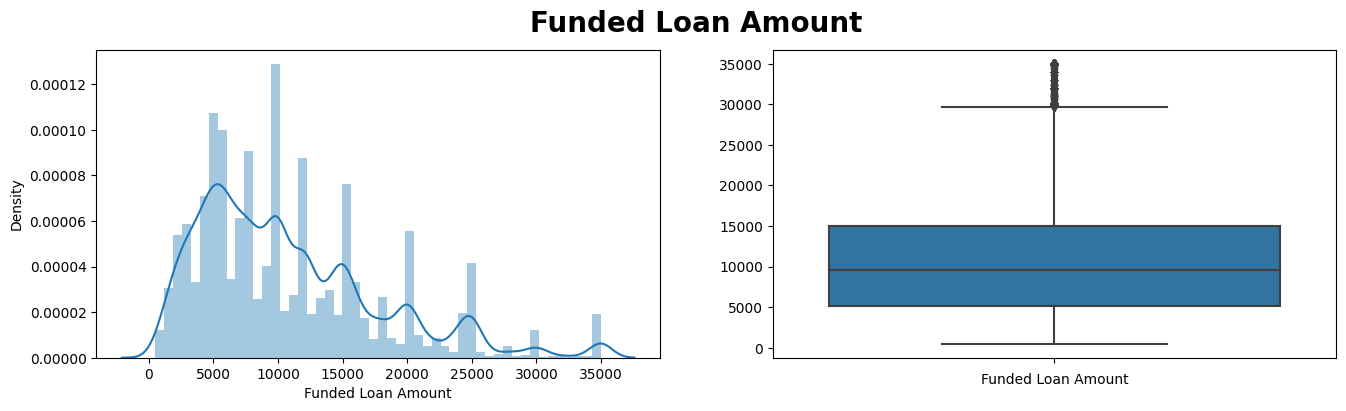

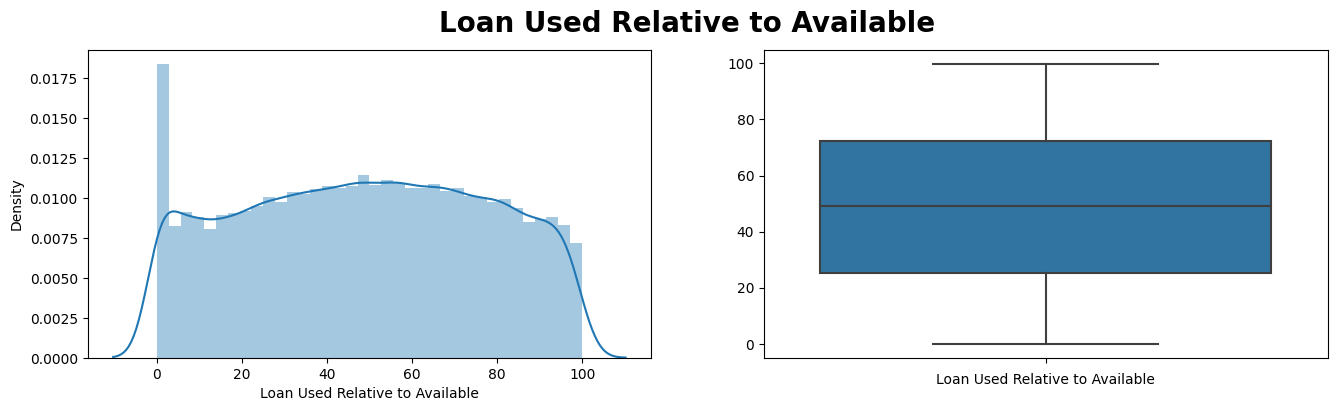

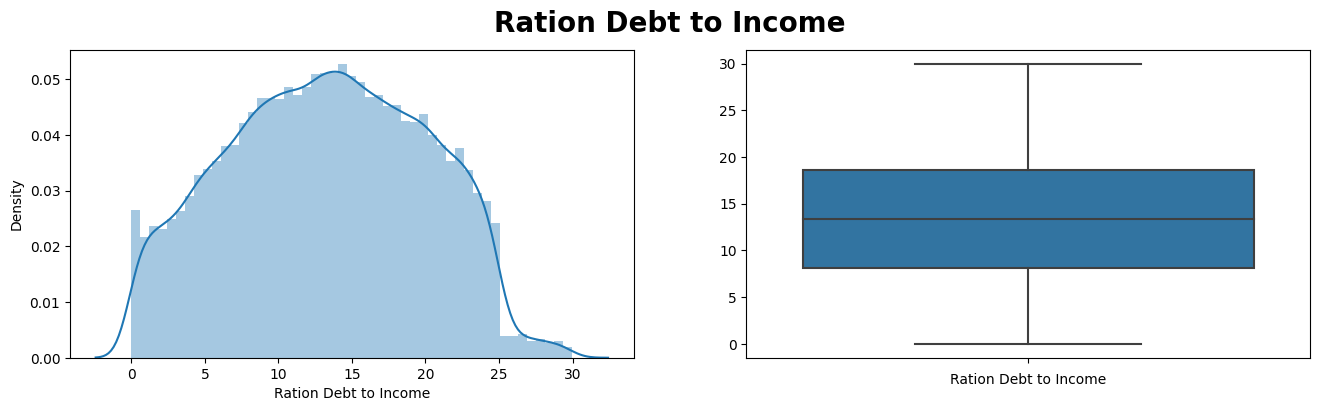

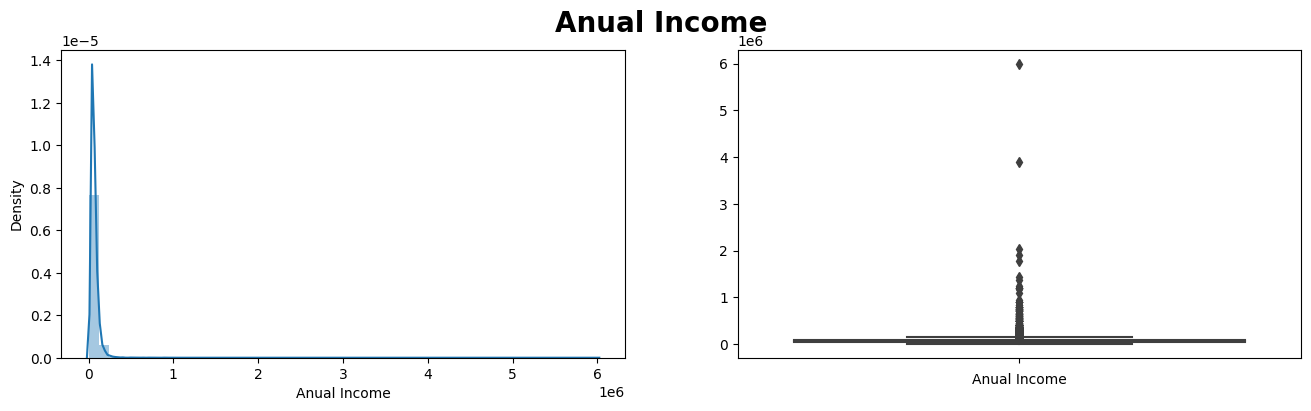

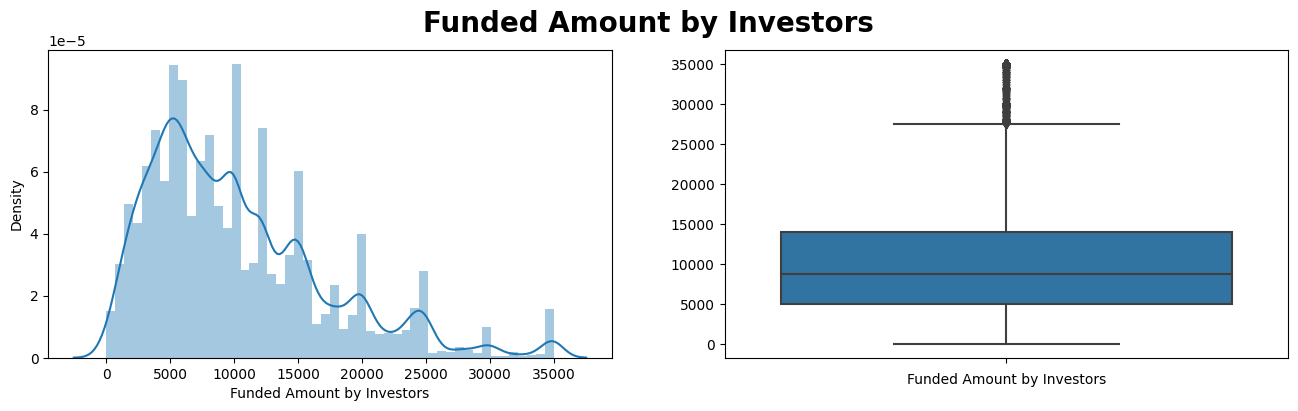

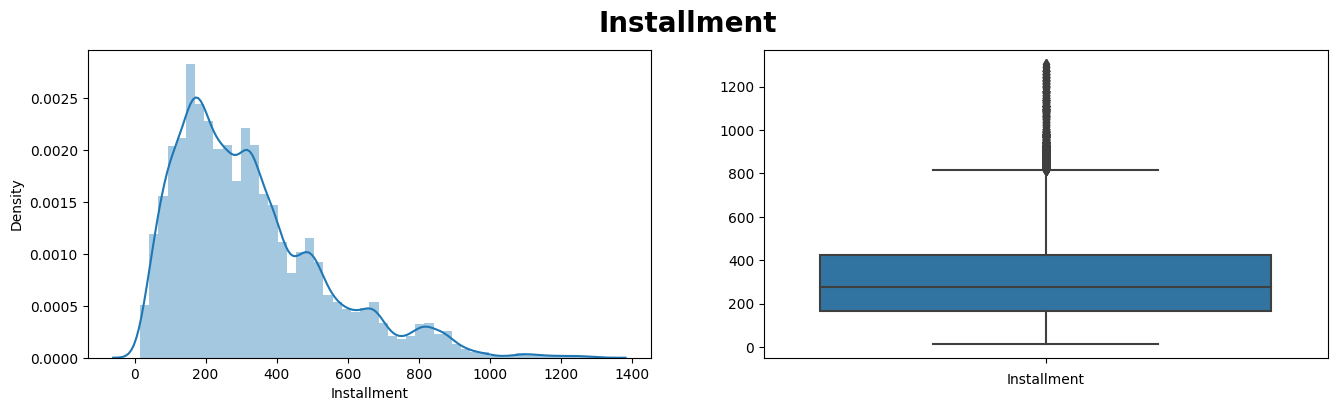

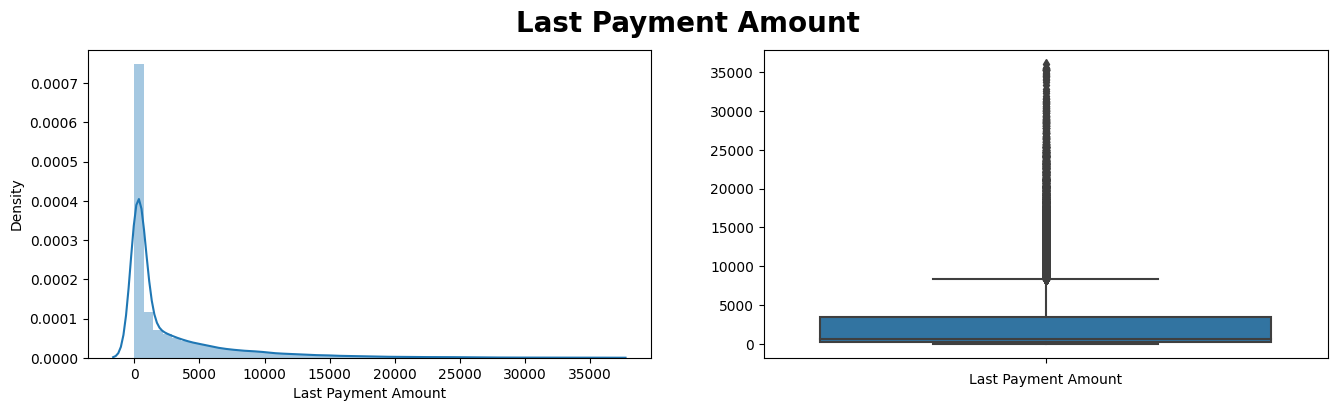

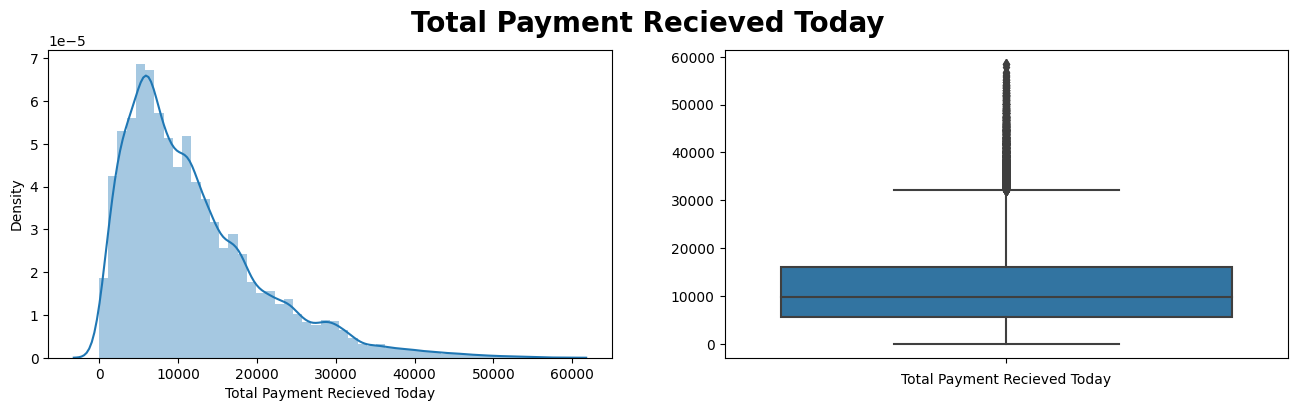

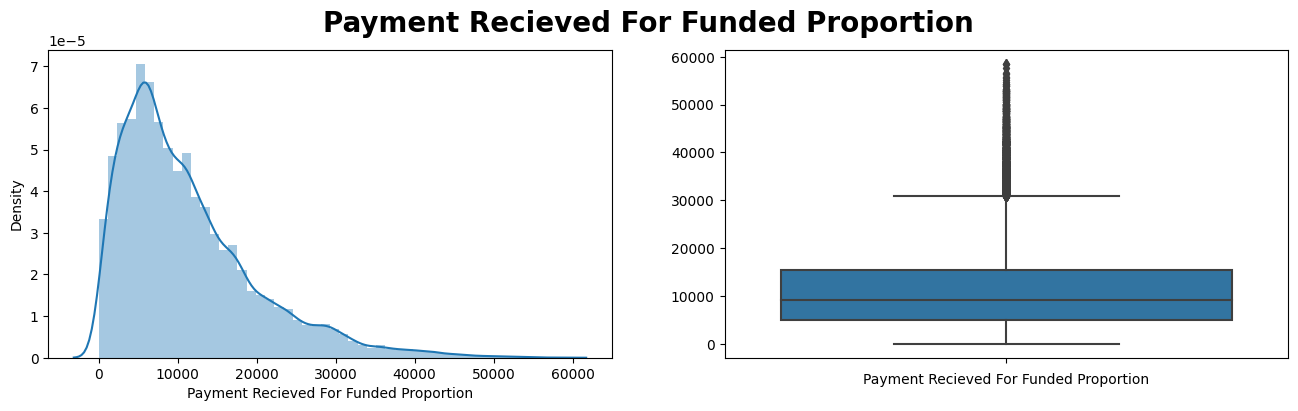

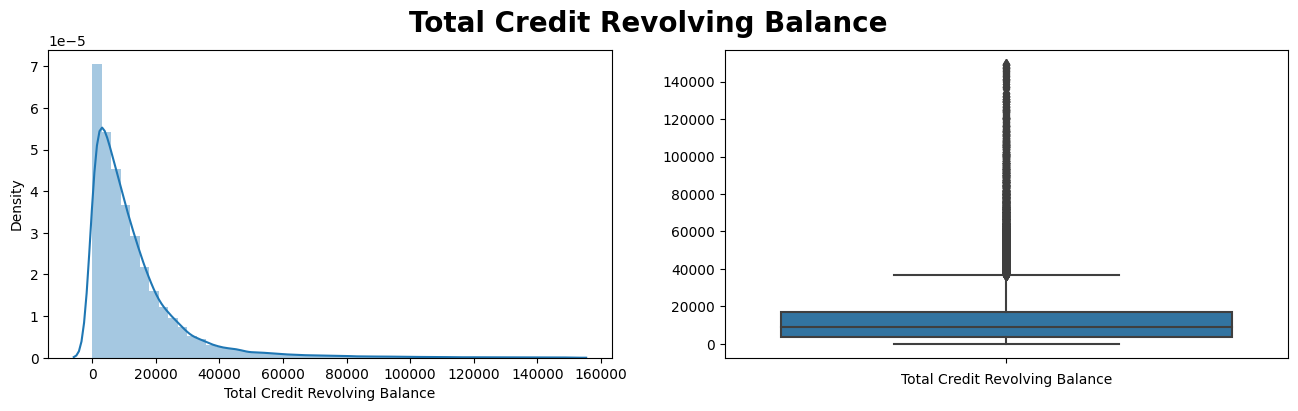

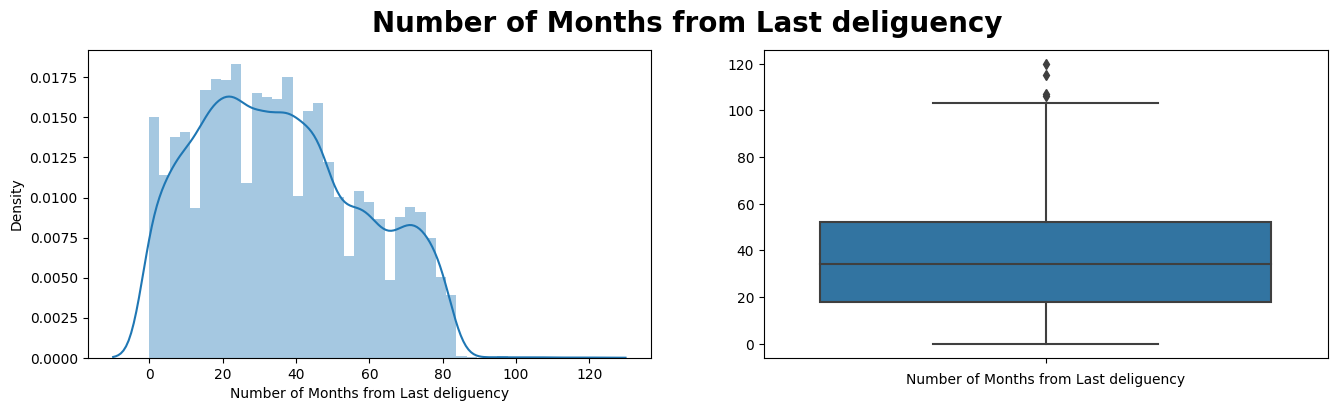

In [443]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
for k in continuesDict.keys():
  dist_investigate(df[continuesDict[k]], k)

## **Outlier Removal**

There are some very large outliers in all of the continues variables with the exception of Loan used relative to availability and ration debt obligation. We would remove these outlier by removing values grater than 99 percentile for interest rate and 95 for the rest of variables. For last payment amount we can put the upper threshold at 90 percentile. Since we don't have any outlier in lower bond we will put the lower threshold as 0. Then check the distribution after outlier removal.

In [580]:
def removeOutlier(data, lowT=0.01, upT=0.99):
  lower = data.quantile(lowT)
  upper = data.quantile(upT)
  data = np.where(data >= upper,
        upper,
        np.where(data <= lower,
        lower,
        data))
  return data

# def removeOutlier(data, lowT=0.01, upT=0.99):
#   lower = data.mean() - 3*data.std()
#   upper = data.mean() + 3*data.std()
#   data = np.where(data >= upper,
#         upper,
#         np.where(data <= lower,
#         lower,
#         data))
#   return data



<IPython.core.display.Javascript object>

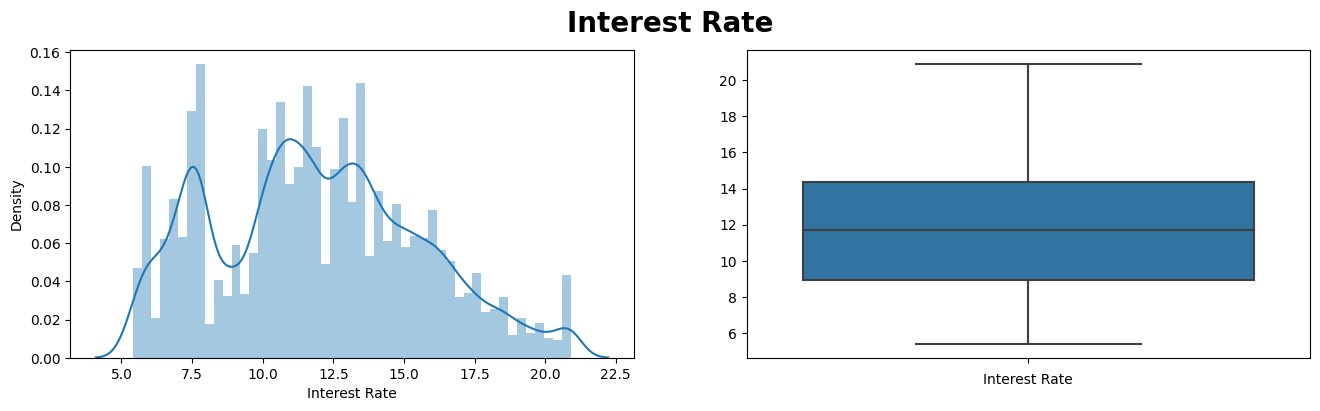

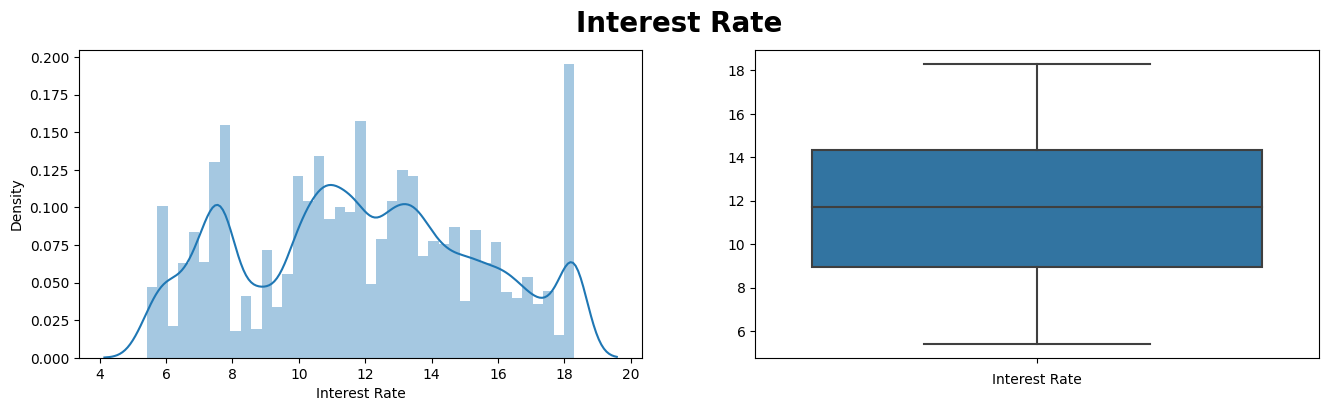

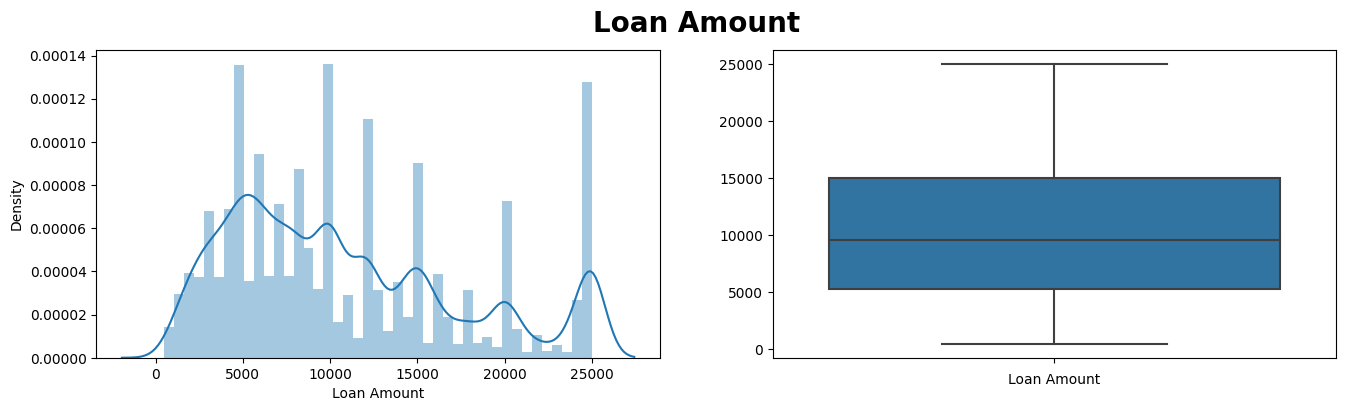

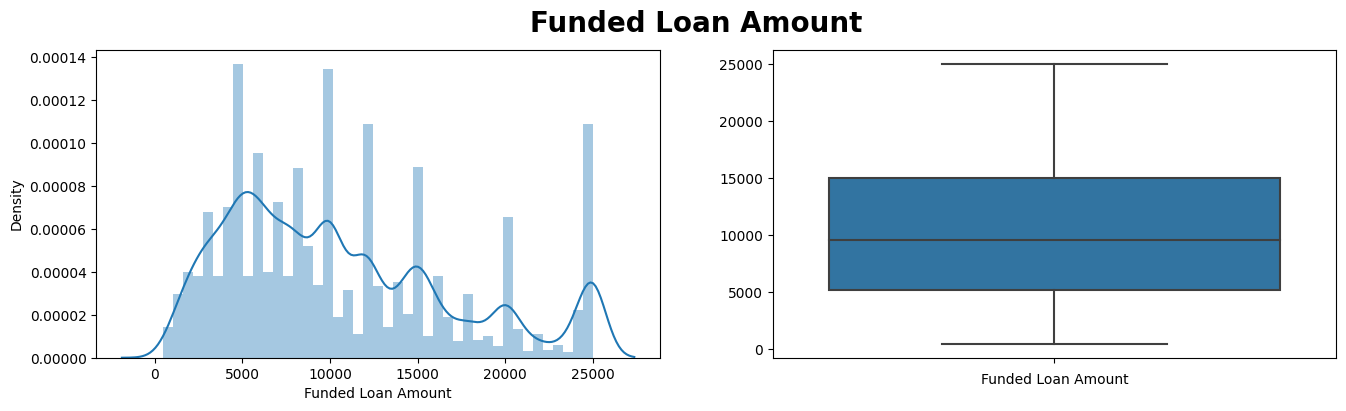

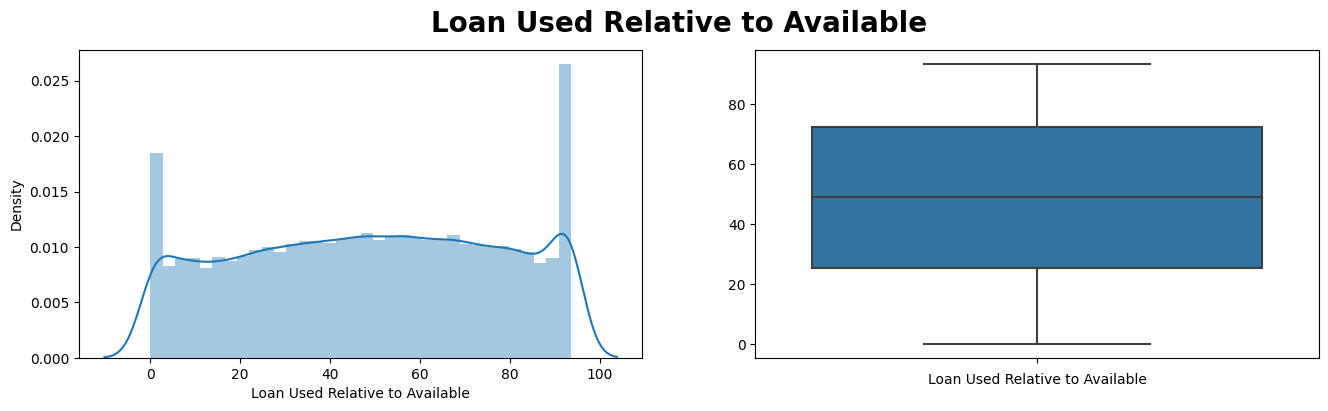

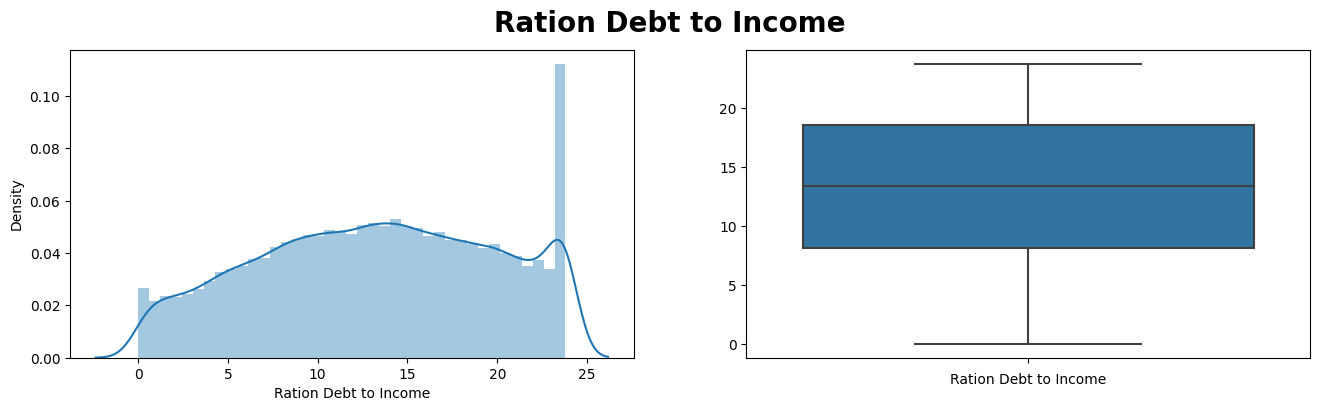

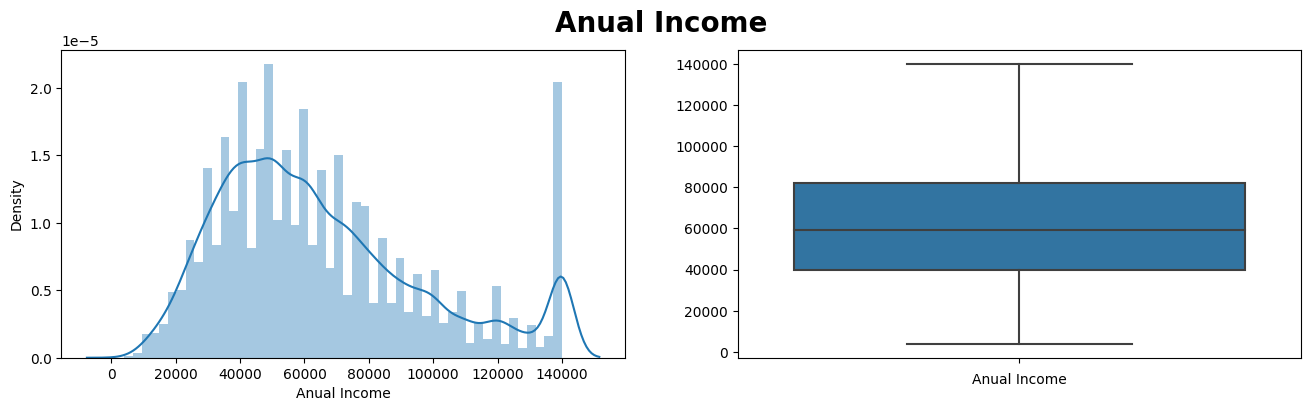

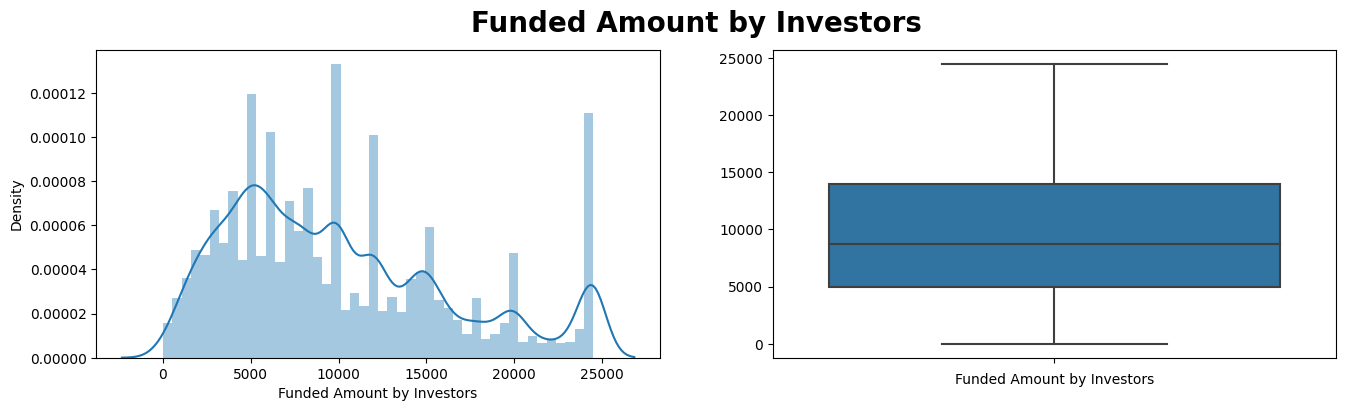

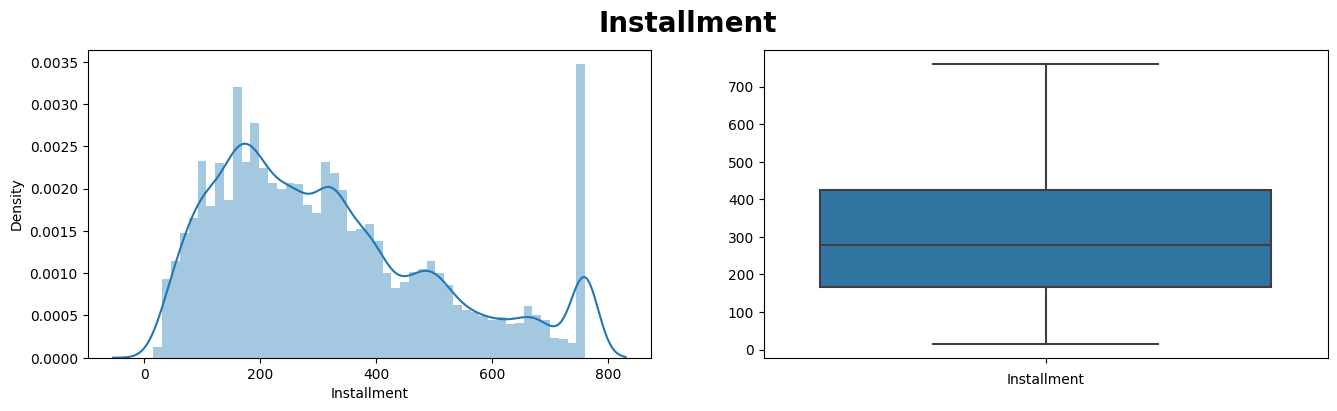

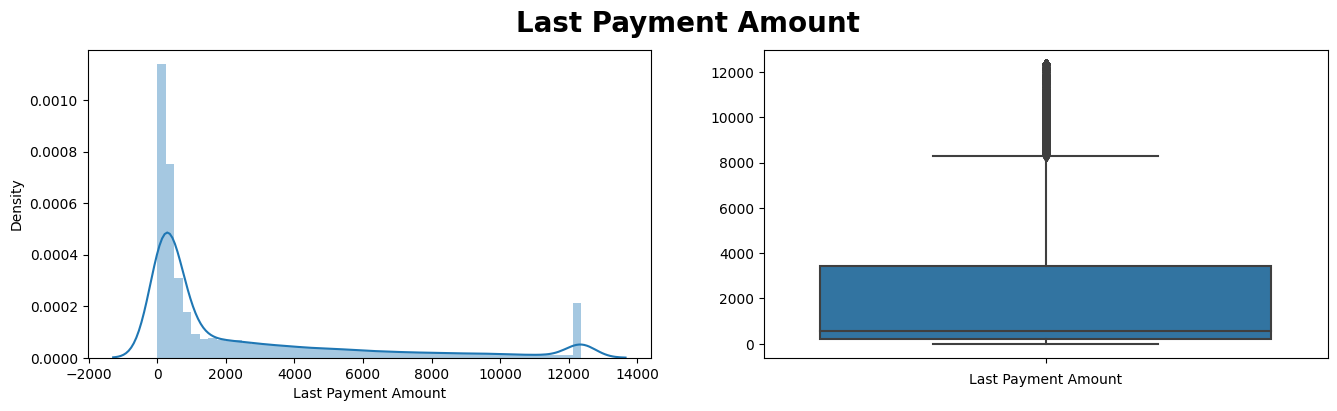

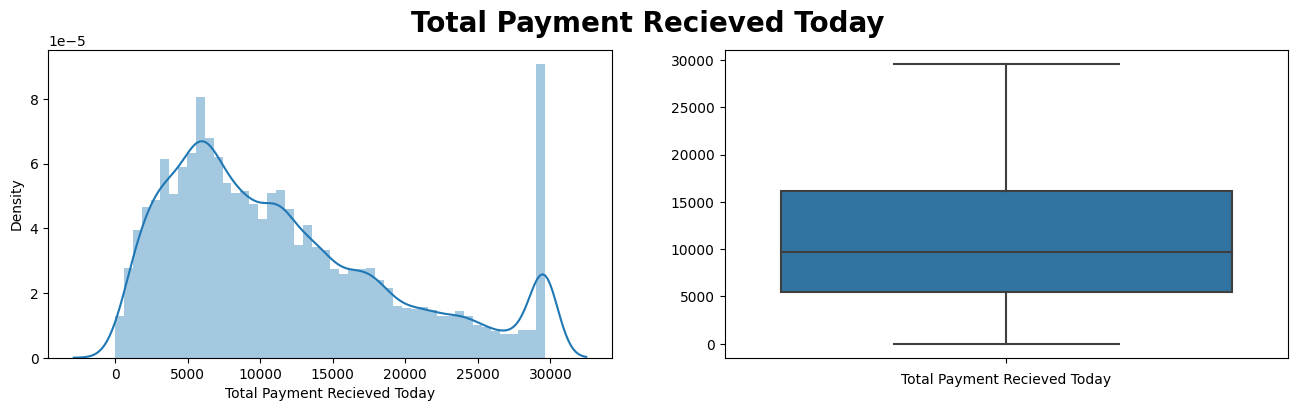

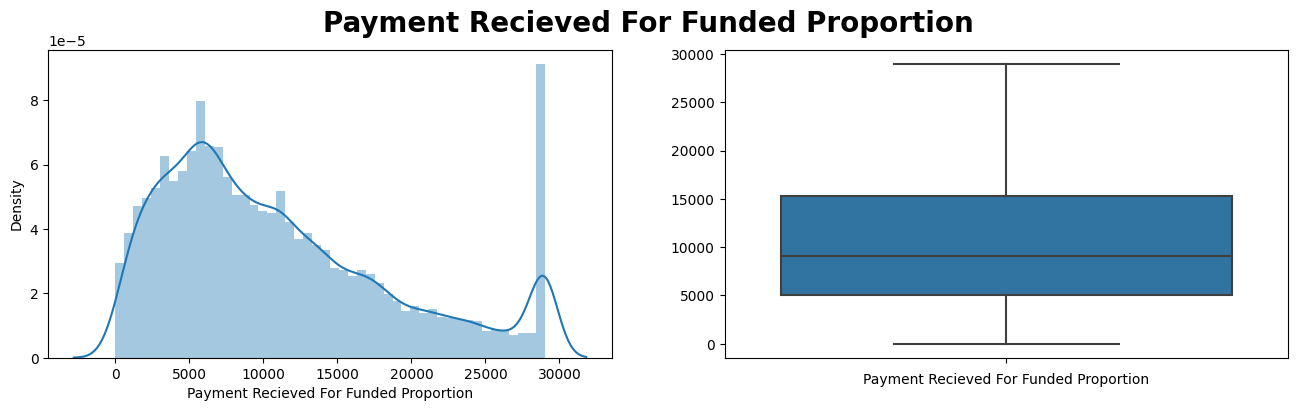

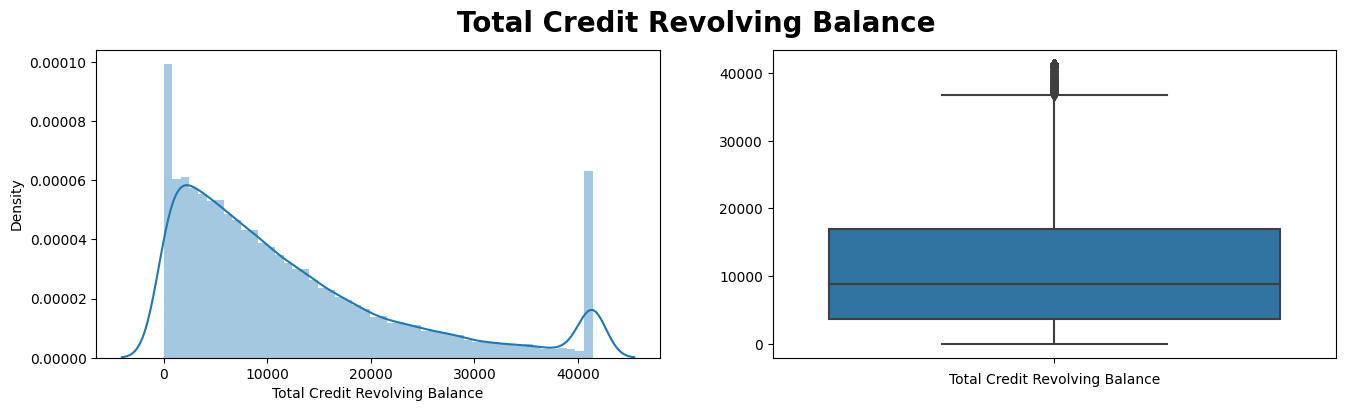

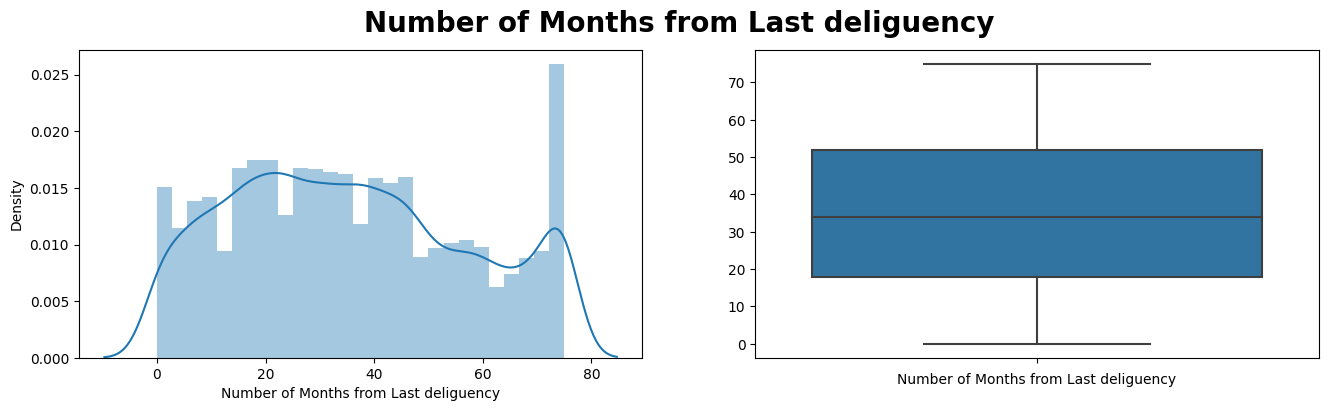

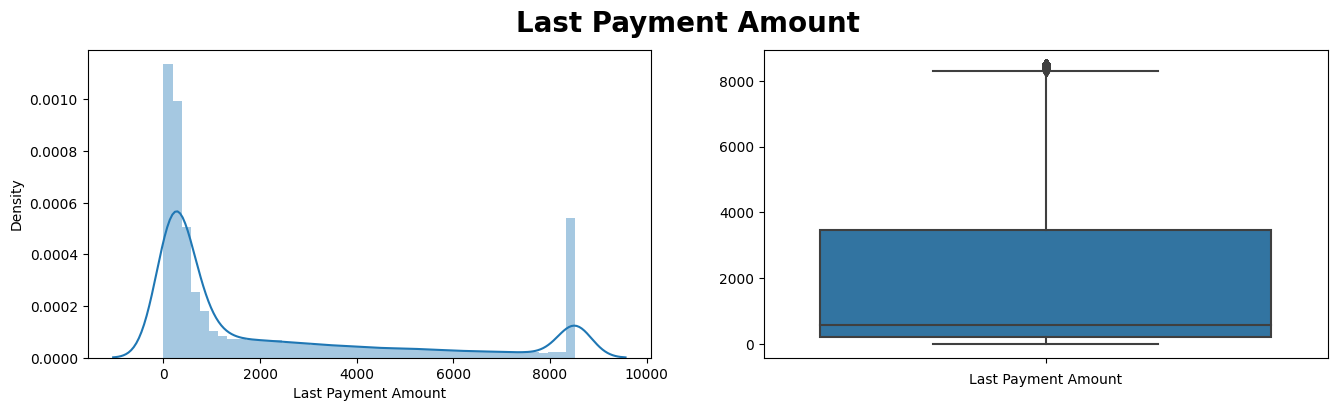

In [554]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
data = removeOutlier(df["int_rate"], lowT=0)
dist_investigate(data, "Interest Rate")

for k in distributionDict.keys():
  data = removeOutlier(df[continuesDict[k]], lowT=0, upT=0.95)
  dist_investigate(data, k)

data = removeOutlier(df["last_pymnt_amnt"], lowT=0, upT=0.9)
dist_investigate(data, "Last Payment Amount")

### **For categorical variables**: Get general idea about all the categorical variables

In [446]:
def countPlots(data, target, title):

  porcent = data[target].value_counts(normalize=True)*100
  labels = data[target].unique()

  # porcent = 100.*counts/counts.sum()

  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  sns.countplot(x=target, data=data, dodge=True, palette="mako_r")
  plt.tick_params(axis='x', rotation=90)

  plt.subplot(1,2,2)
  patches, texts = plt.pie(porcent, radius=1.5)
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(porcent.index, porcent)]

  sort_legend = True
  if sort_legend:
      patches, labels, dummy =  zip(*sorted(zip(patches, labels, porcent),
                                            key=lambda x: x[2],
                                            reverse=True))

  plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.show()

def barPlots(data, target, title):

  plt.figure(figsize=(16,4))
  sns.countplot(x=target, data=data, palette="mako_r")
  plt.tick_params(axis='x', rotation=90)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.show()

<IPython.core.display.Javascript object>

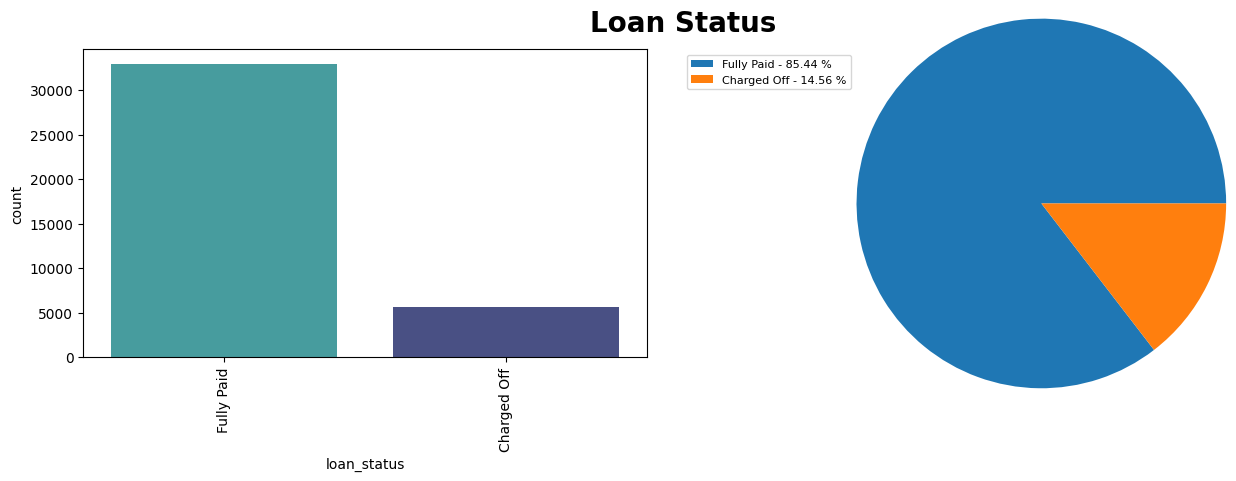

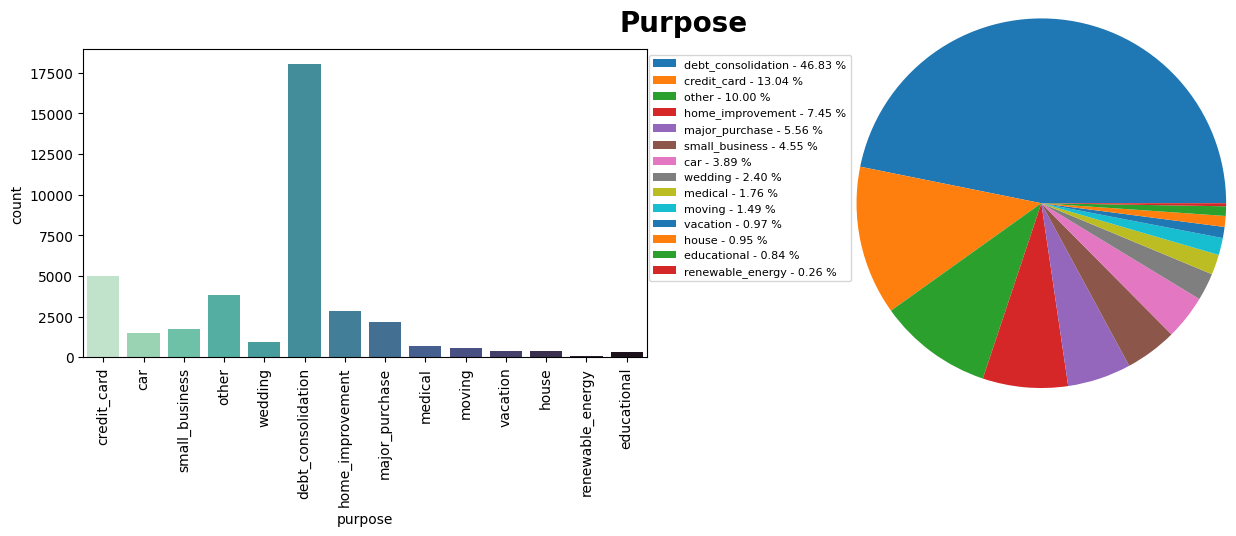

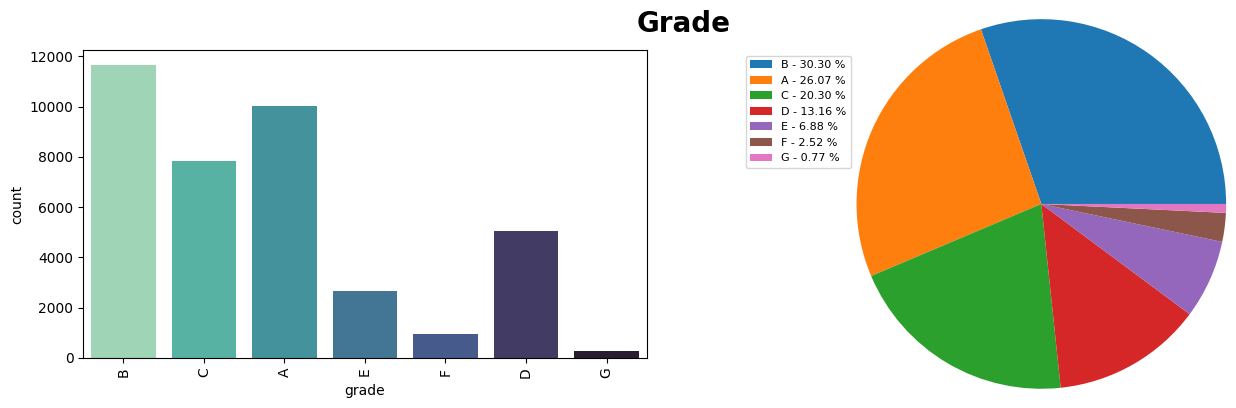

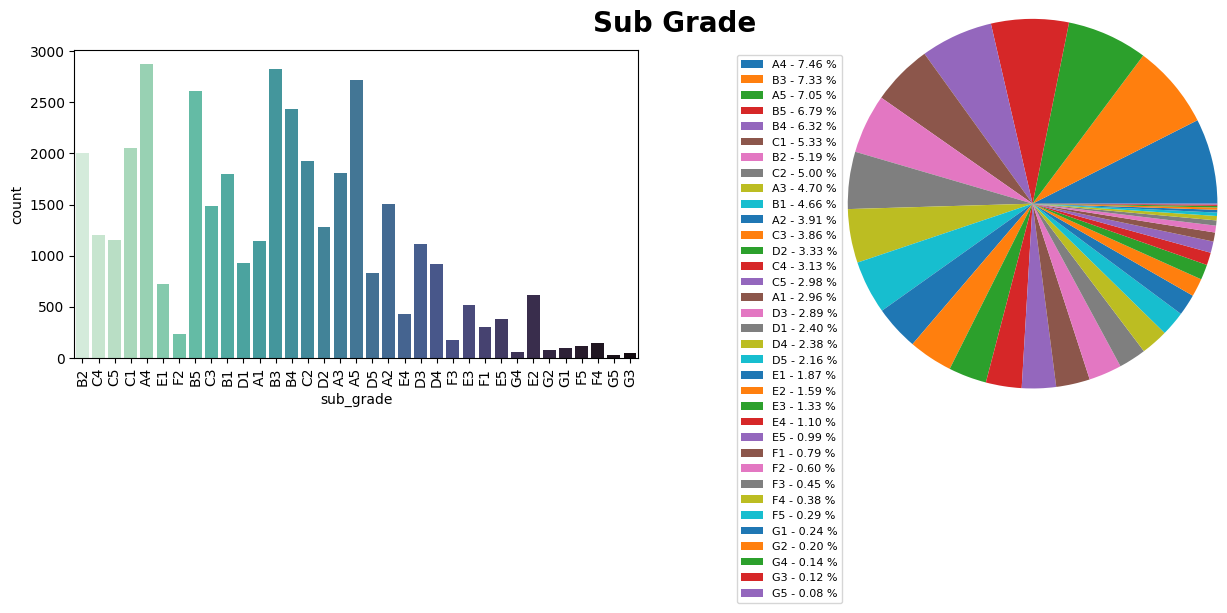

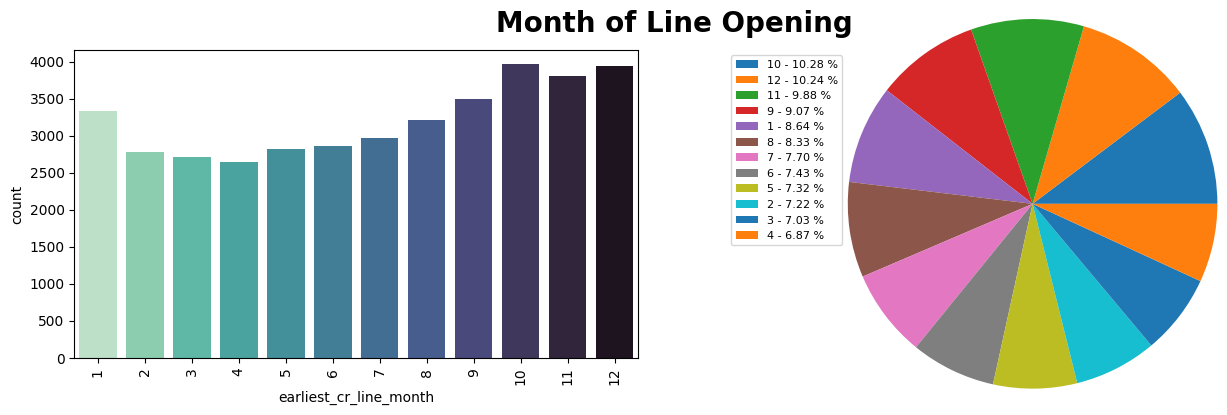

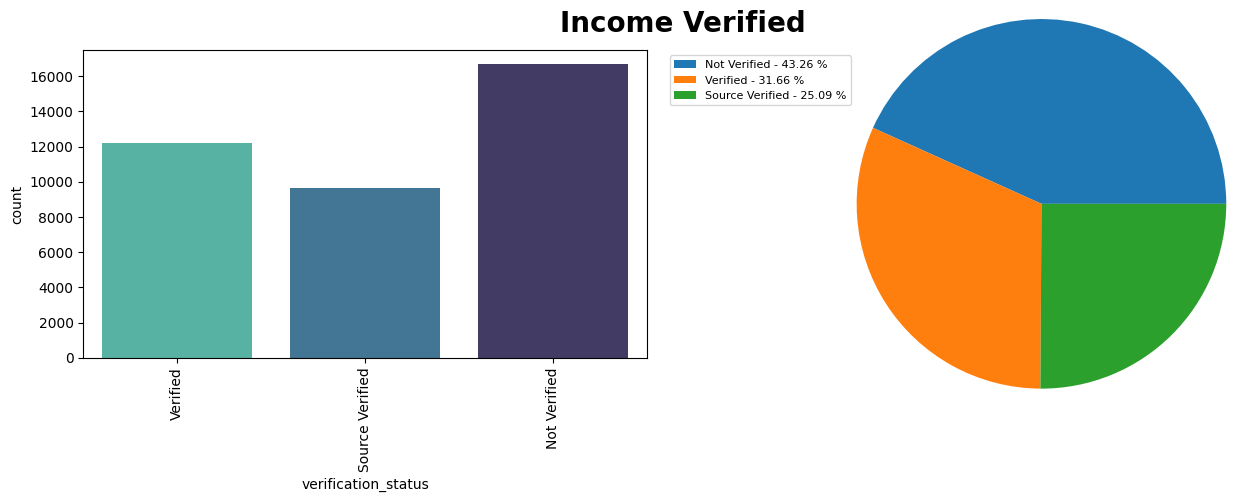

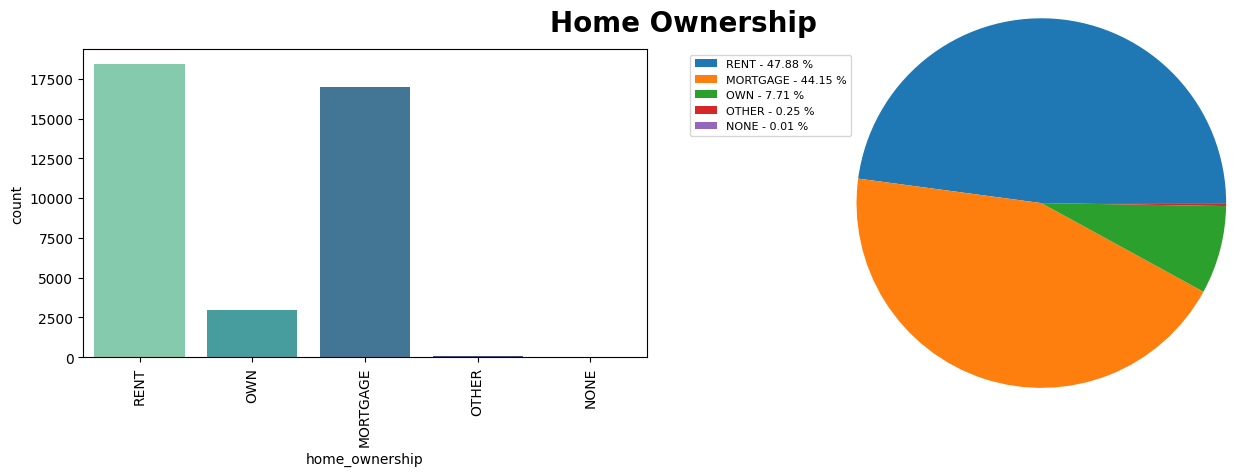

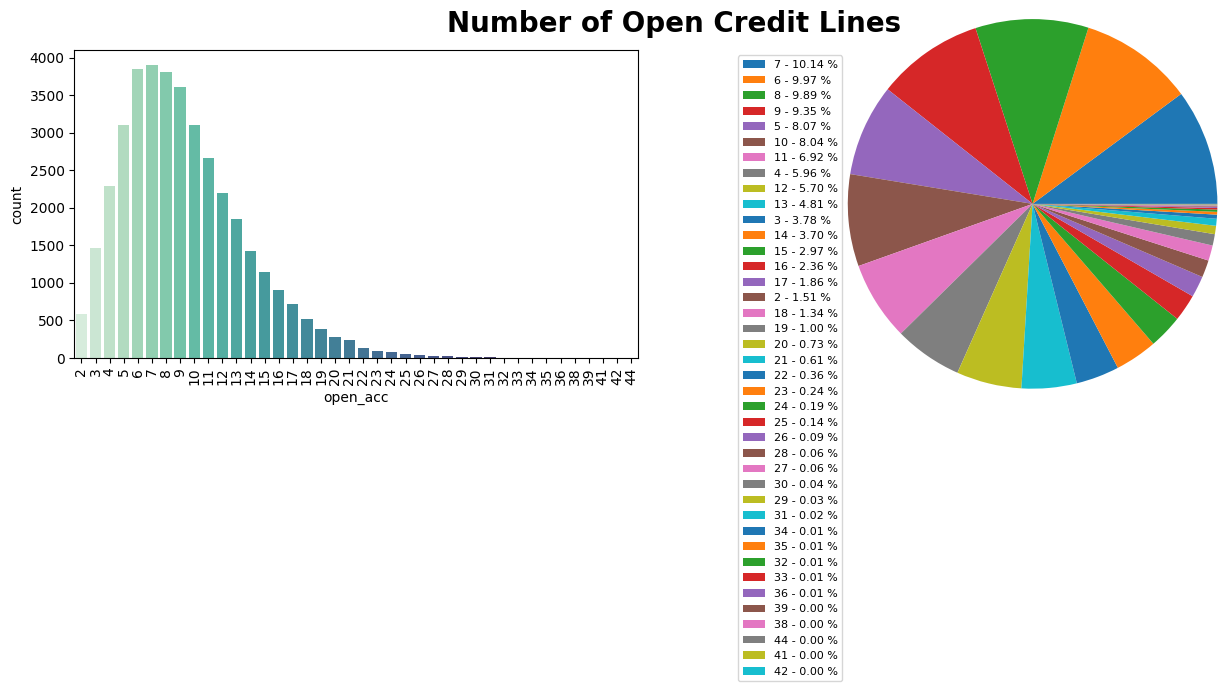

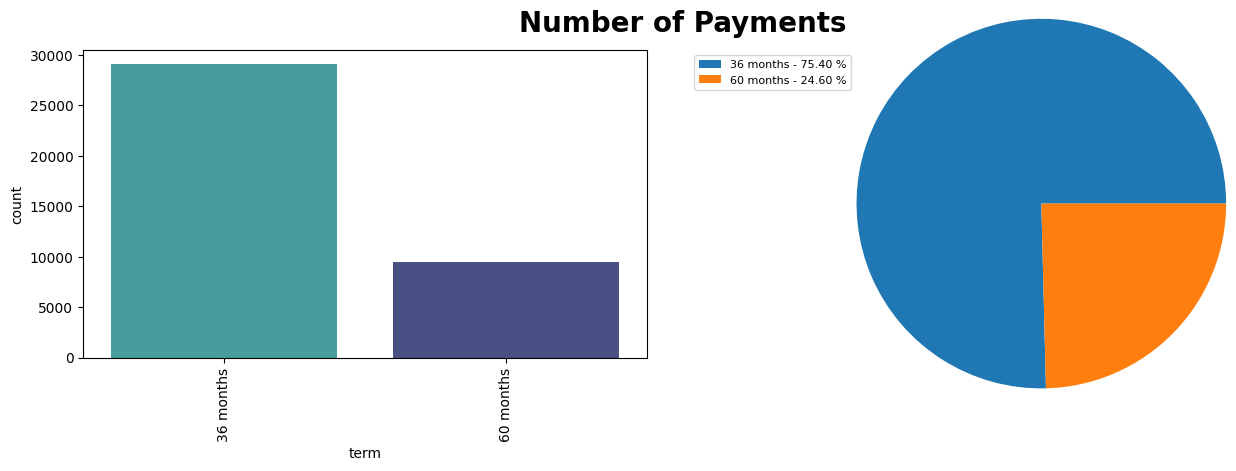

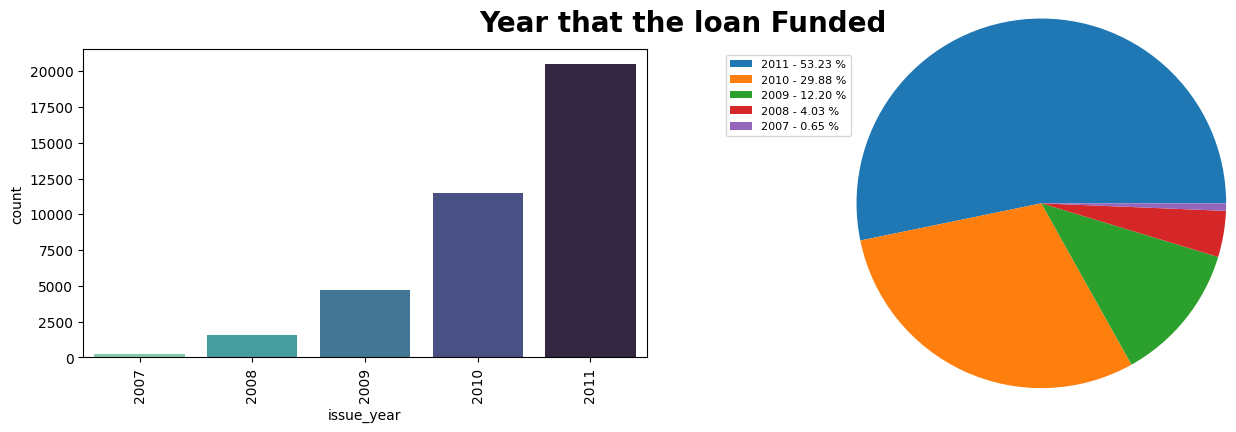

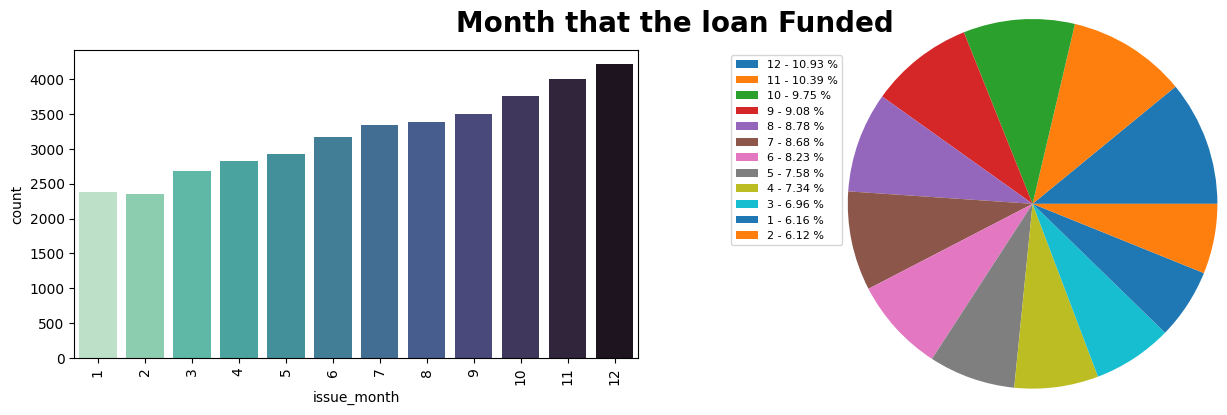

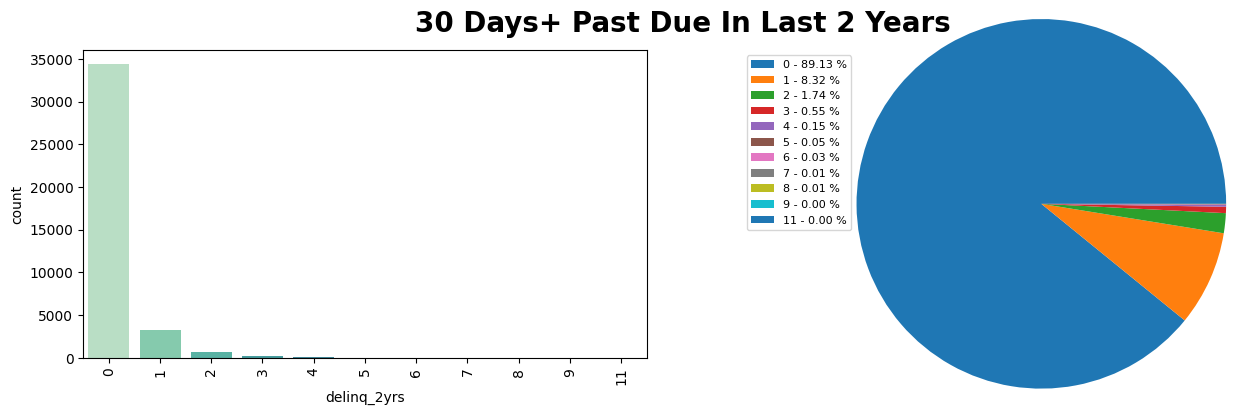

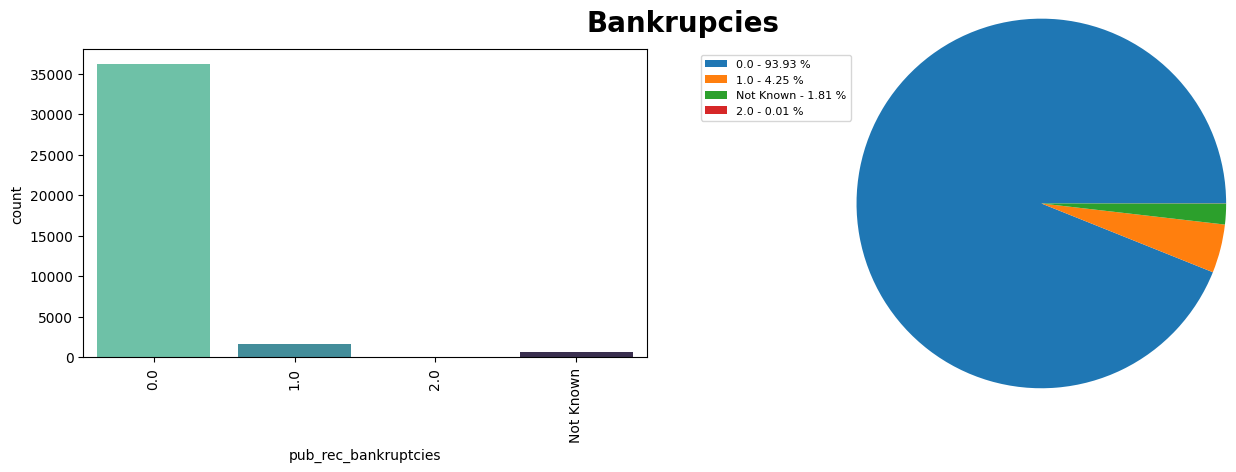

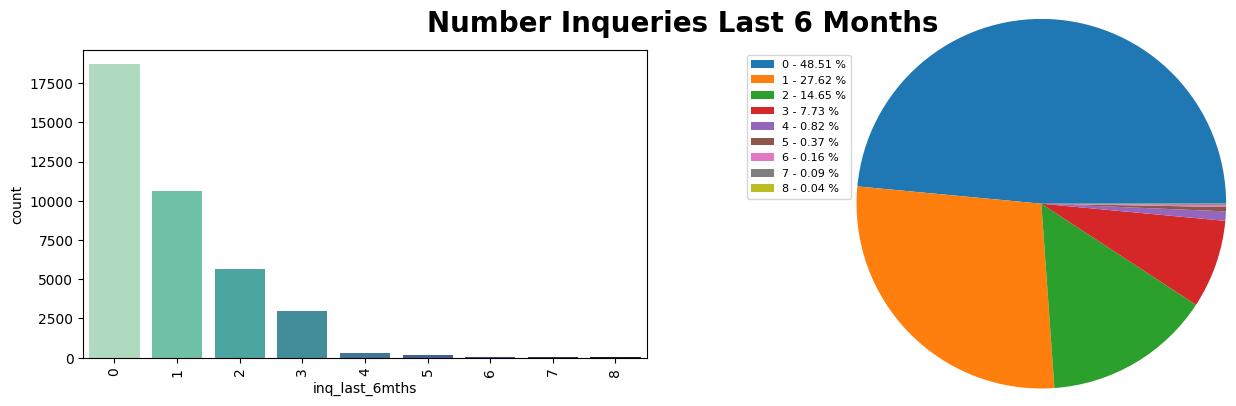

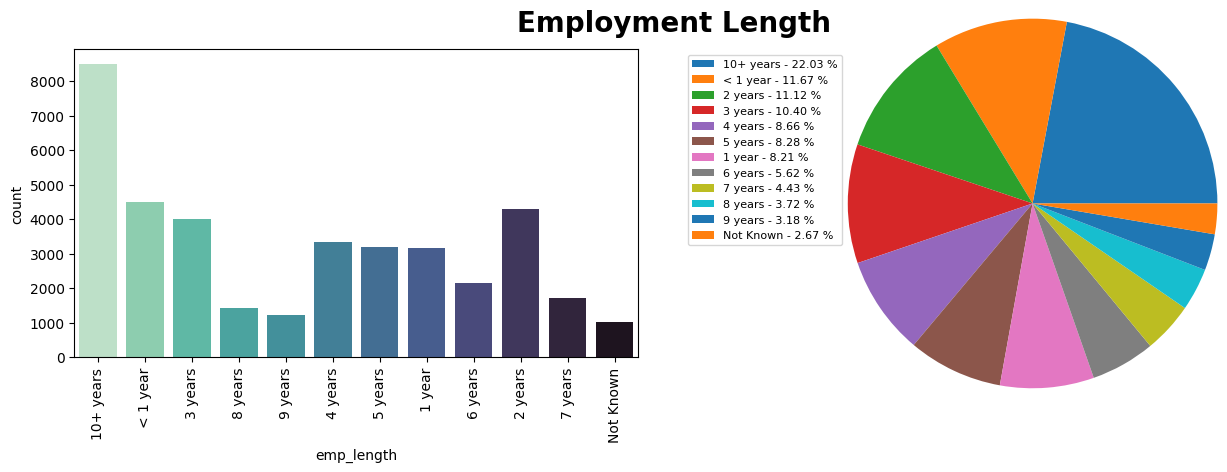

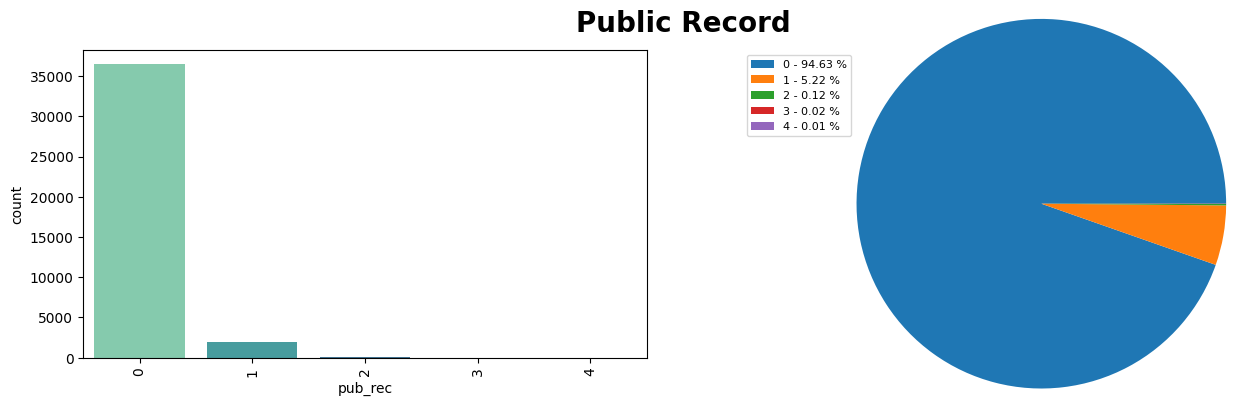

In [447]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
numericalCols = ["int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti", "annual_inc",
                 "funded_amnt_inv", "installment", "last_pymnt_amnt", "total_pymnt",
                 "total_pymnt_inv"]

categoricalCols = list(set(df.columns) - set(numericalCols+["member_id"]))

categoricalDict1 = {"Loan Status": "loan_status", "Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs", "Bankrupcies": "pub_rec_bankruptcies",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec"}

for k in categoricalDict1.keys():
  countPlots(df, categoricalDict1[k], k)


<IPython.core.display.Javascript object>

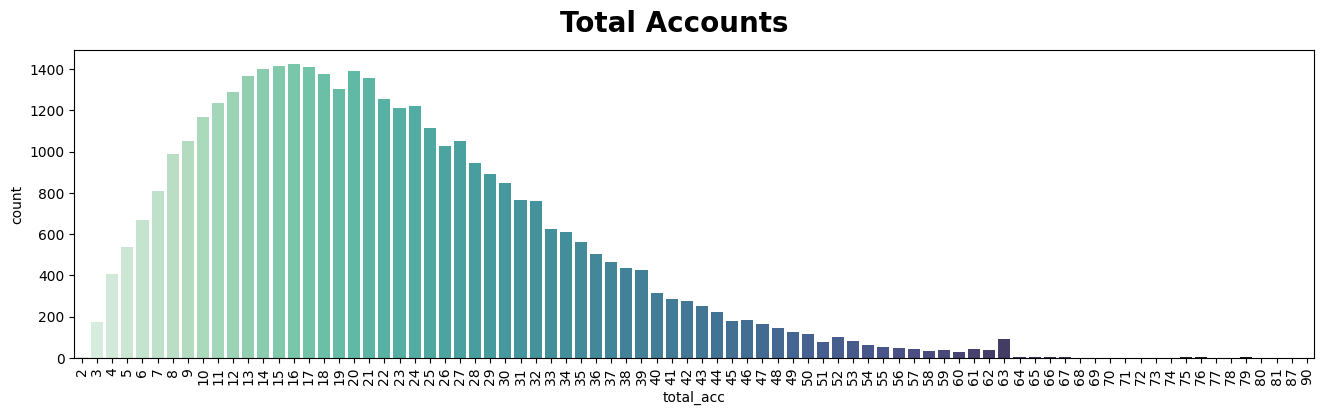

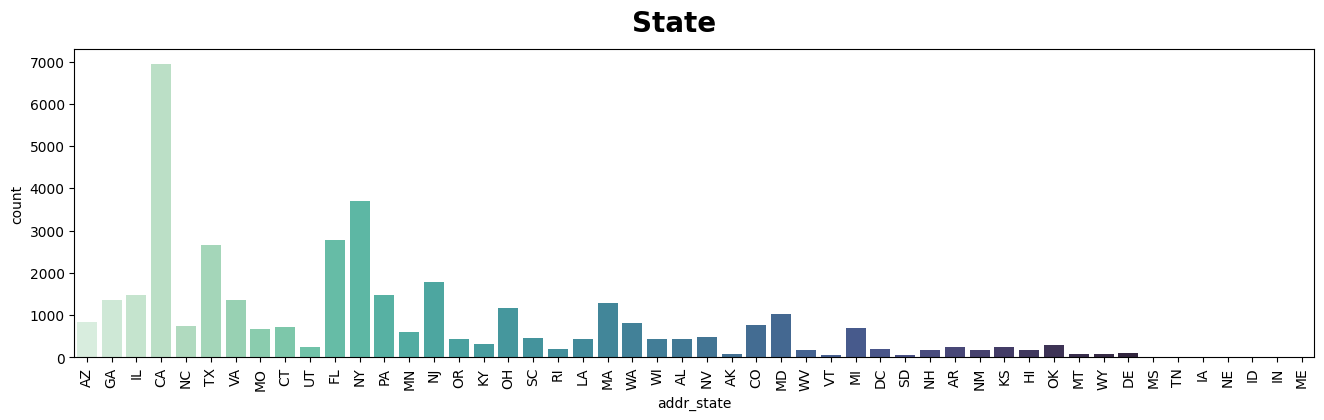

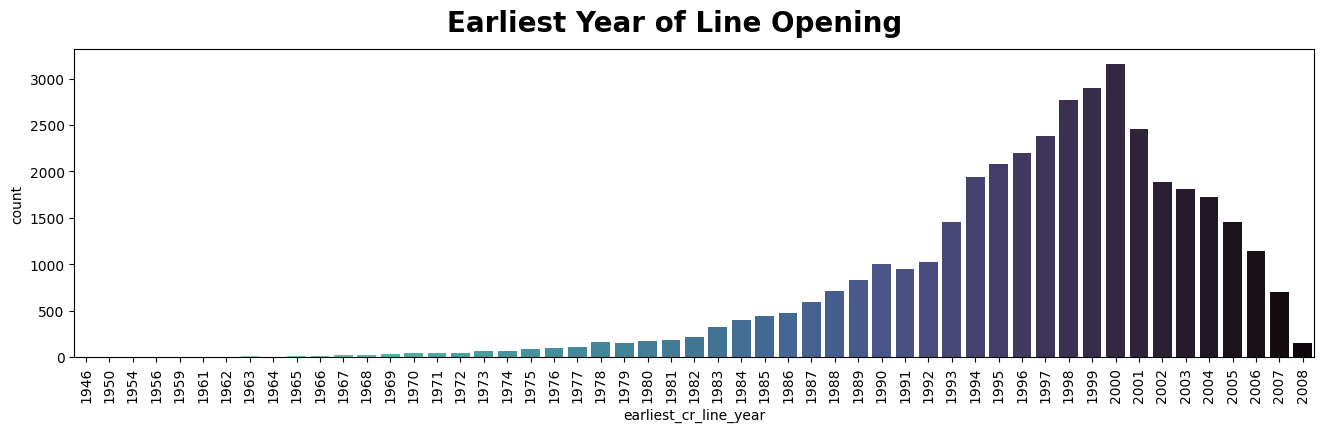

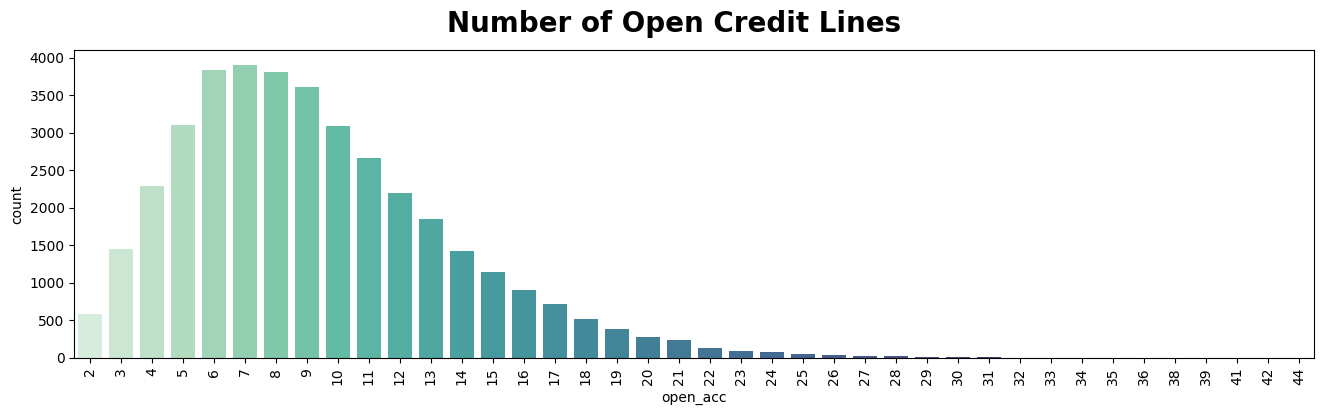

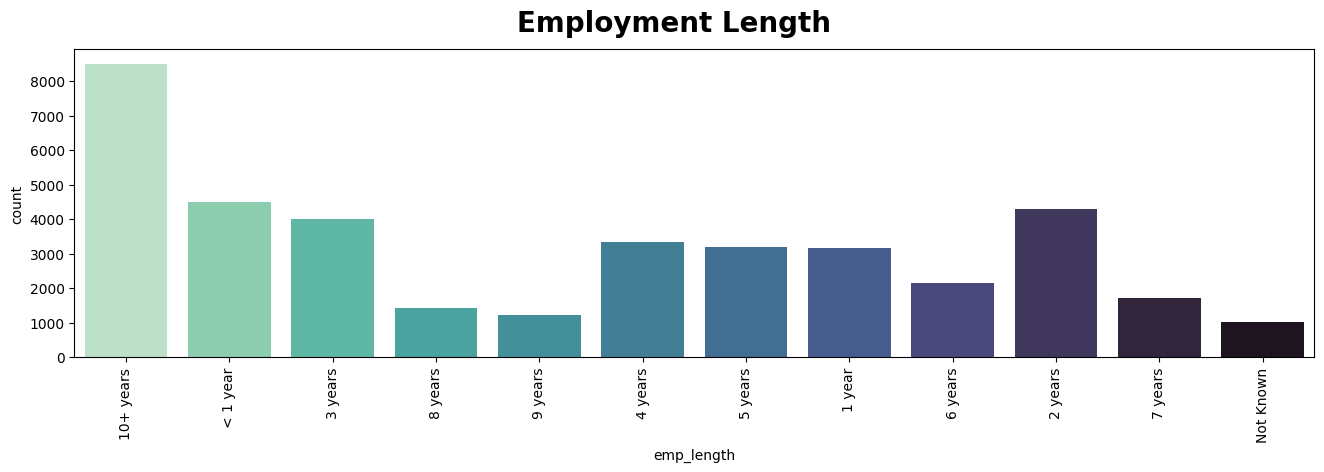

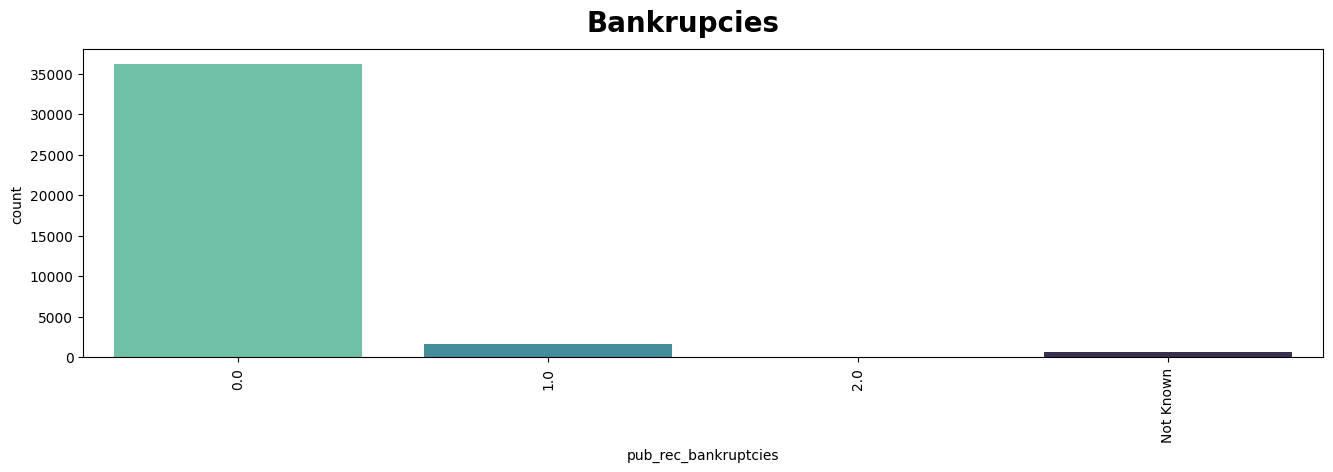

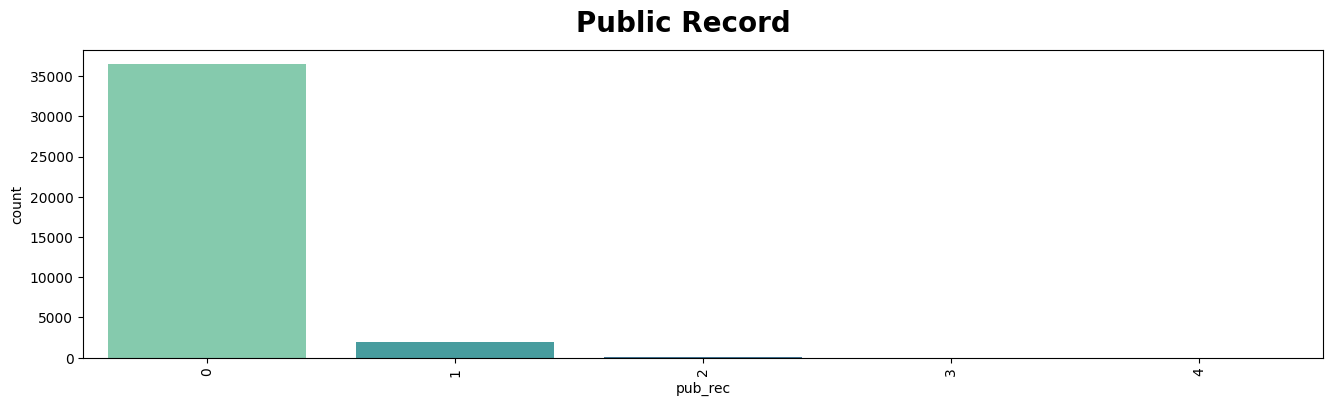

In [448]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict2 = {"Total Accounts": "total_acc", "State": "addr_state",
                    # "Zip Code":"zip_code",
                    # "Number of Months from Last deliguency":"mths_since_last_delinq",
                   "Earliest Year of Line Opening":"earliest_cr_line_year",
                   "Number of Open Credit Lines":"open_acc",
                   "Employment Length":"emp_length",
                    "Bankrupcies": "pub_rec_bankruptcies",
                    "Public Record":"pub_rec"}

for k in categoricalDict2.keys():
  barPlots(df, categoricalDict2[k], k)

# **Segmented Univariate Analysis**

### **Segmented Univariate for two categorical variables**:

In [545]:
def segment_barplot(data, x, col, title):
  plt.figure(figsize=(16,4))

  sns.countplot(x=x, hue=col, data=data)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend(loc='upper right',fontsize=10)
  plt.show()



1.   **Loan Status against categorical variables**




<IPython.core.display.Javascript object>

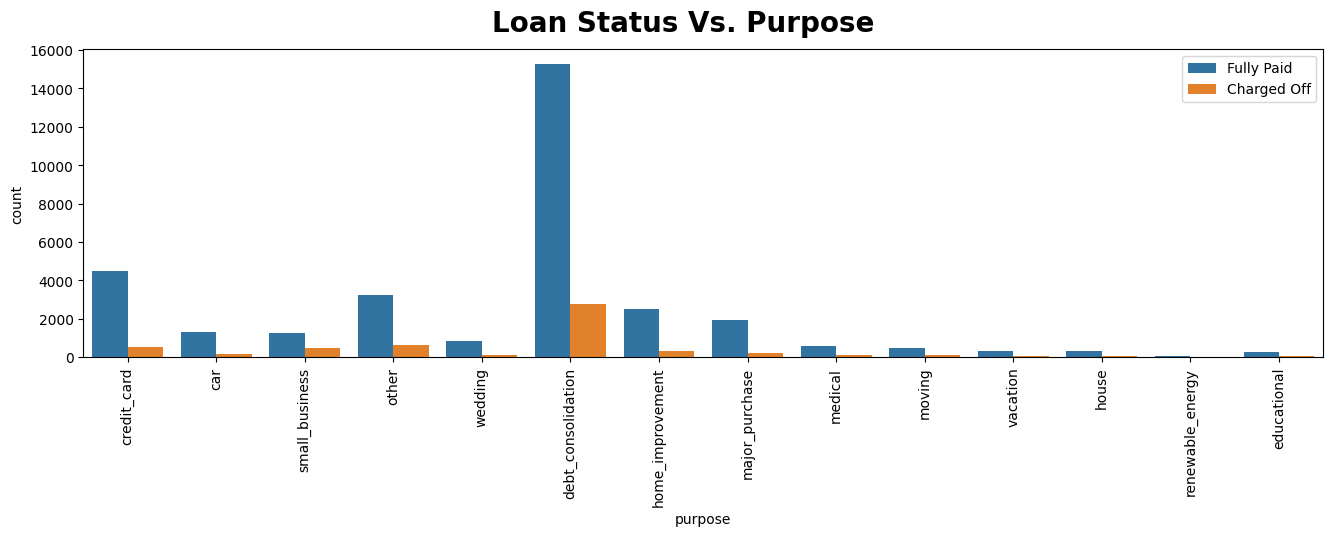

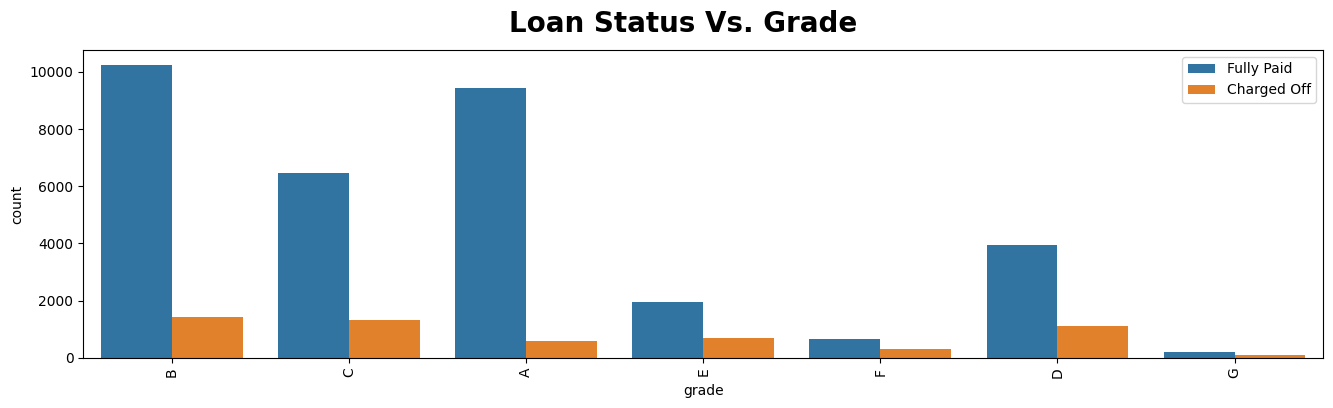

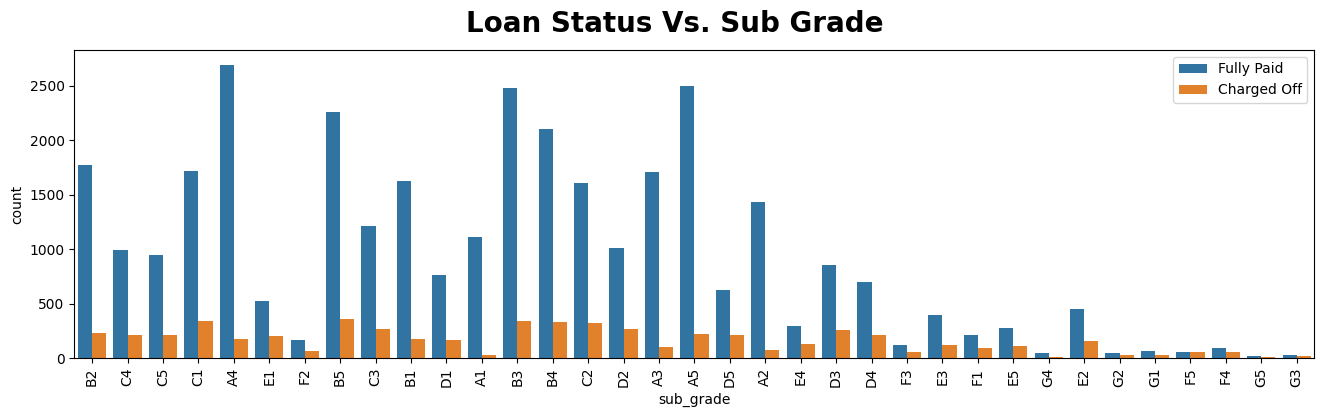

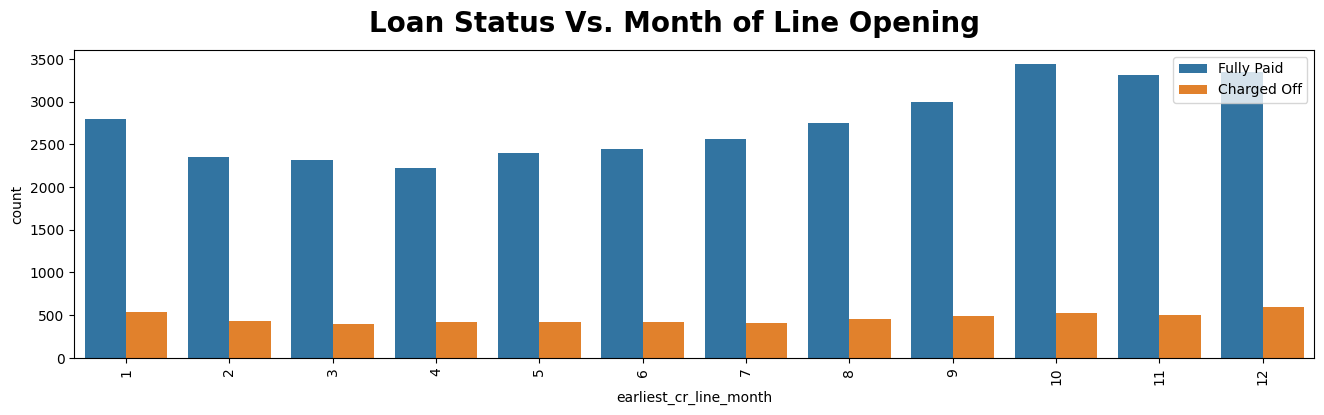

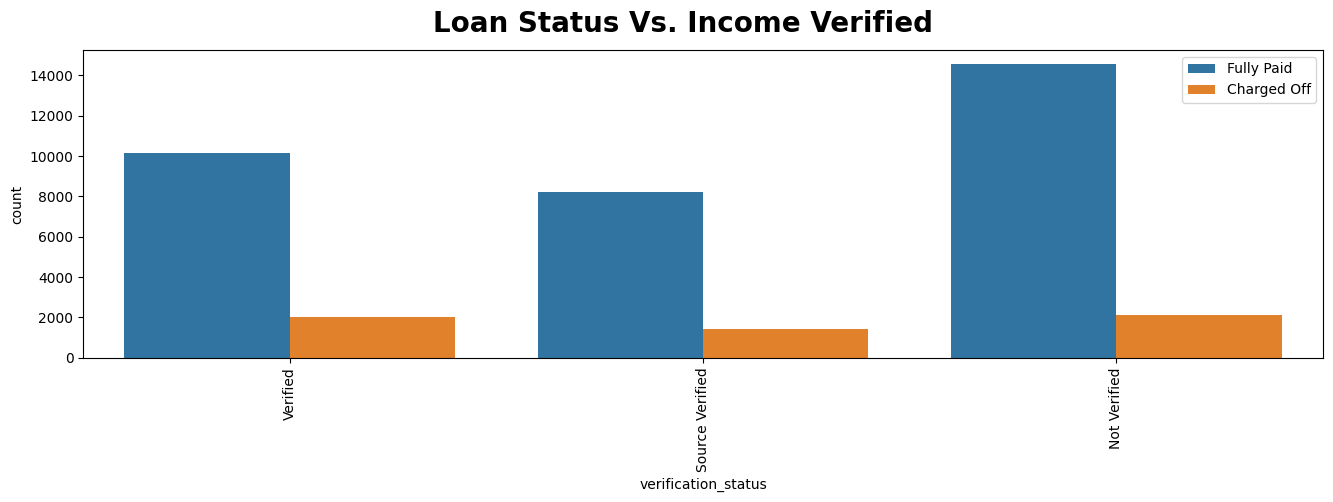

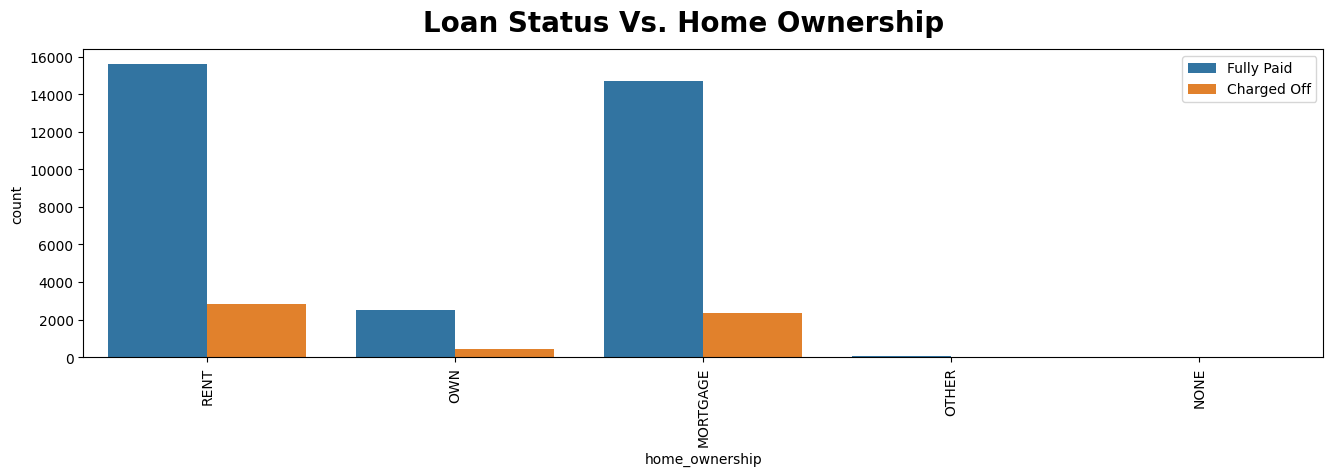

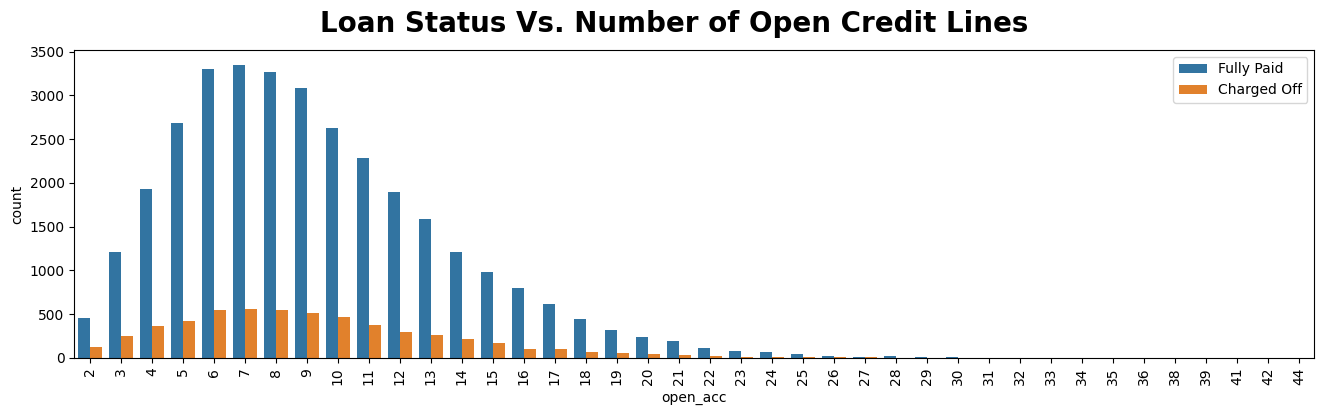

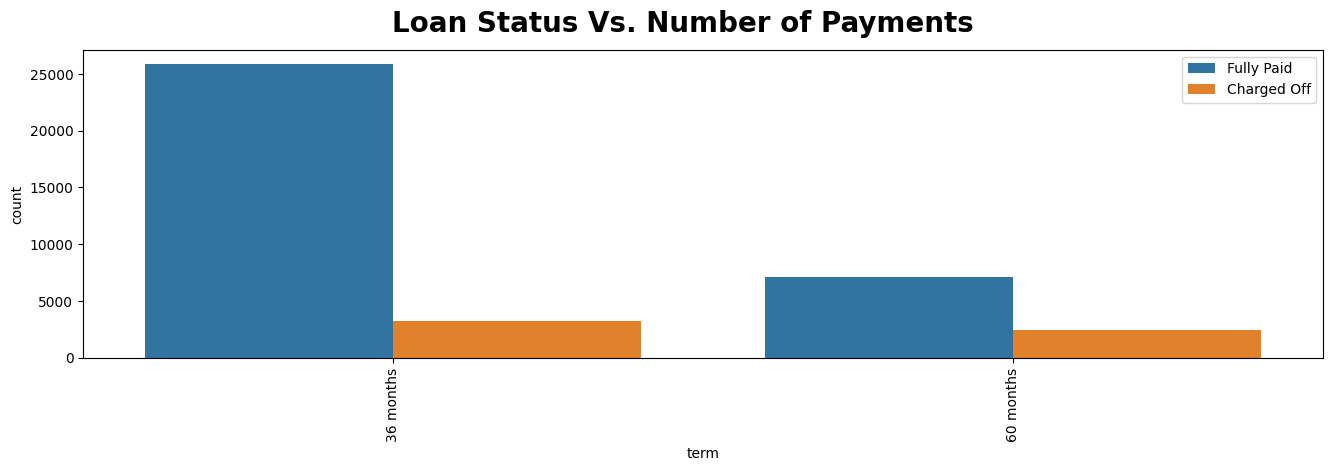

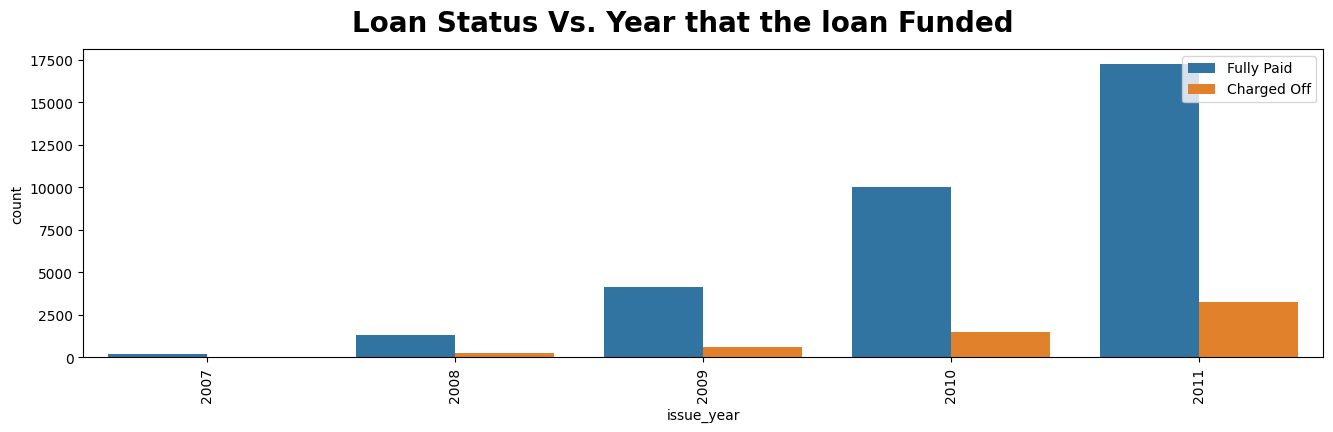

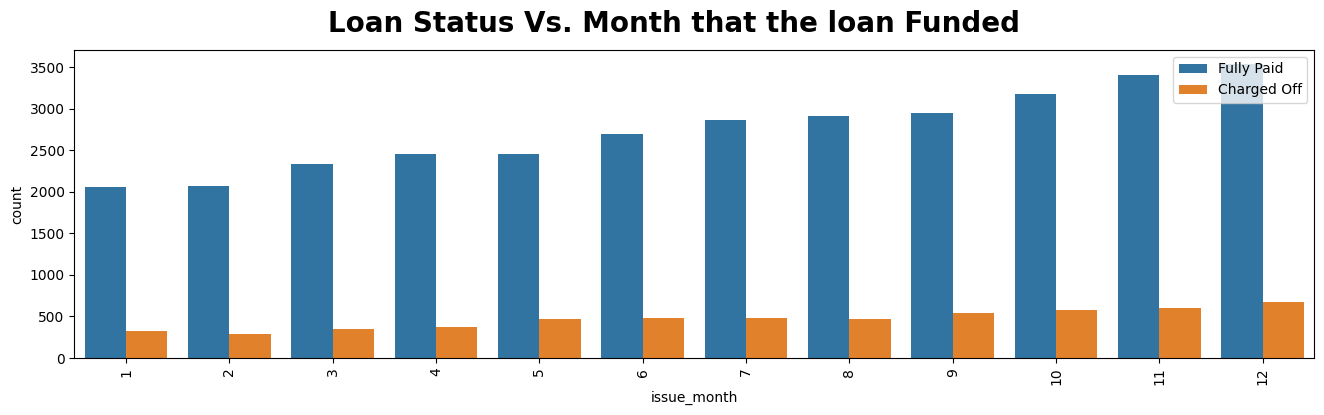

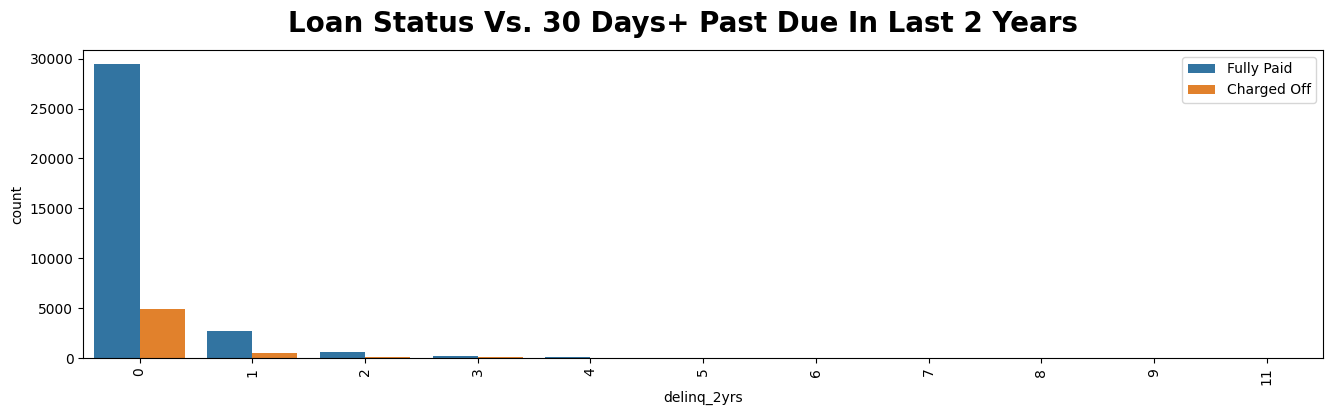

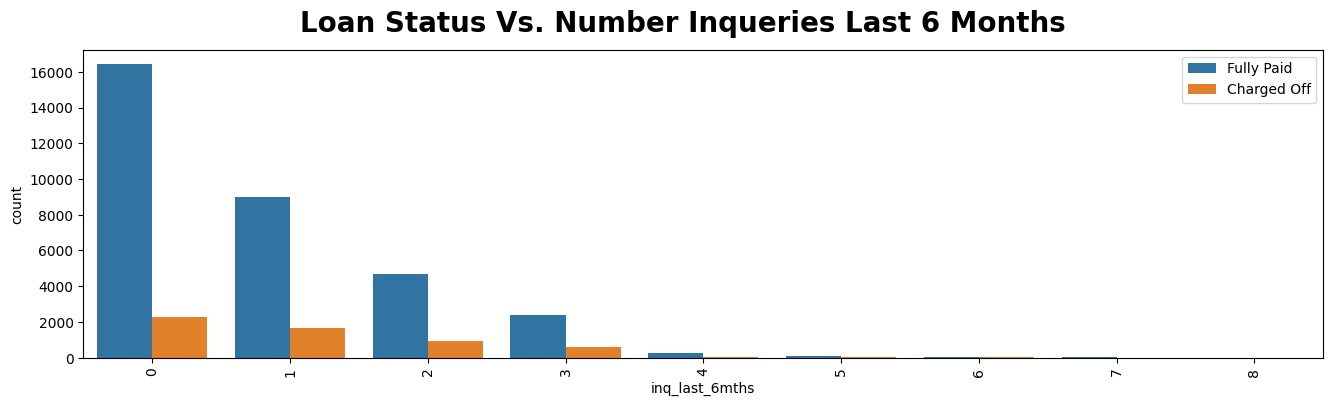

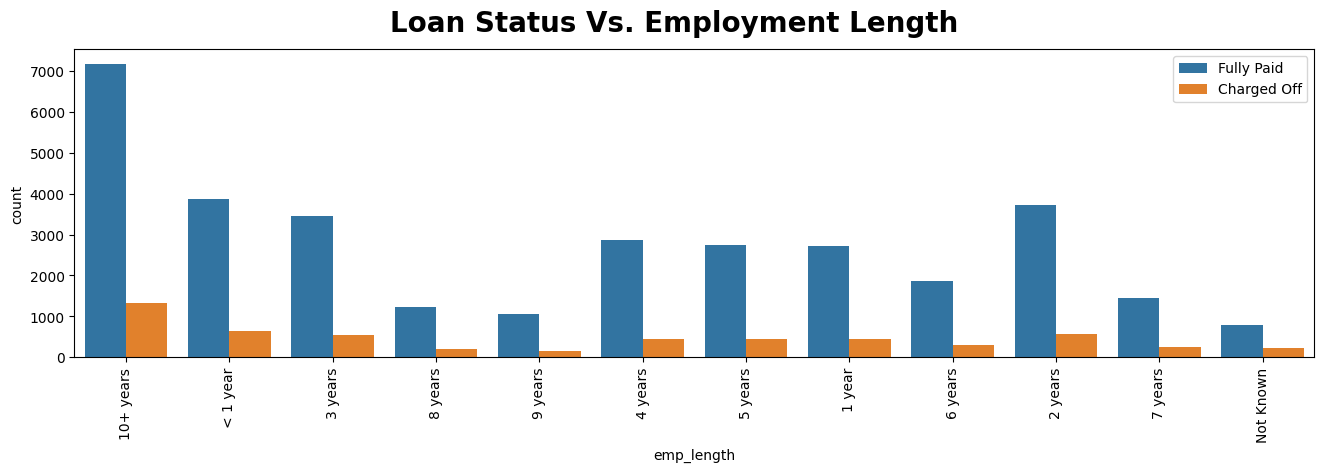

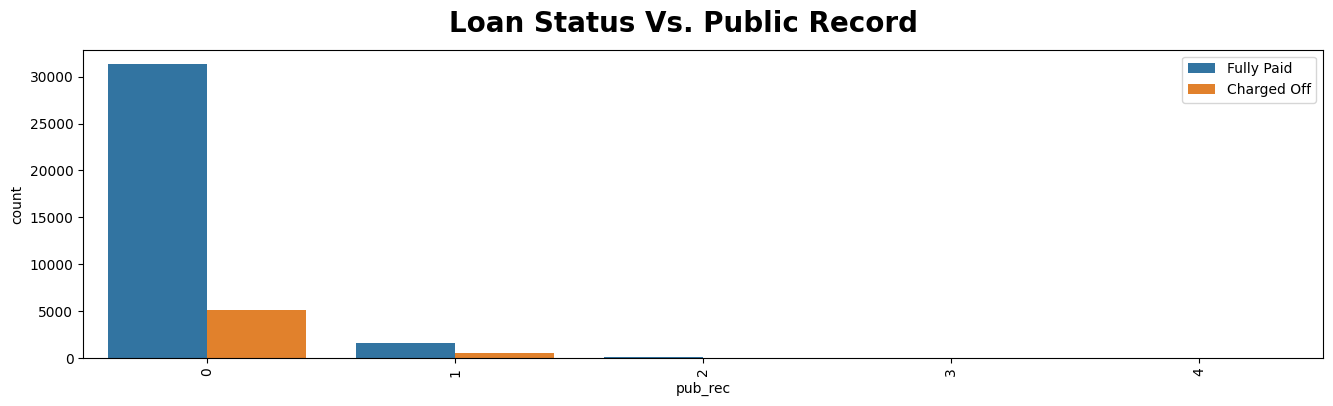

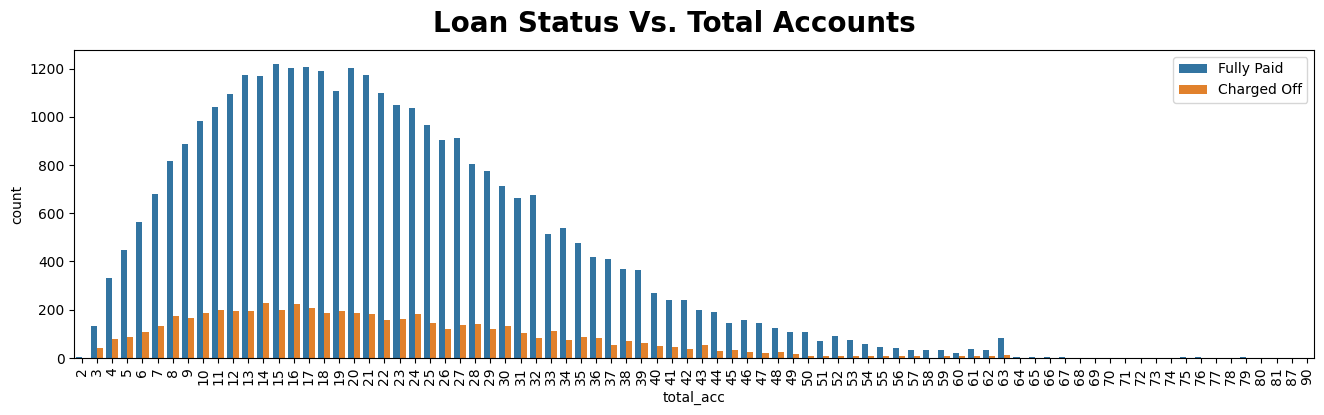

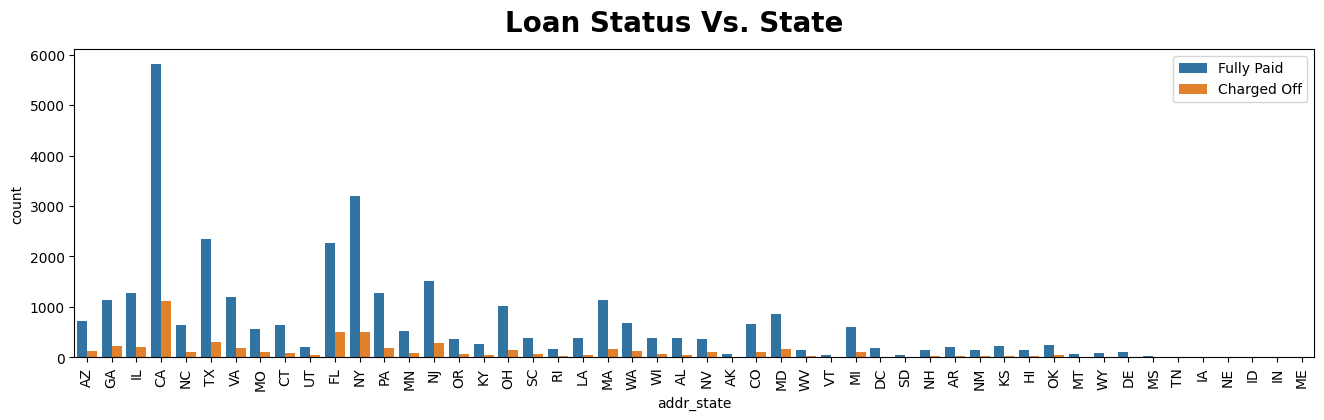

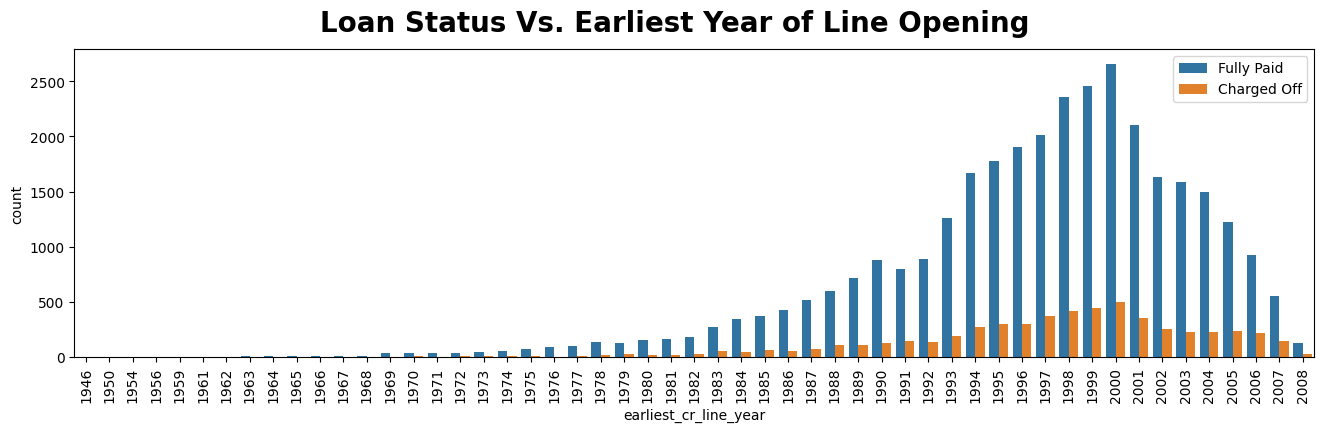

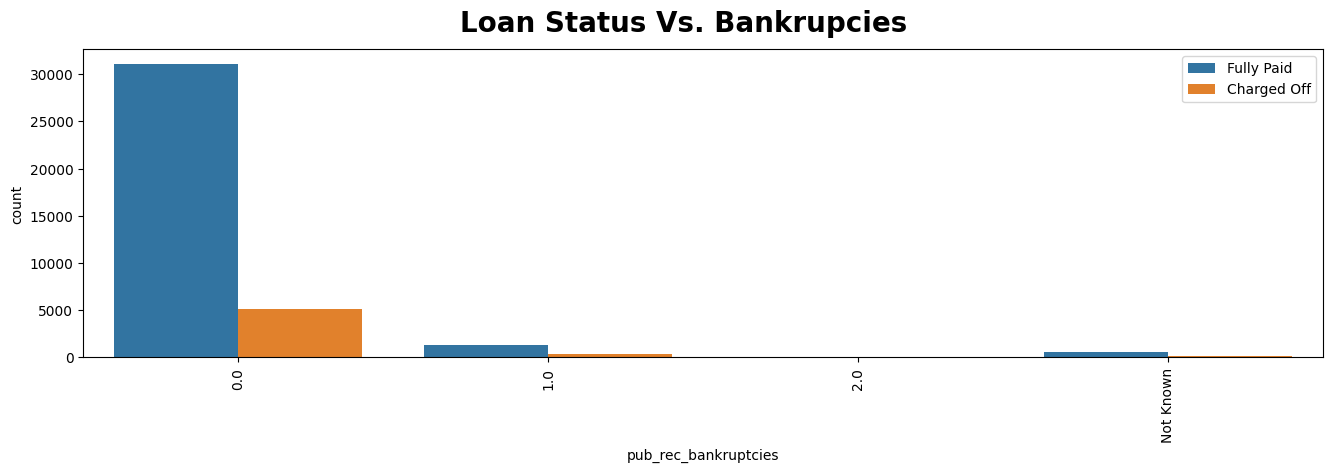

In [546]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict3 = {"Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec",
                    "Total Accounts": "total_acc", "State": "addr_state",
                   "Earliest Year of Line Opening":"earliest_cr_line_year",
                   "Number of Open Credit Lines":"open_acc",
                   "Employment Length":"emp_length",
                    "Bankrupcies": "pub_rec_bankruptcies",
                    "Public Record":"pub_rec"}

for k in categoricalDict3.keys():
  segment_barplot(df, categoricalDict3[k], "loan_status", f"Loan Status Vs. {k}")


2.   **Number Public Record Bankrupcies Against different categorical variables**



<IPython.core.display.Javascript object>

loan_status


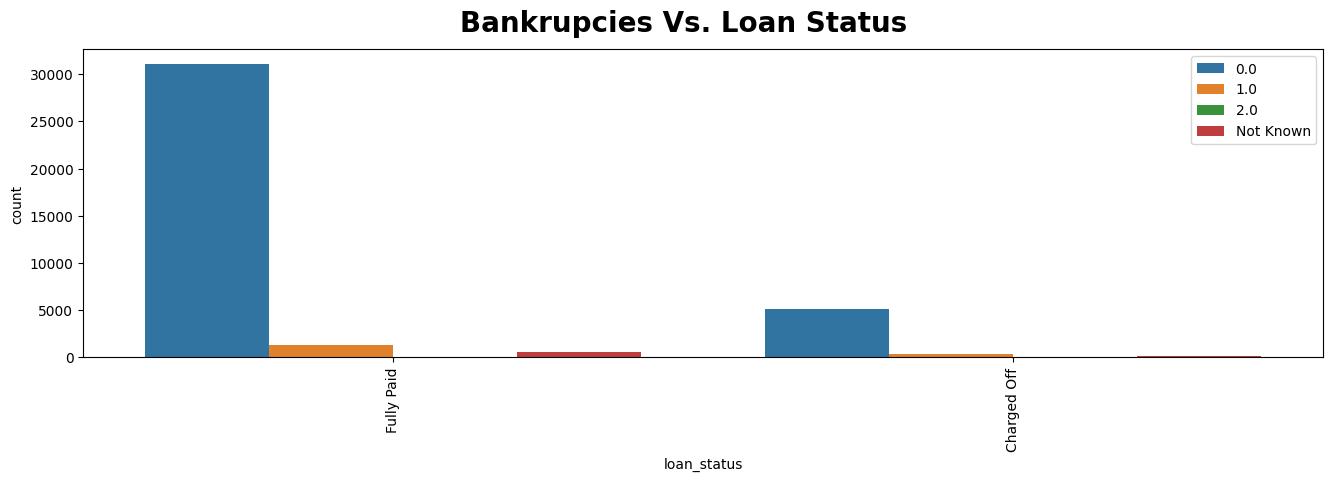

purpose


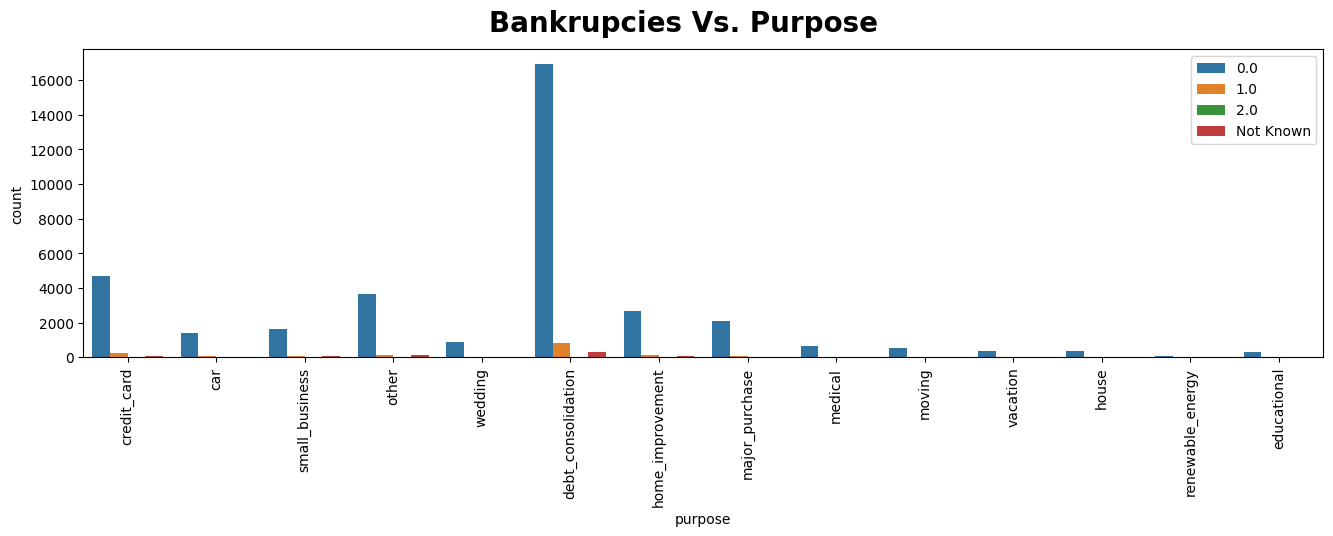

grade


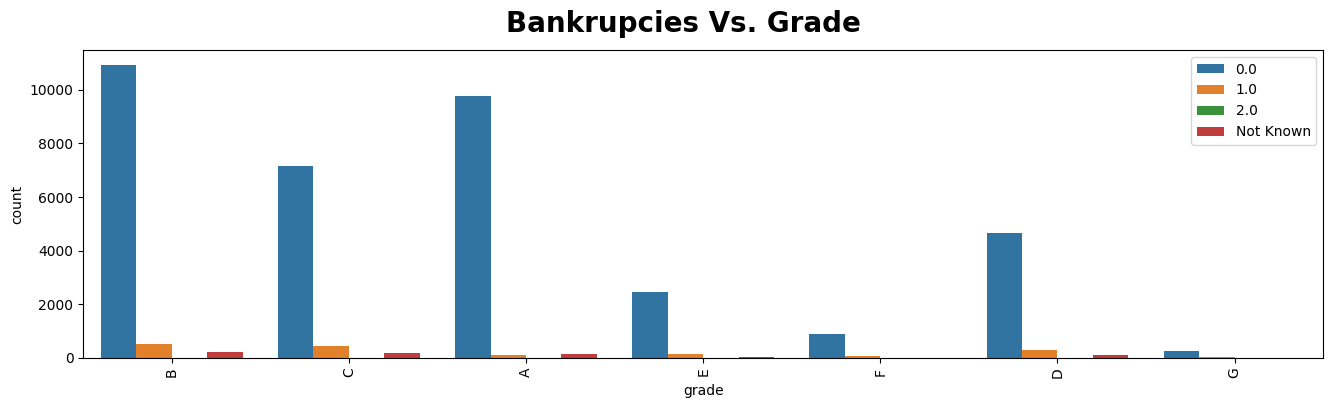

sub_grade


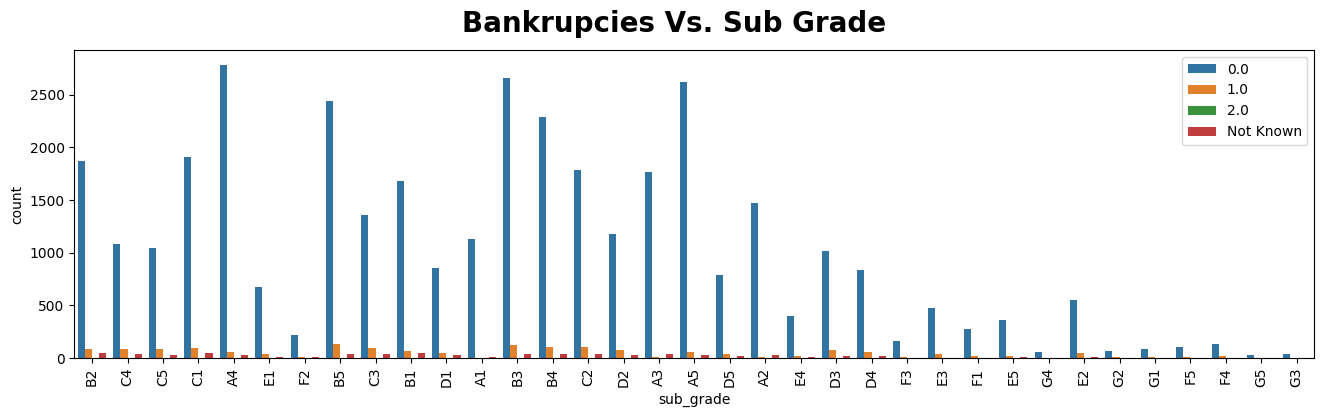

earliest_cr_line_month


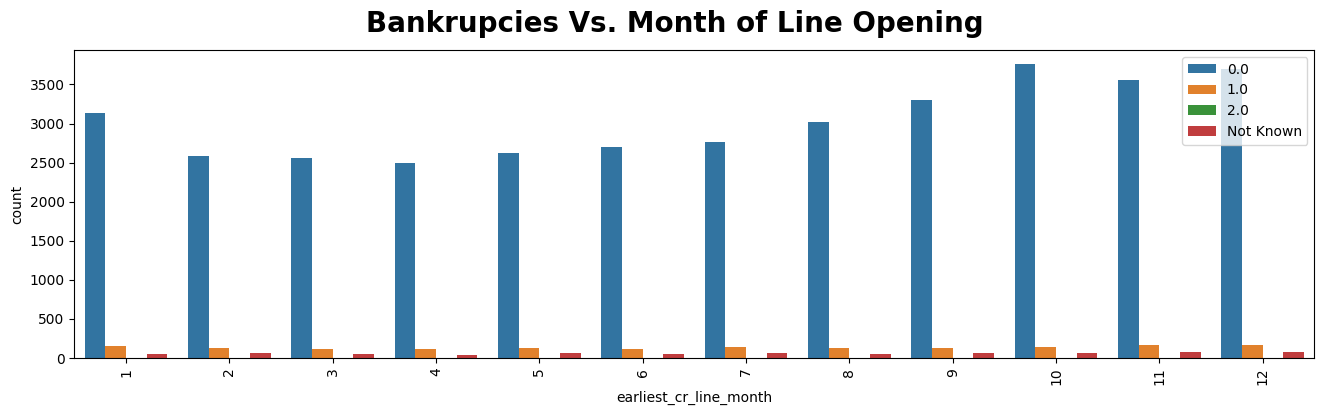

verification_status


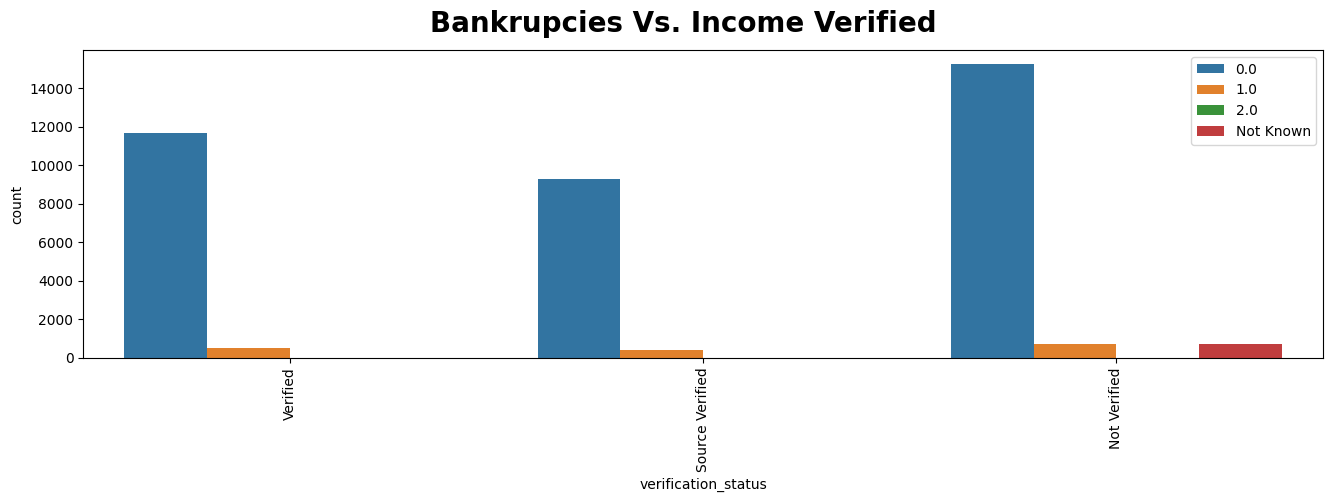

home_ownership


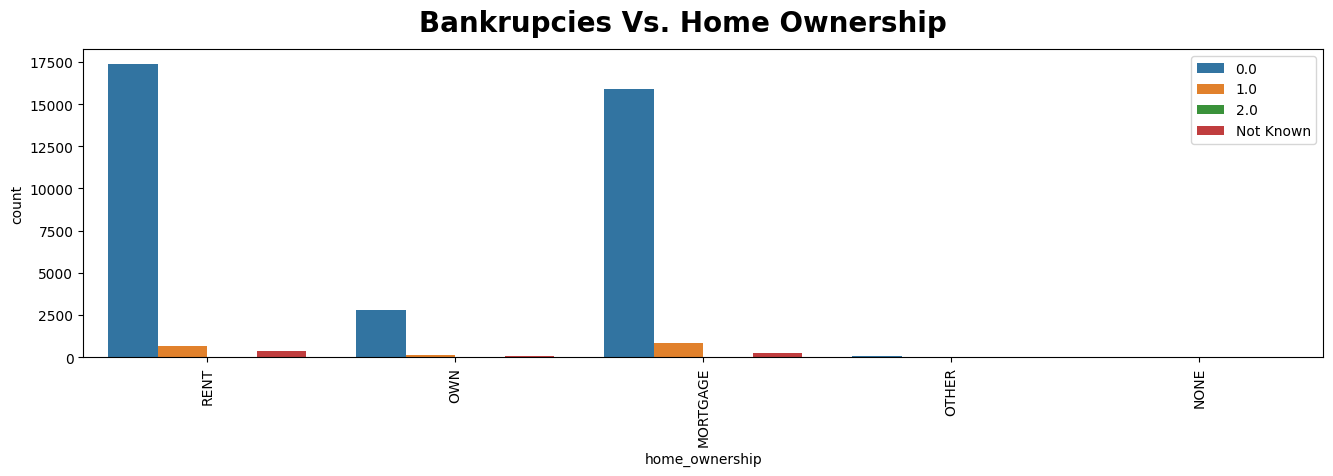

open_acc


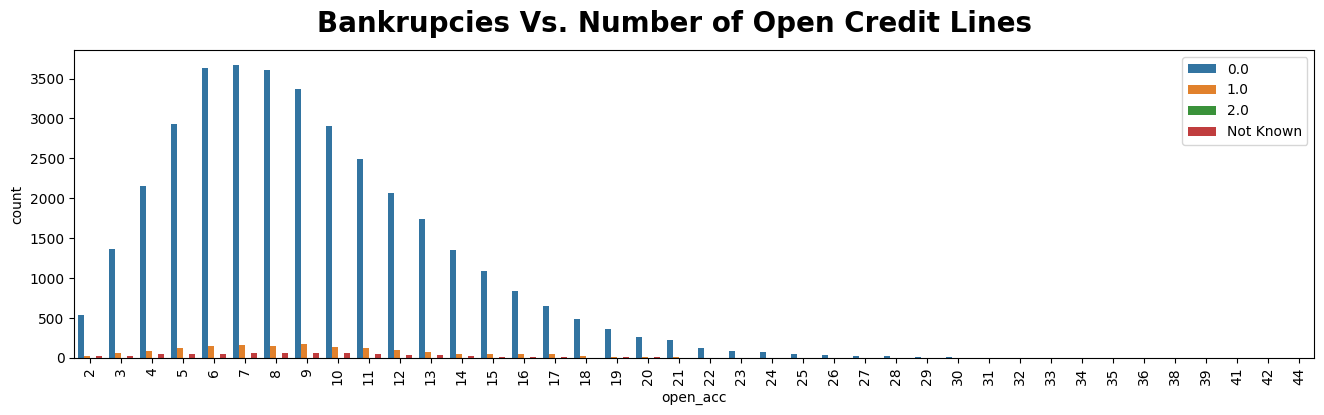

term


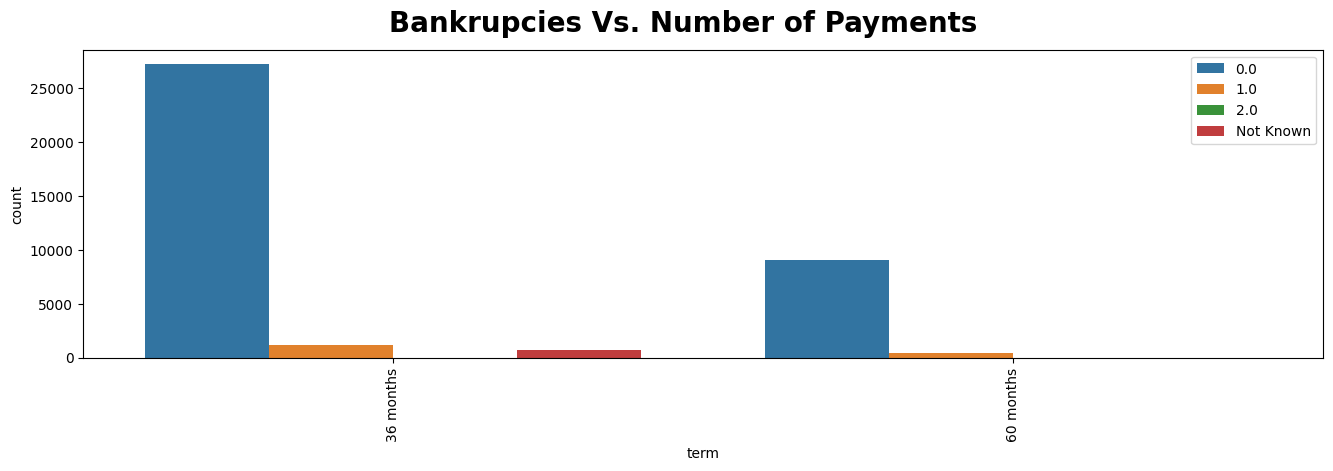

issue_year


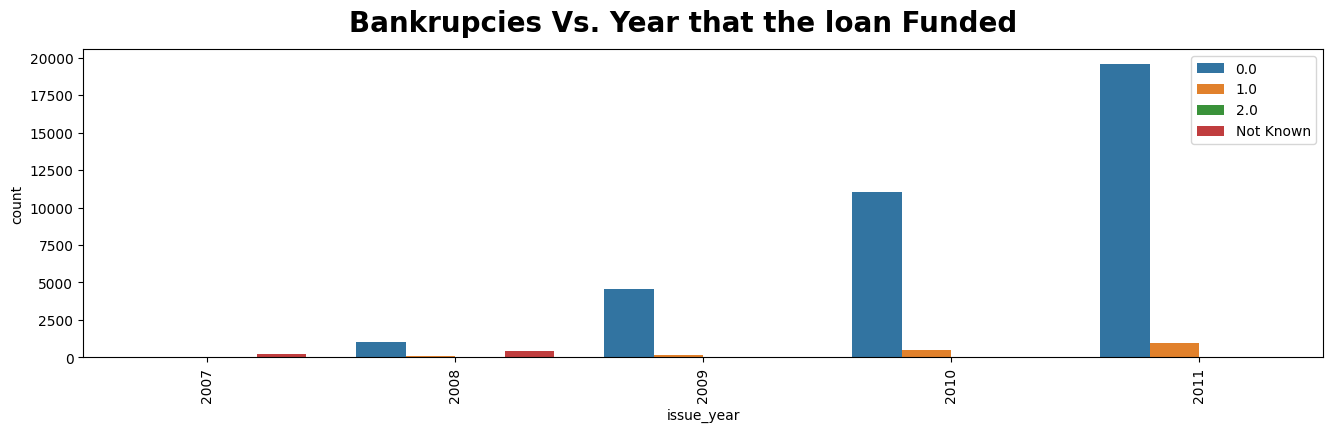

issue_month


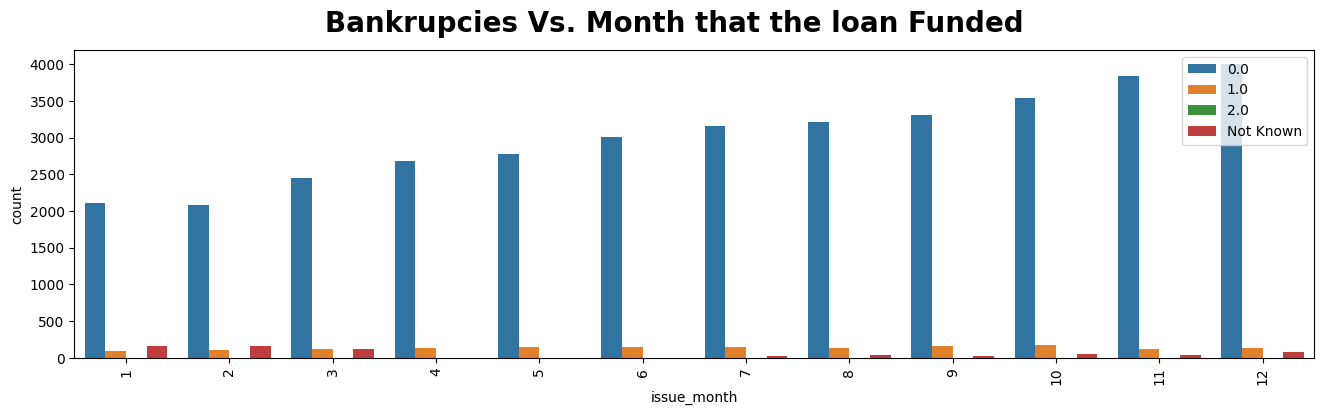

delinq_2yrs


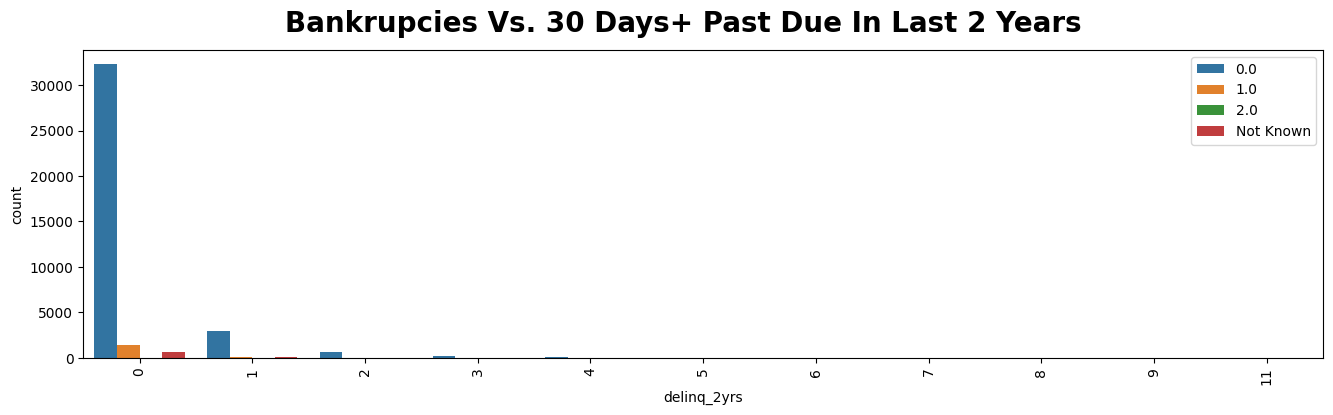

inq_last_6mths


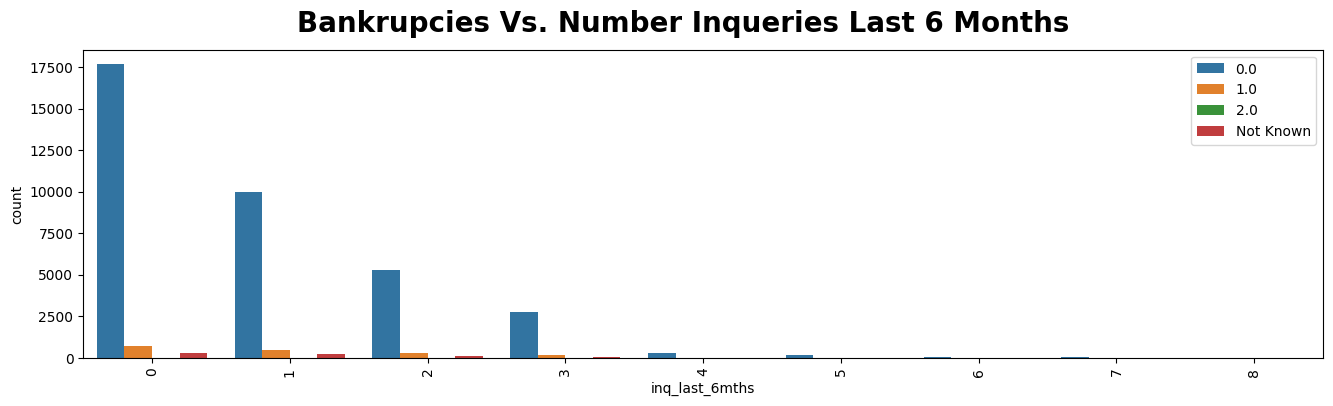

emp_length


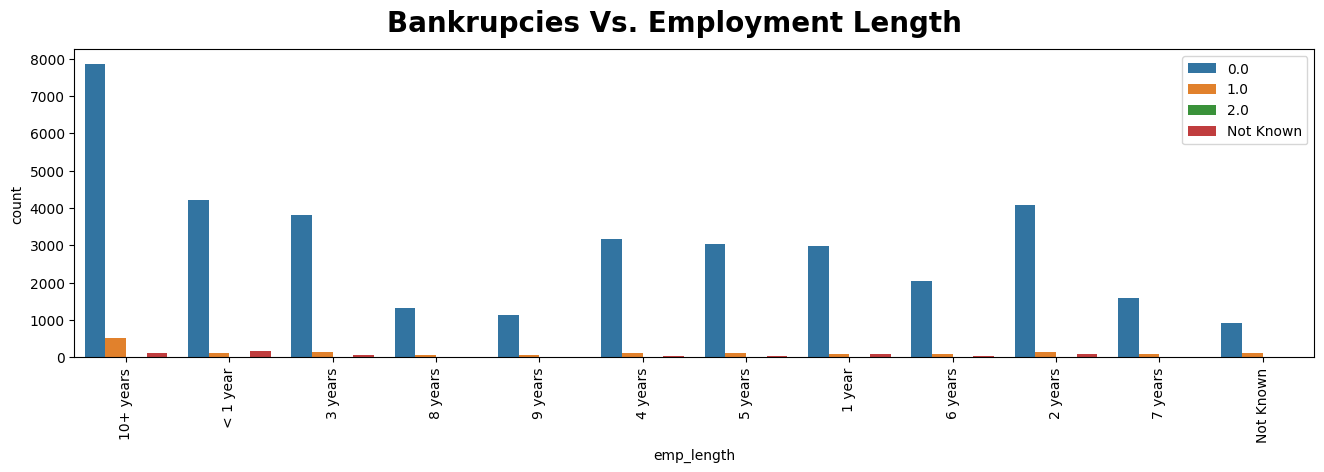

pub_rec


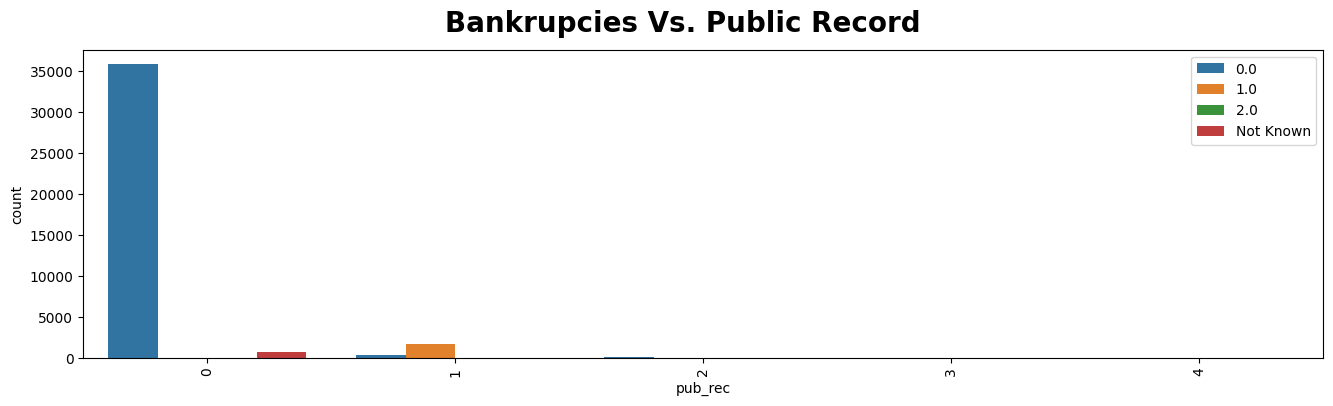

total_acc


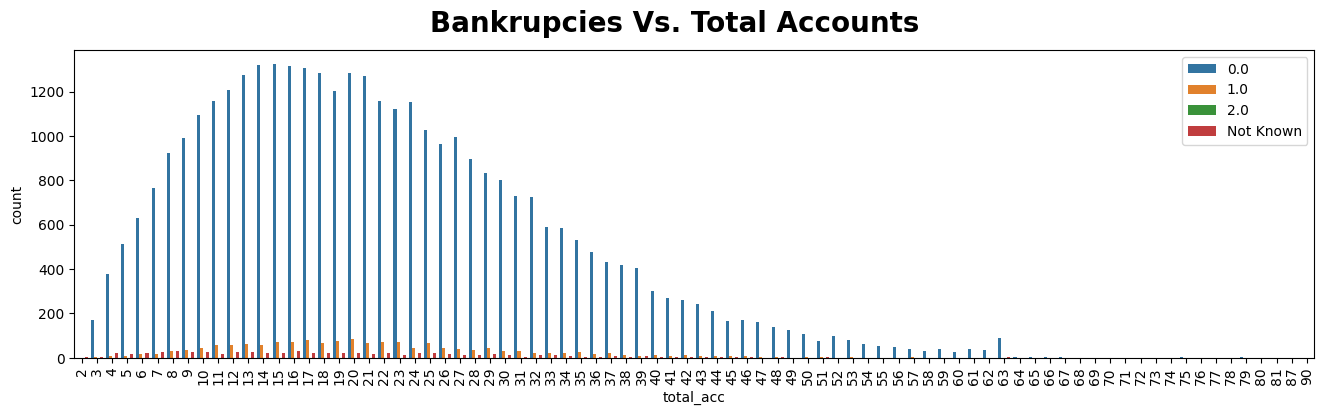

addr_state


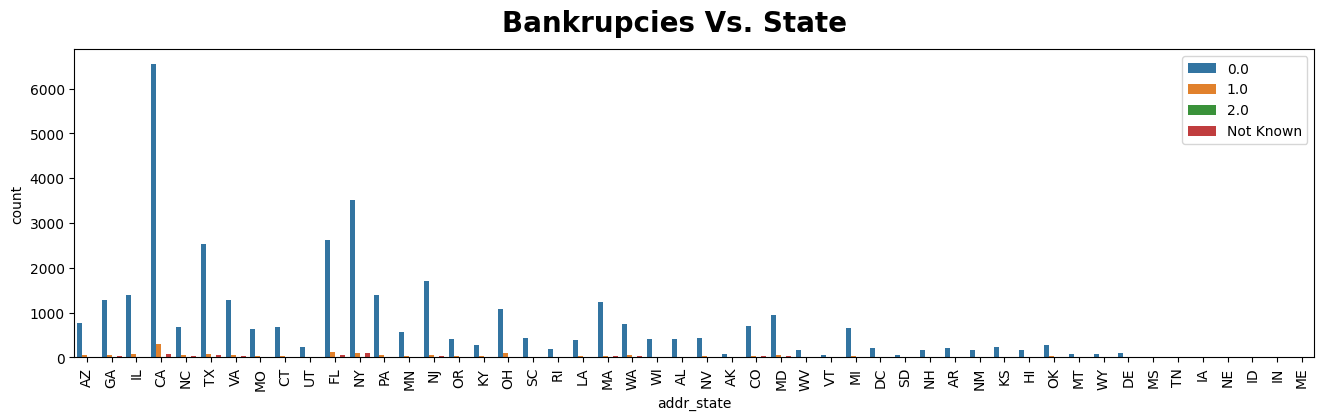

earliest_cr_line_year


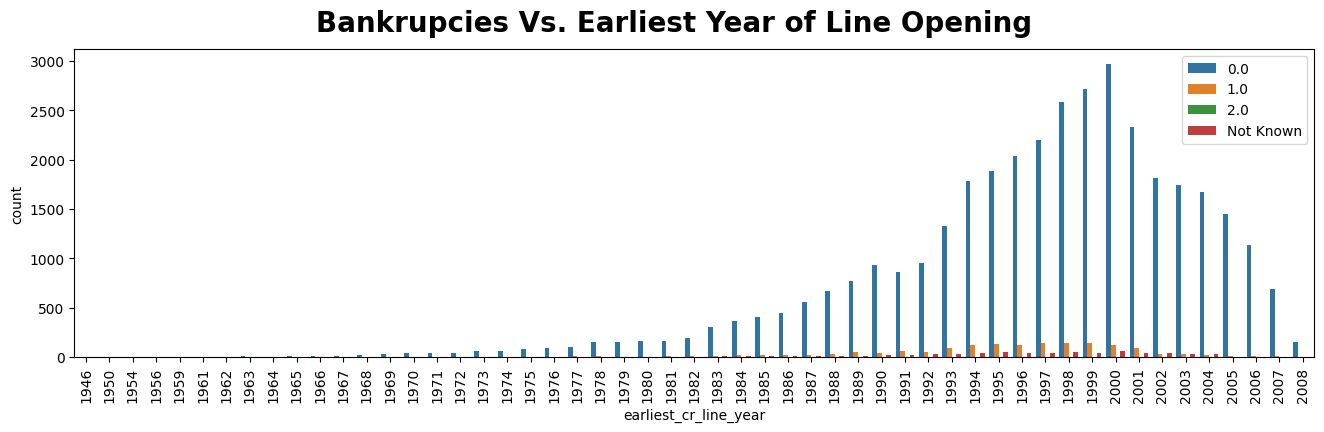

In [547]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict4 = {"Loan Status":"loan_status" , "Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec",
                    "Total Accounts": "total_acc", "State": "addr_state",
                   "Earliest Year of Line Opening":"earliest_cr_line_year",
                   "Number of Open Credit Lines":"open_acc",
                   "Employment Length":"emp_length",
                    "Public Record":"pub_rec"}

for k in categoricalDict4.keys():
  print(categoricalDict4[k])
  segment_barplot(df, categoricalDict4[k], "pub_rec_bankruptcies", f"Bankrupcies Vs. {k}")


### **Segmented Uhnivariate analysis for a categorical variable against continues variable**:

In [595]:
import scipy.stats as stats
def segment_boxPlot(data, x, y, title):

  plt.figure(figsize=(16,4))
  sns.boxplot(x=x, y=y, data=data)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend(loc='upper right',fontsize=10)
  plt.show()

  levels = data[x].unique()
  y1 = data.loc[data[x]==levels[0], y]
  y2 = data.loc[data[x]==levels[1], y]

  normality_g1 = stats.shapiro(y1).pvalue
  normality_g2 = stats.shapiro(y2).pvalue

  # if normality_g1 < 0.05 or normality_g2 < 0.05:
  #   print(f"Data is not normaly distributed. So we use Mann-Whitney U test to test equality between two categories {level[1]} and {level[2]}.")
  #   sigVal = stats.mannwhitneyu(y1, y2, method="exact")[1]

  #   if sigVal < 0.05:
  #     print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and \
  #           conclude that the mean for {level[0]} population is not equal to the mean for {level[1]} population.")
  #   else:
  #     print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis. \
  #           Meaning that there is a chance the mean for {level[0]} population is not equal to the mean for {level[1]} population.")

  # else:
  #   print("Data is normaly distributed and we use t-test to test equality between two categories")
  #   sigVal = stats.ttest_ind(y1, y2, equal_var=False).pvalue

  #   if sigVal < 0.05:
  #     print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and \
  #           conclude that the mean for {level[0]} population is not equal to the mean for {level[1]} population.")
  #   else:
  #     print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis. \
  #           Meaning that there is a chance the mean for {level[0]} population is not equal to the mean for {level[1]} population.")



1.   **Loan Status Against All the Continues Variables we have**:



<IPython.core.display.Javascript object>

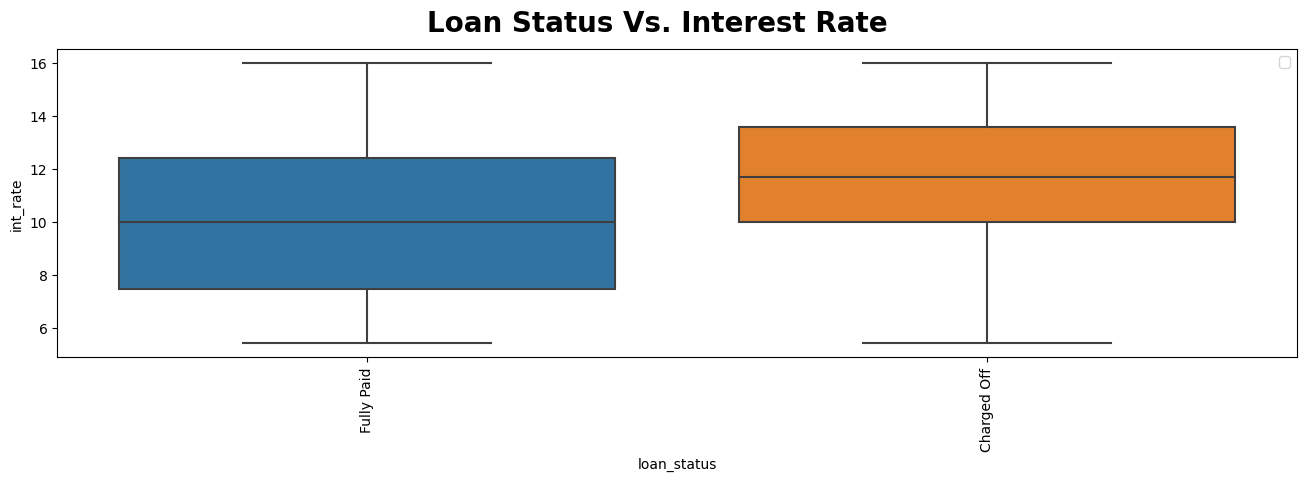

Data is not normaly distributed and we use Mann-Whitney U test to test equality between two categories


In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

for k in distributionDict.keys():
  segment_boxPlot(df, "loan_status", distributionDict[k], f"Loan Status Vs. {k}")

### Remove outliers to improve visualisation

<IPython.core.display.Javascript object>

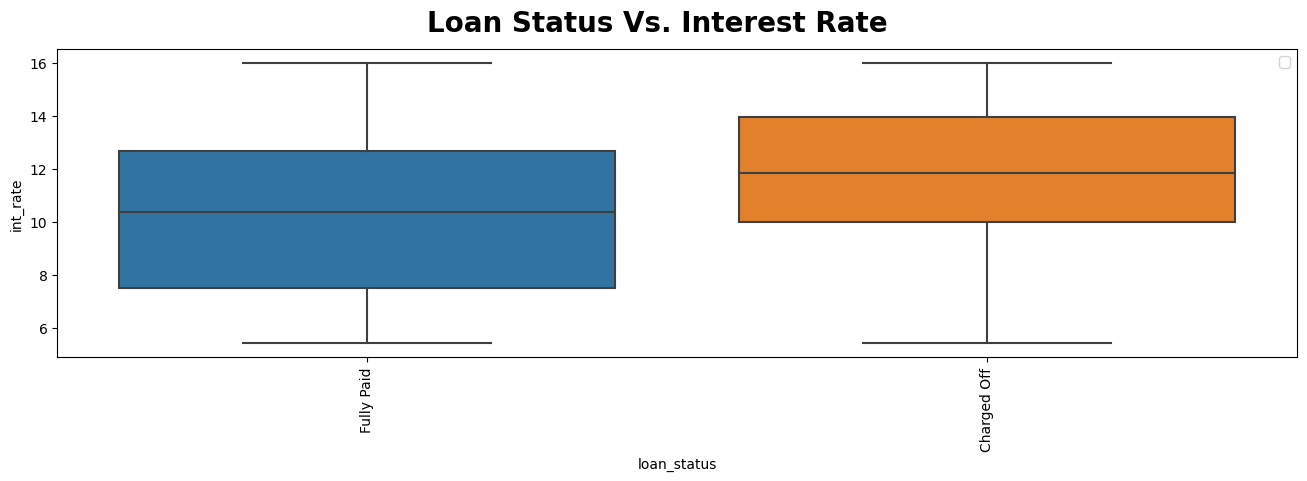

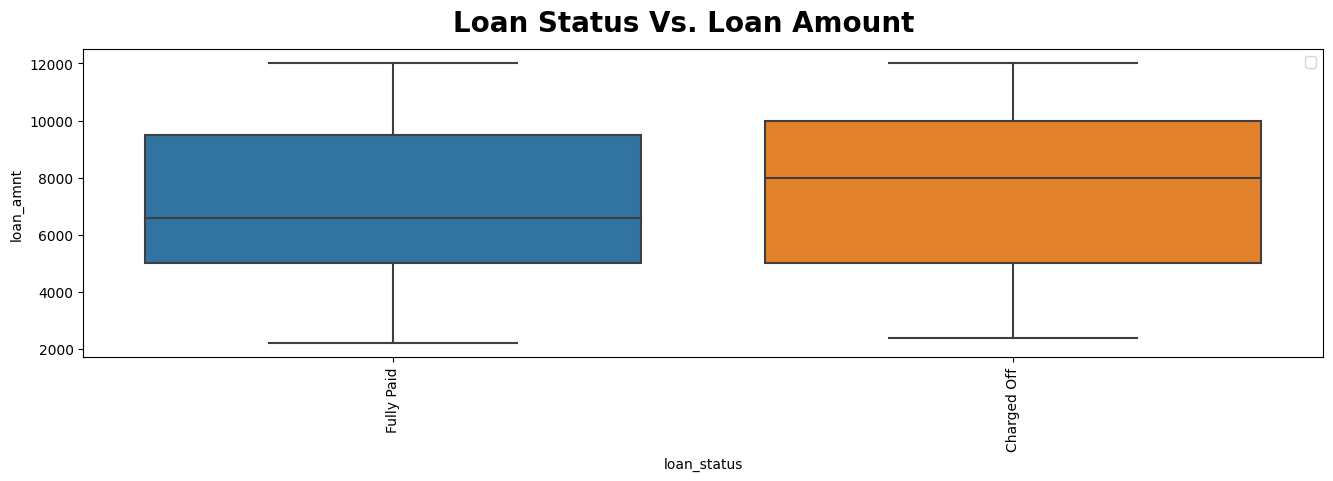

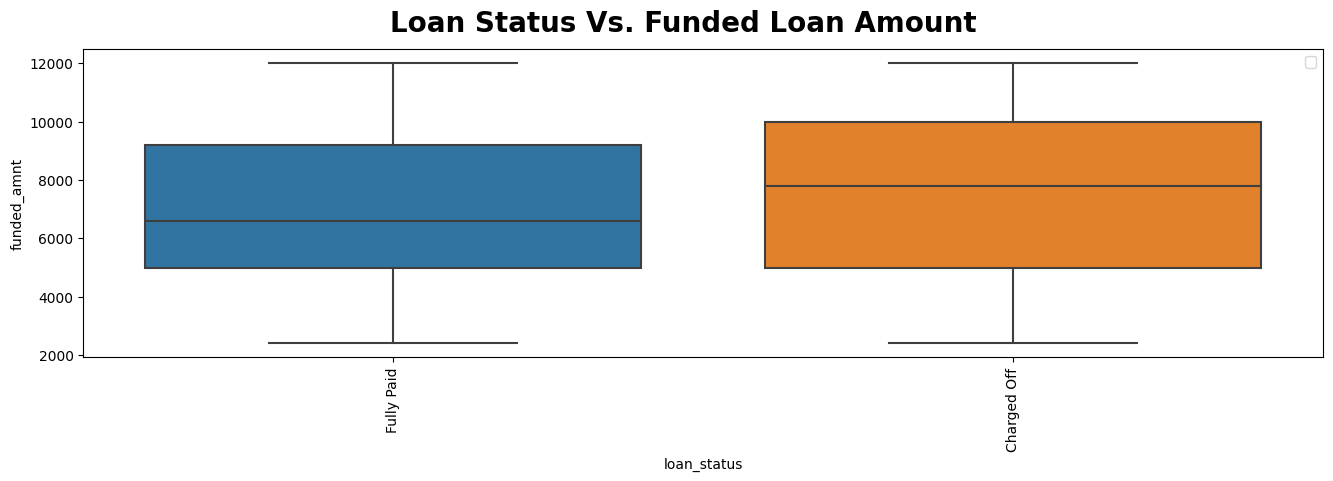

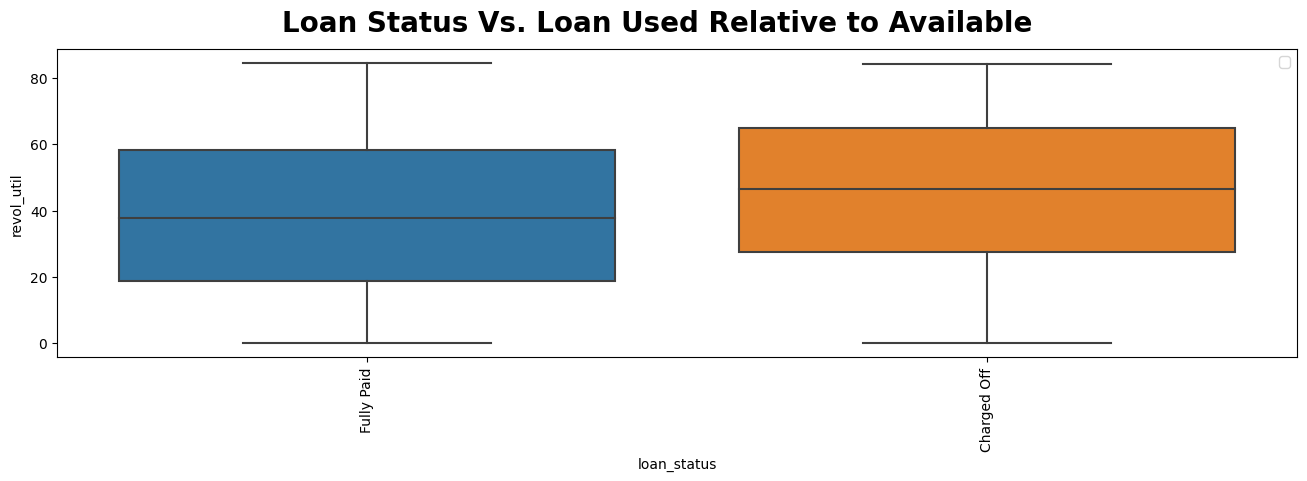

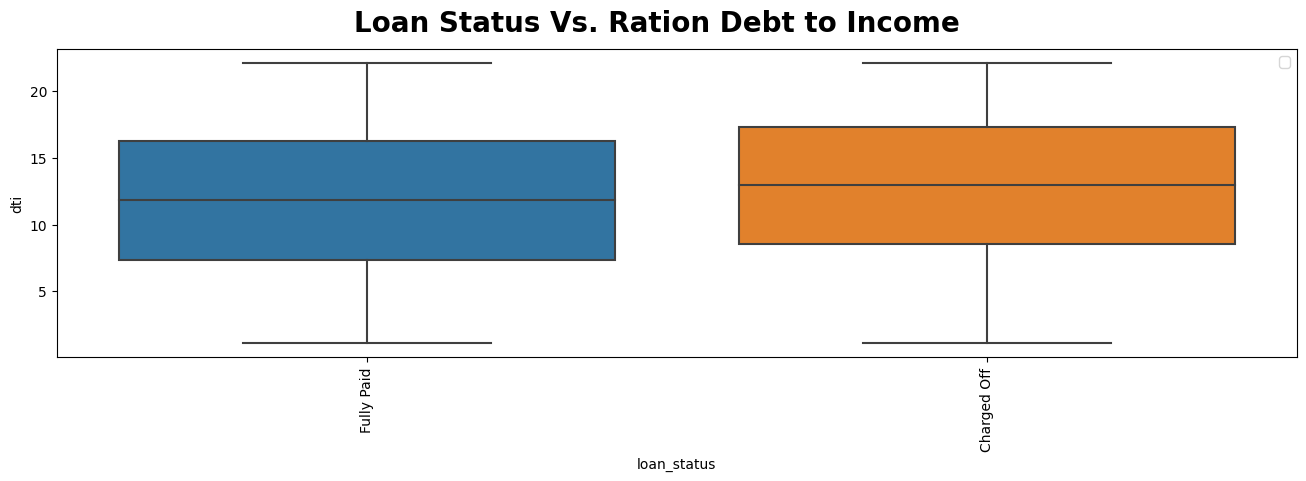

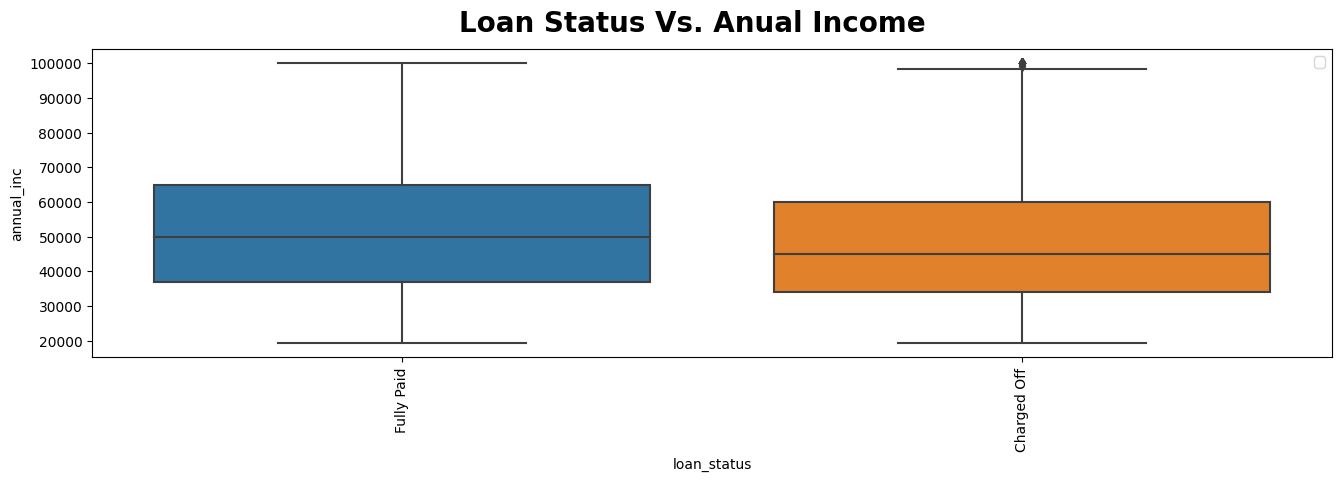

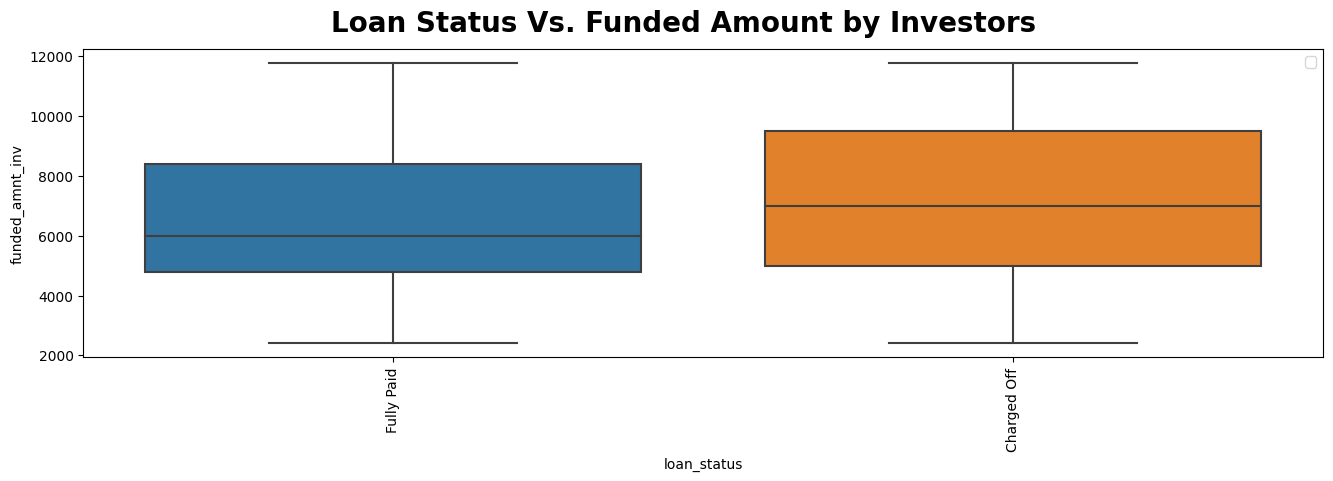

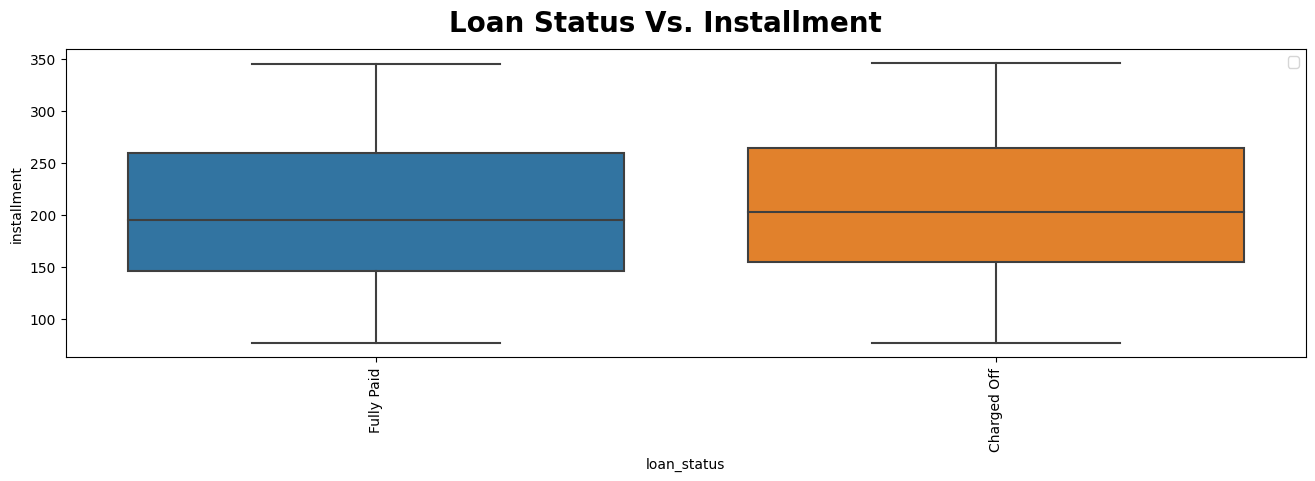

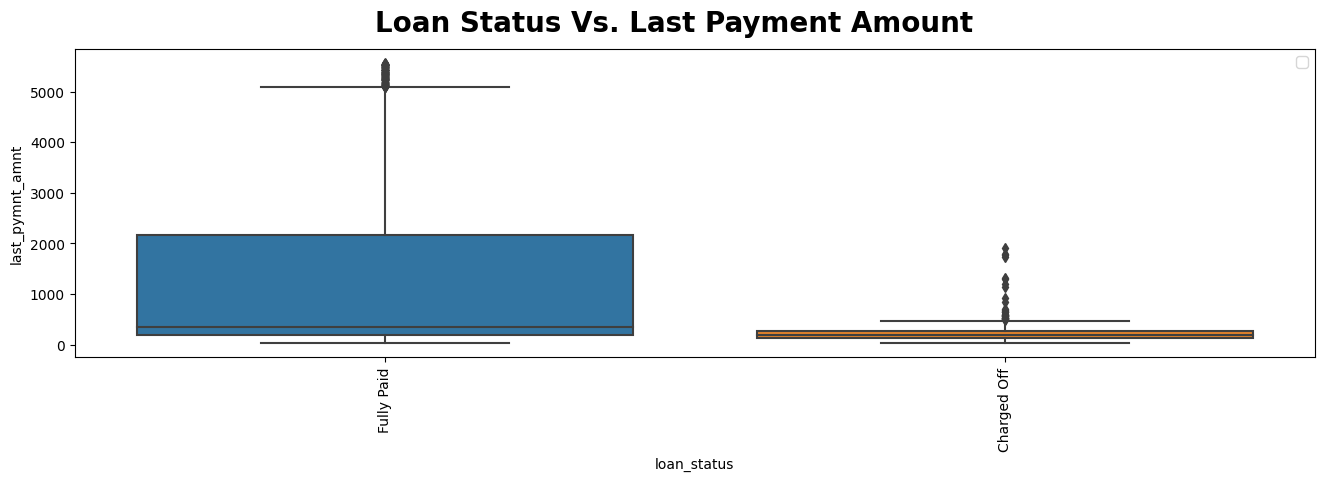

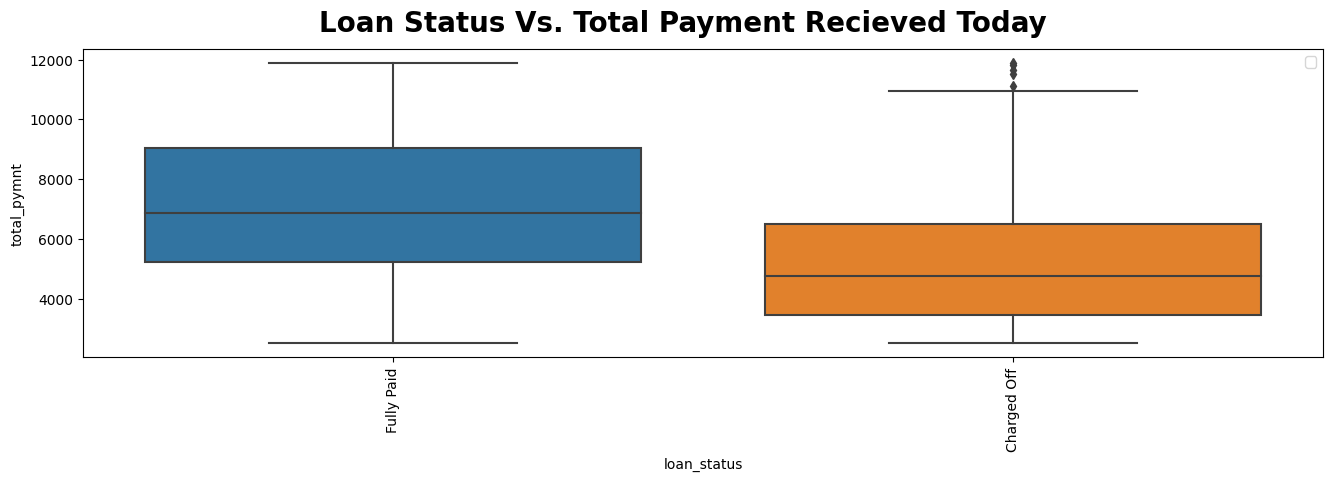

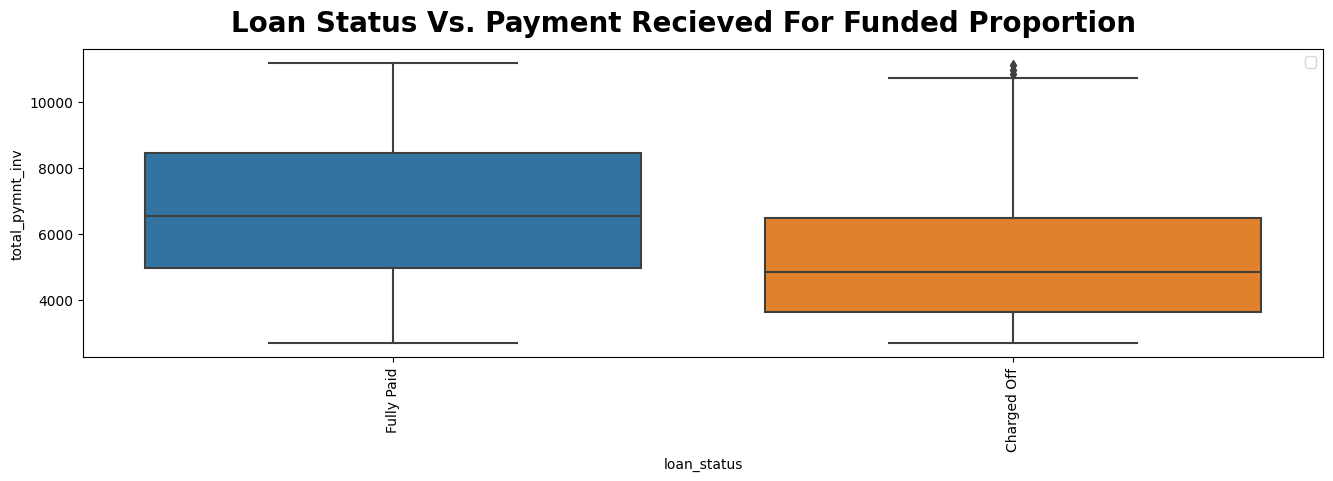

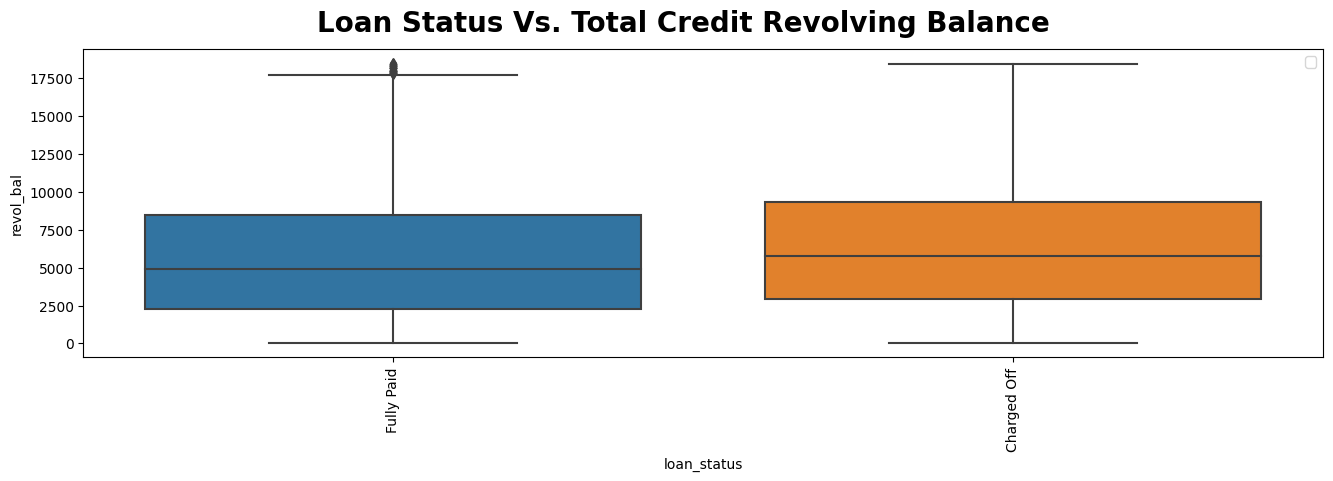

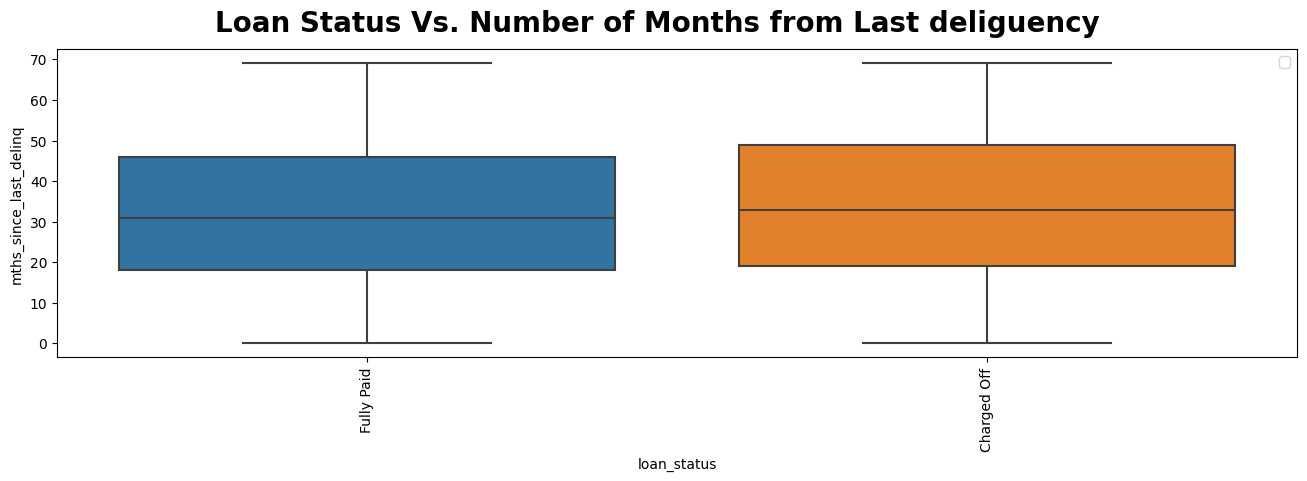

In [581]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

for k in distributionDict.keys():
  outlierRemoved = removeOutlier(df[distributionDict[k]], lowT=0.01, upT=0.95)
  df = df.loc[df[distributionDict[k]].isin(outlierRemoved),]
  segment_boxPlot(df, "loan_status", distributionDict[k], f"Loan Status Vs. {k}")

2.   **Number Public Record Bankrupcies Against All the Continues Variables we have**:

<IPython.core.display.Javascript object>

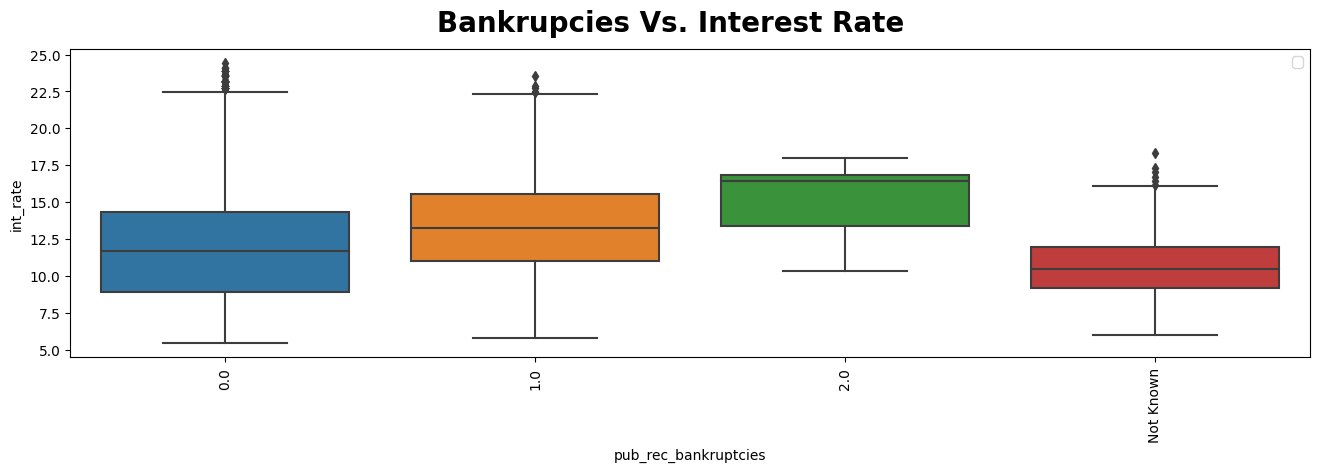

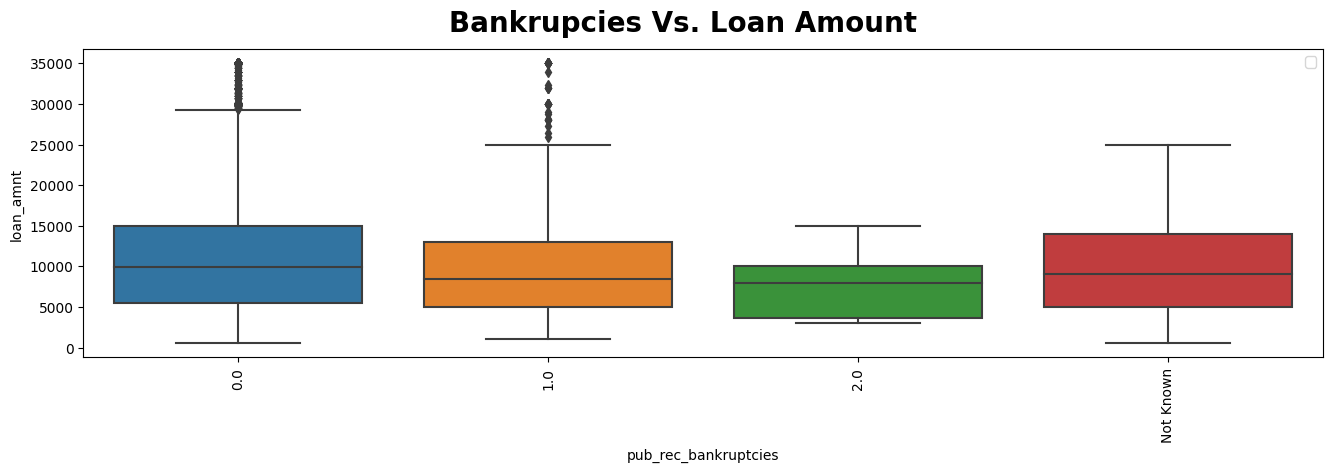

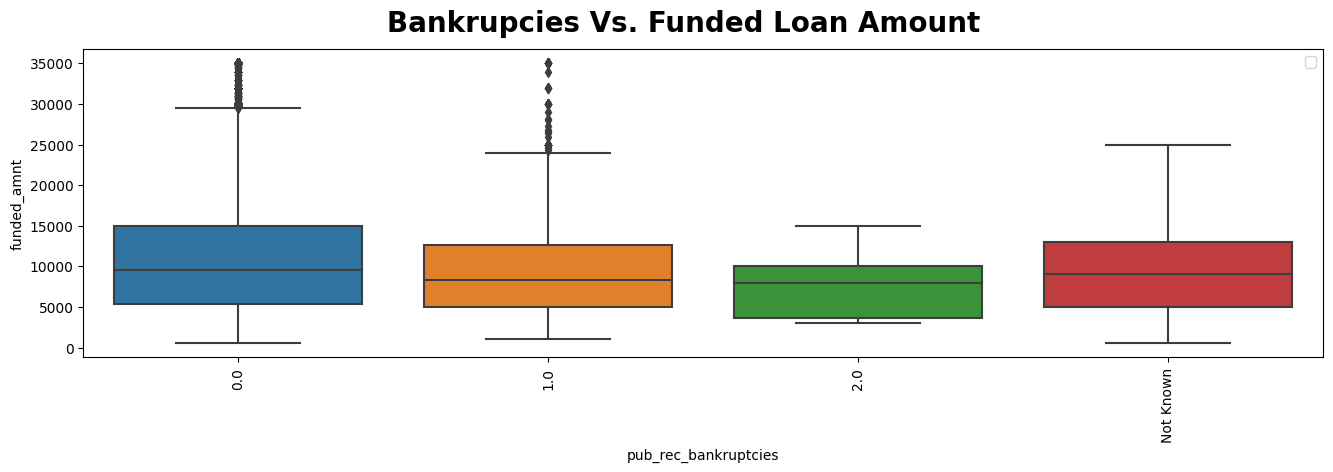

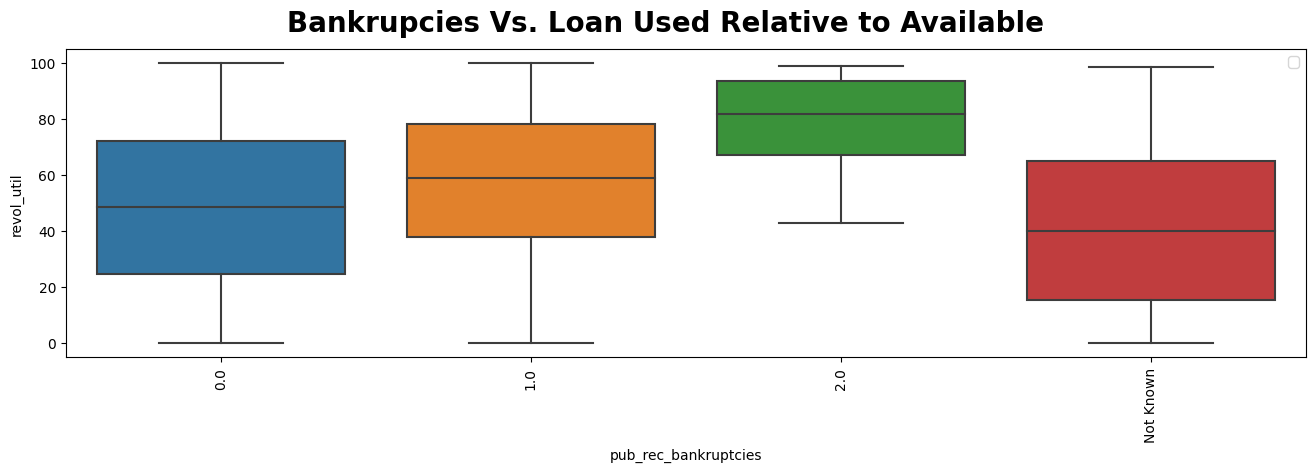

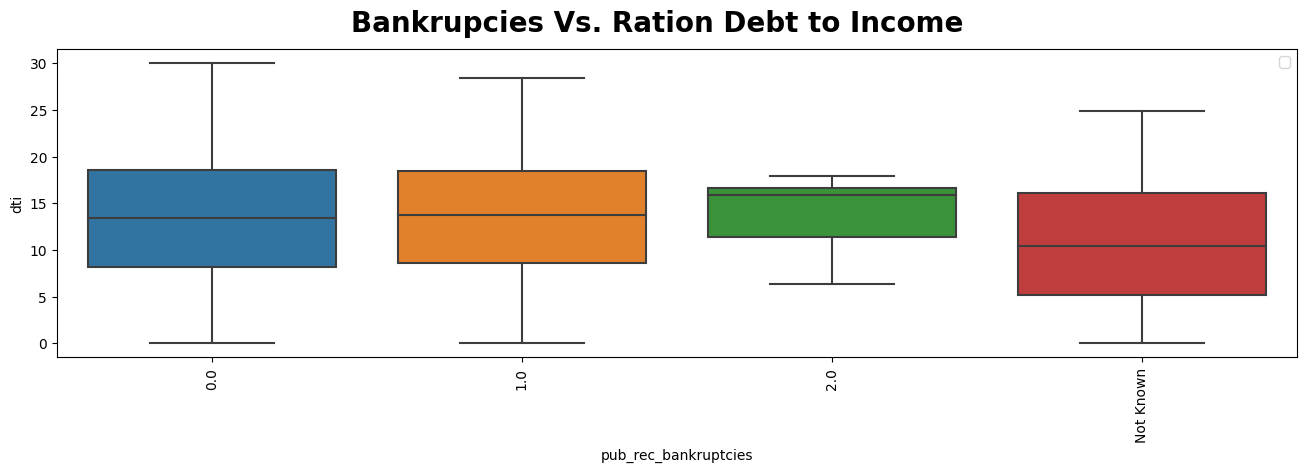

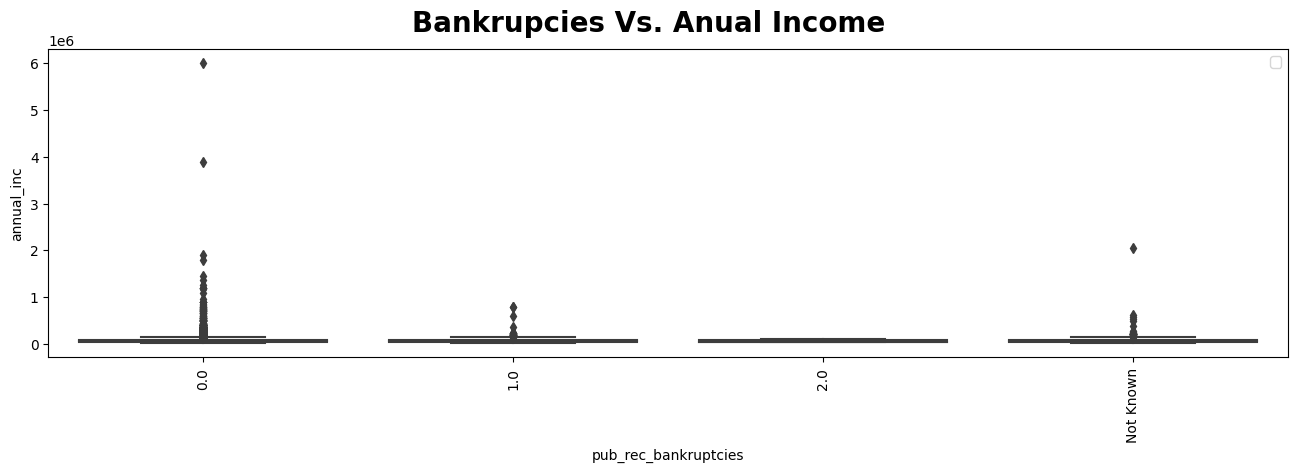

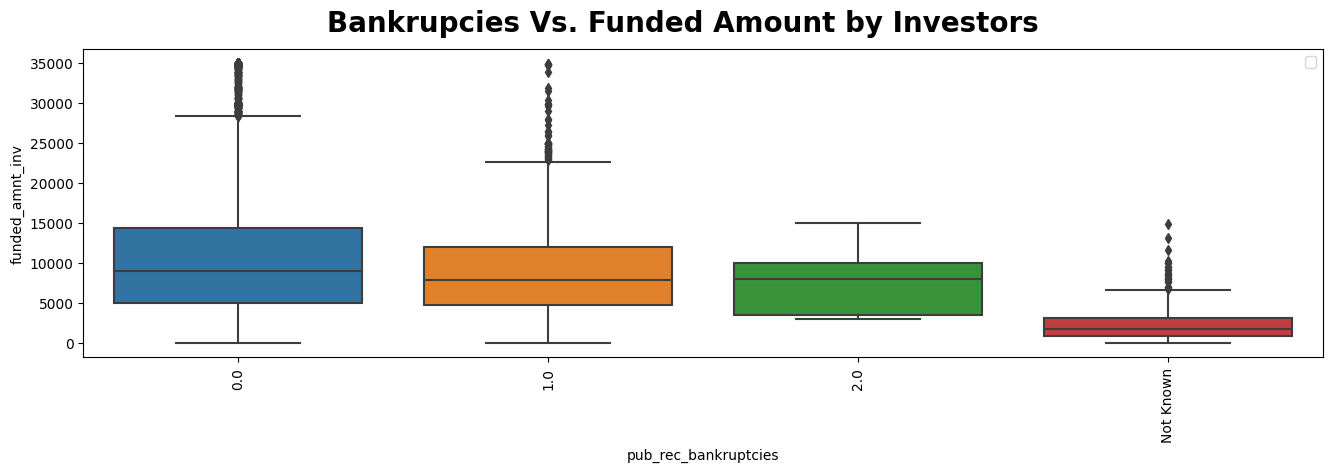

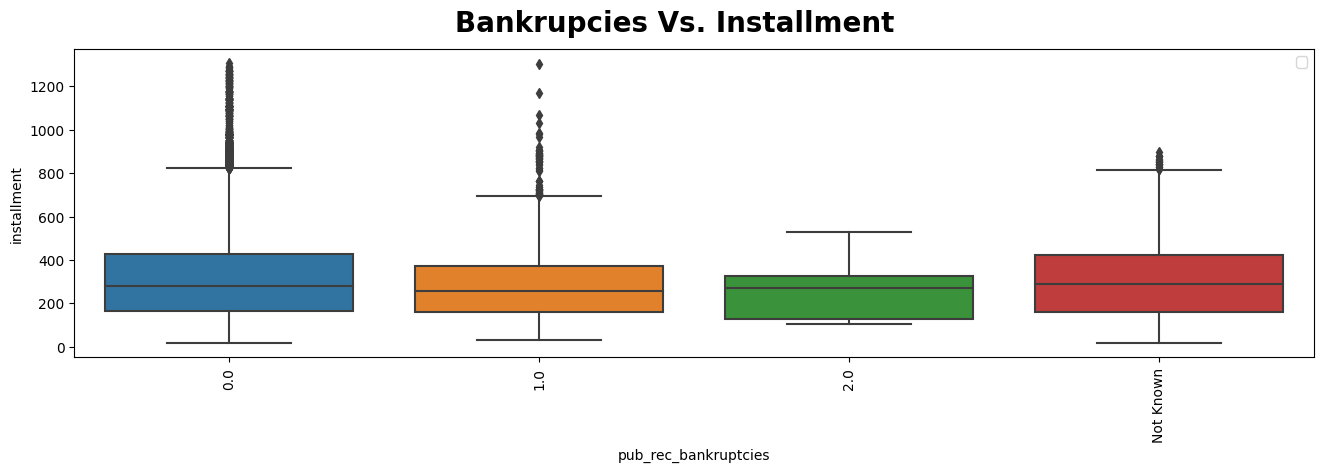

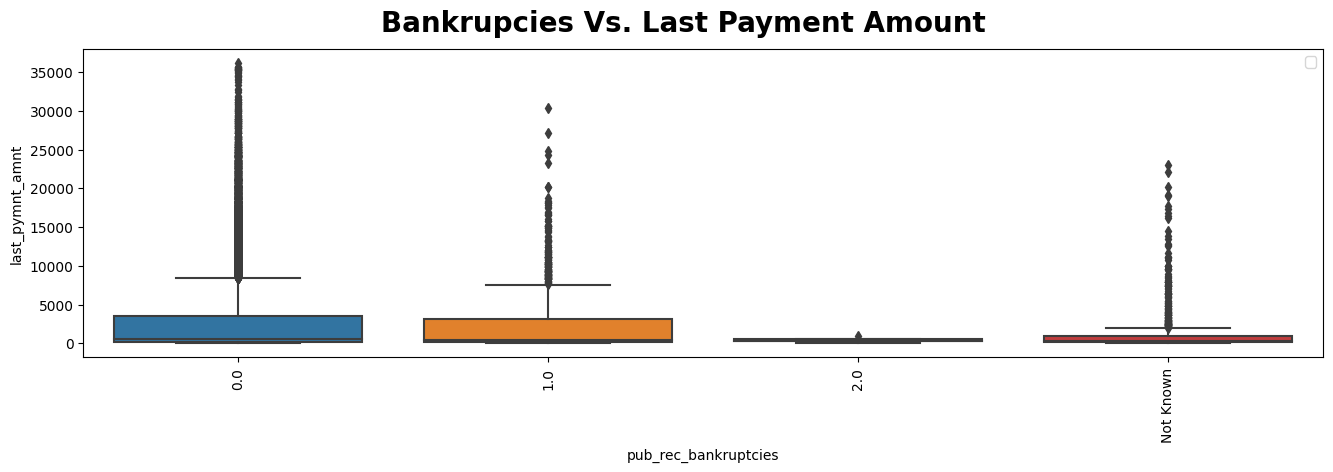

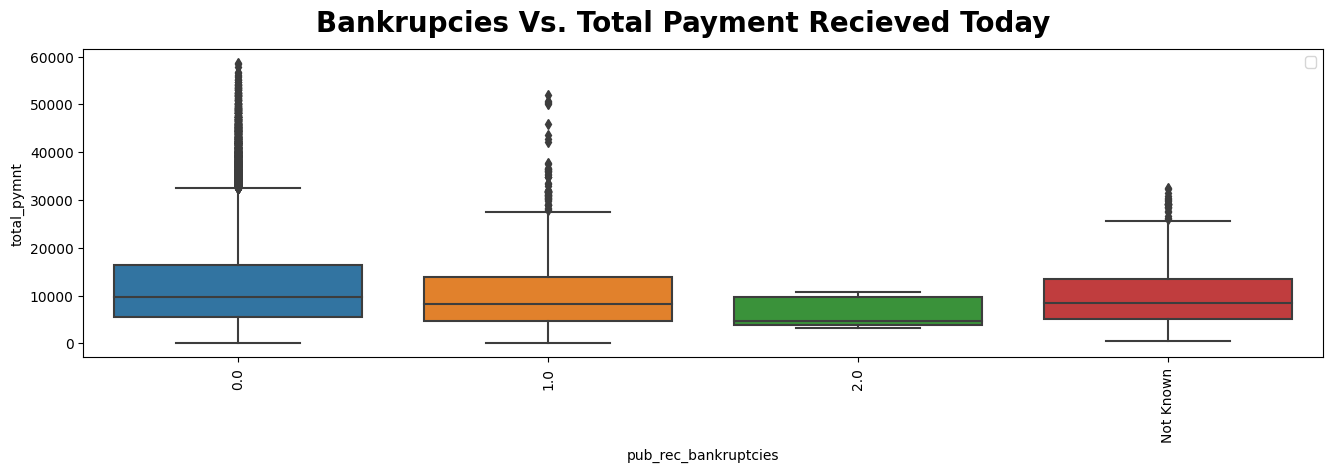

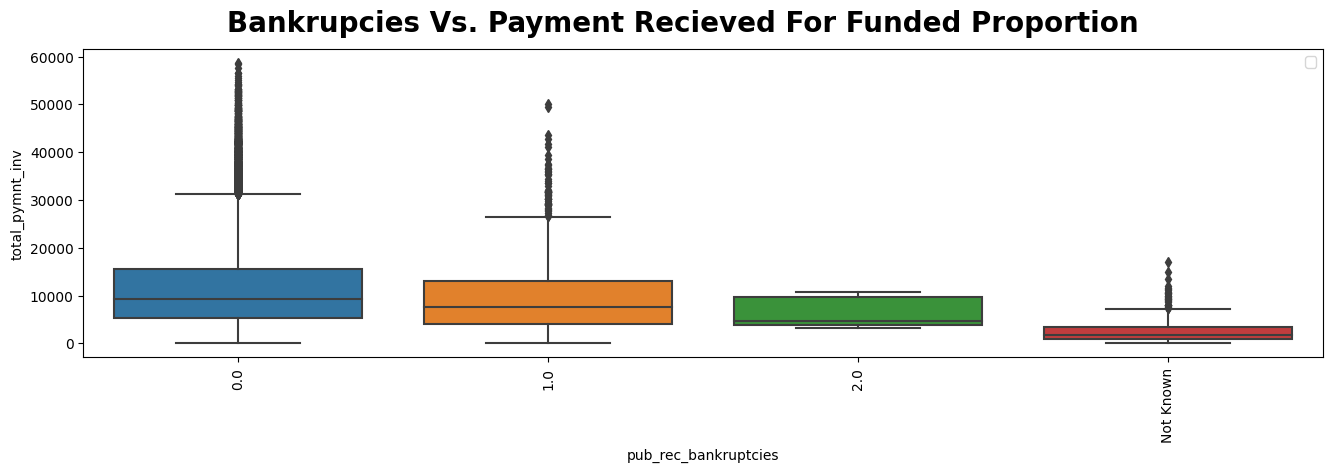

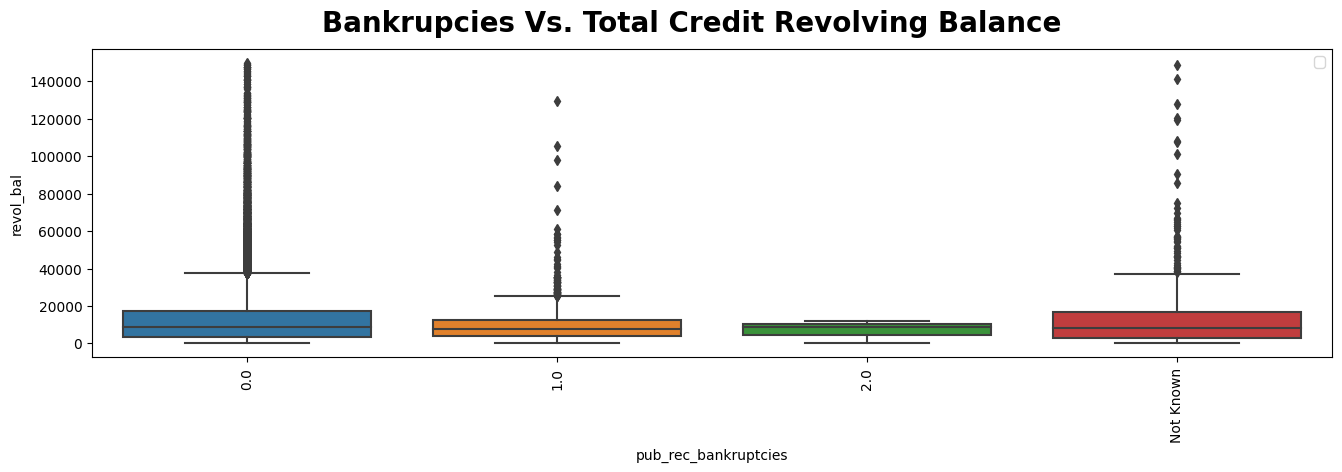

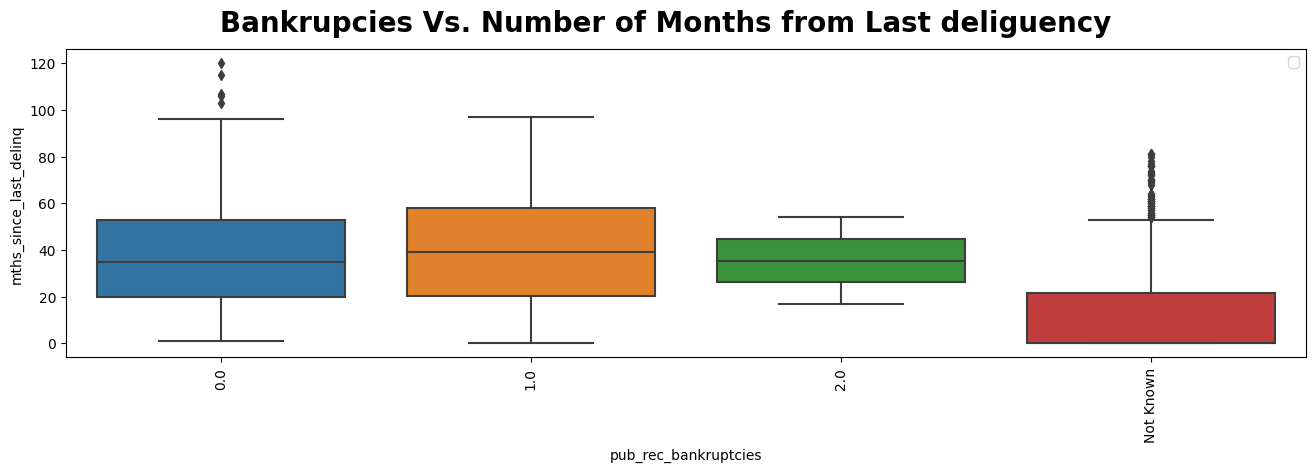

In [552]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

for k in distributionDict.keys():

  segment_boxPlot(df, "pub_rec_bankruptcies", distributionDict[k], f"Bankrupcies Vs. {k}")

In [ ]:
continuesDict

In [ ]:
df["revol_bal"].nunique()

In [ ]:
df.pub_rec_bankruptcies.value_counts()

In [ ]:
df.shape

Since the percentage of missing values in bankrupcy records and employment lenght is higher than 1% and there isn't any overlap between these two columns for missing values this is probably better to find a way to find to fill these missing values. We can check it later in **segmented univariate analysis**.

# **Bivariate Analysis**

In [540]:
def bivar_barplot(data, x, col, title):
  plt.figure(figsize=(16,4))
  newdf = data[[x, col]].groupby([x, col], as_index=False).value_counts()
  newdf[f'proportion {col}'] = newdf[["count", col]].groupby([col]).transform(lambda x: x/x.sum())

  sns.barplot(x=x, y=f'proportion {col}', hue=col, data=newdf)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend(loc='upper right',fontsize=10)
  plt.show()

<IPython.core.display.Javascript object>

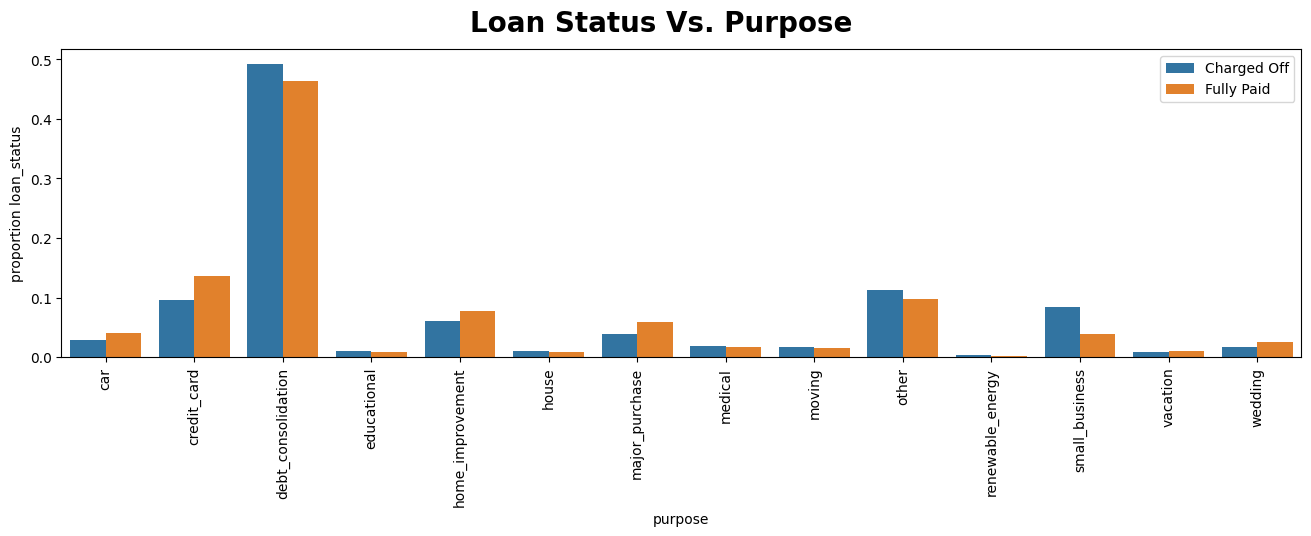

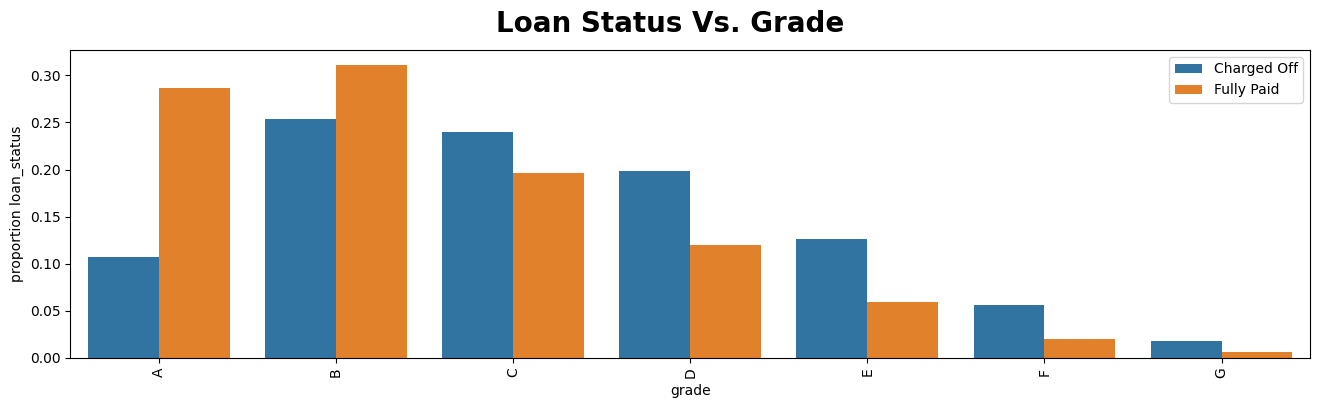

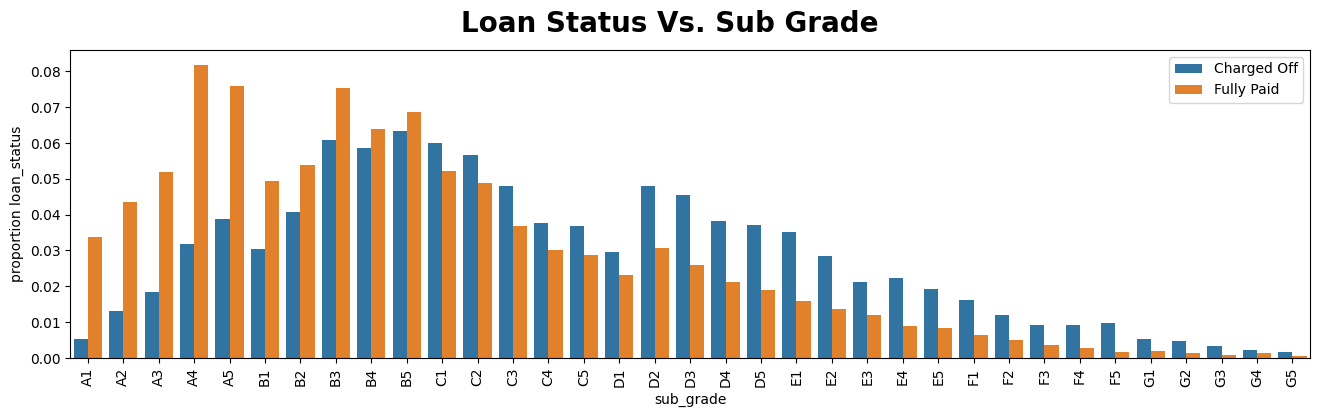

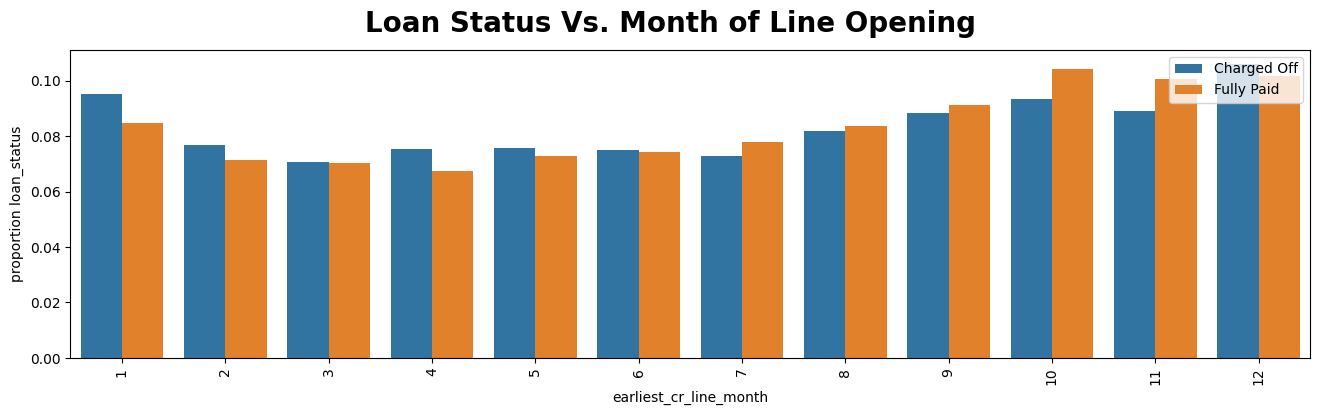

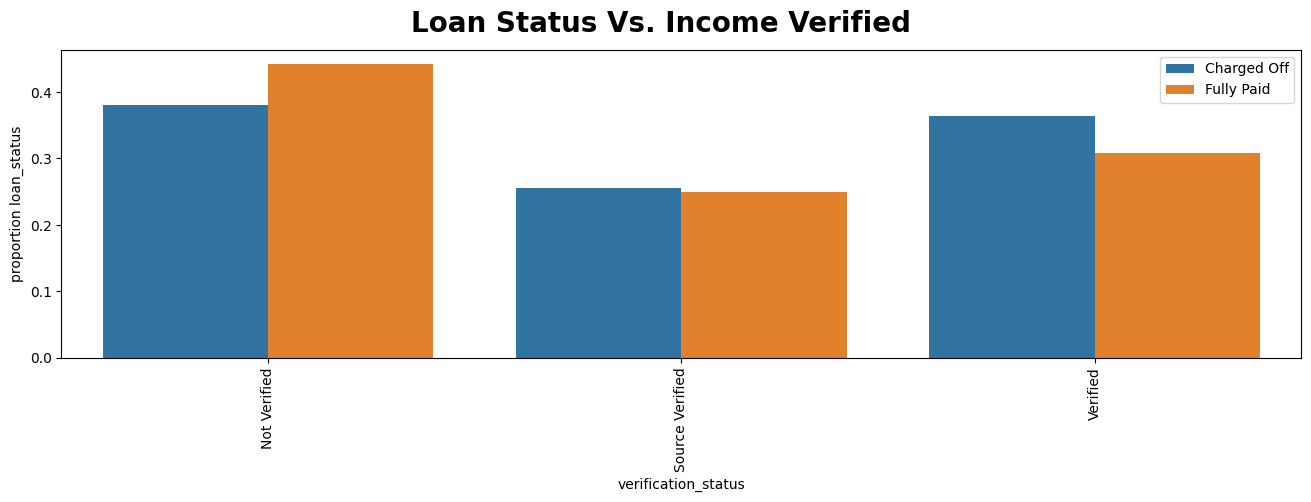

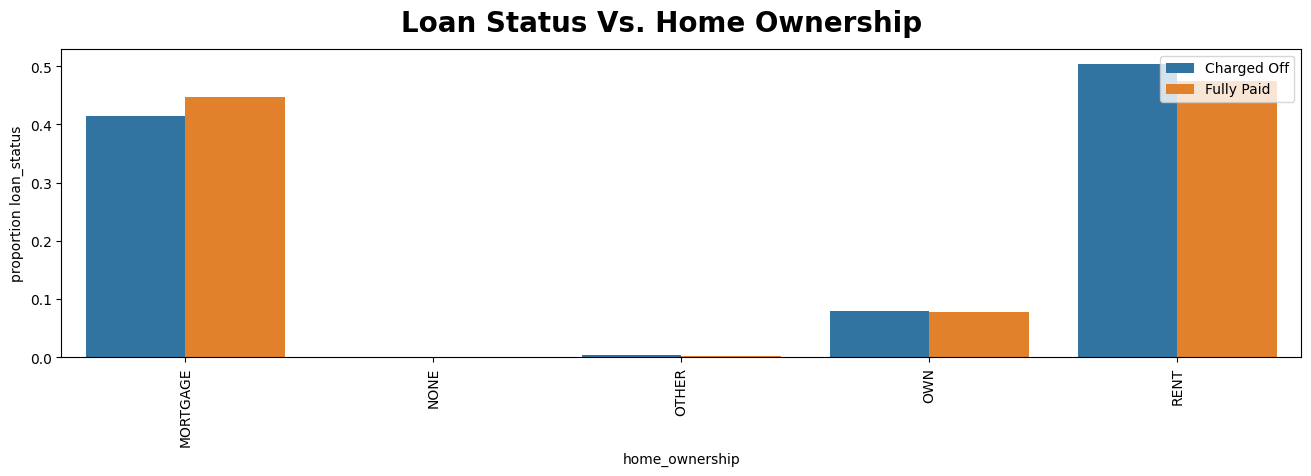

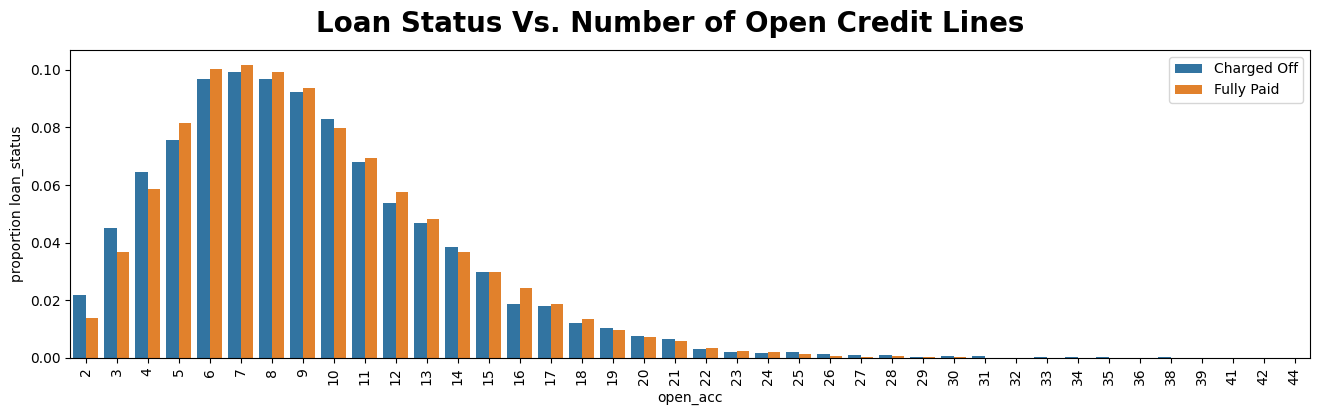

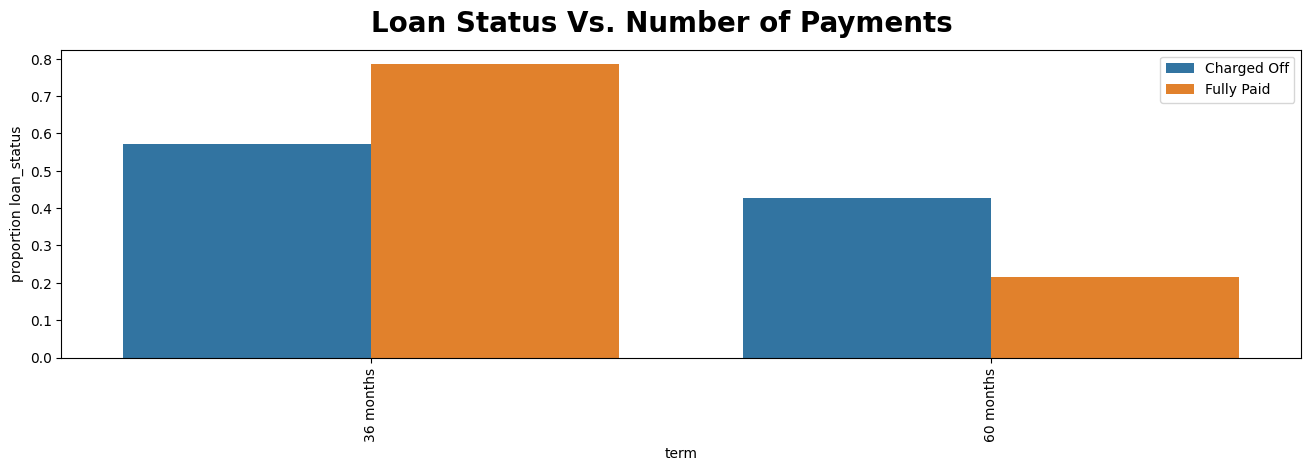

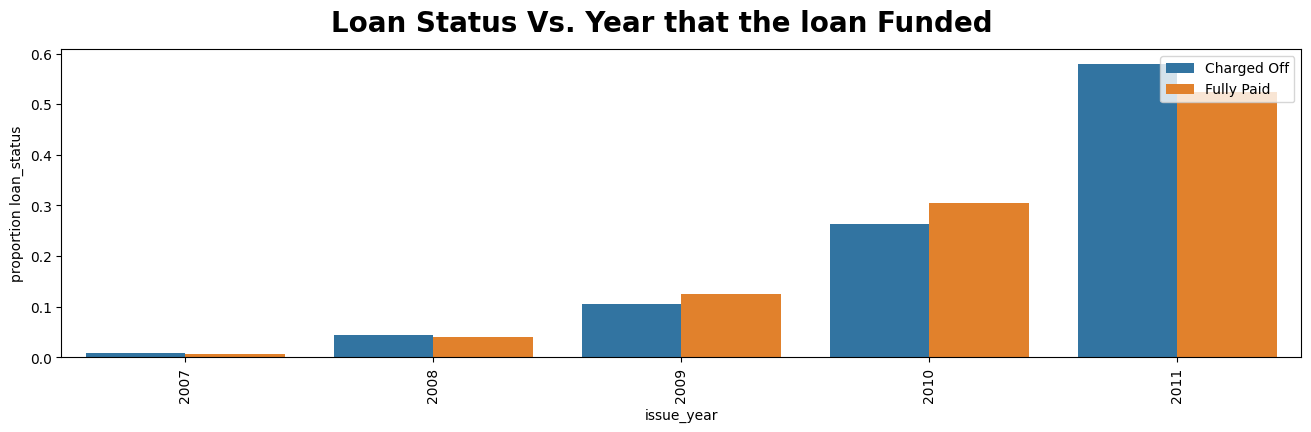

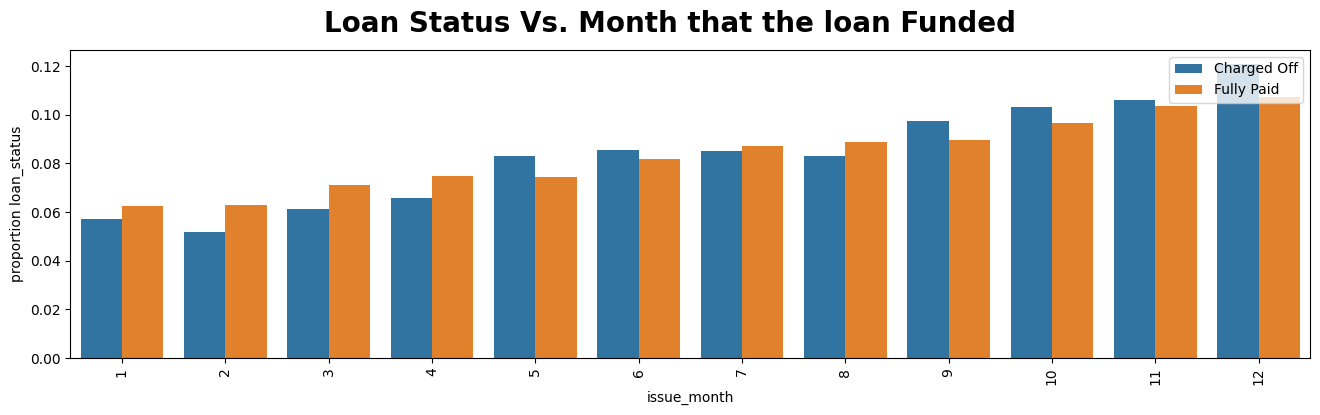

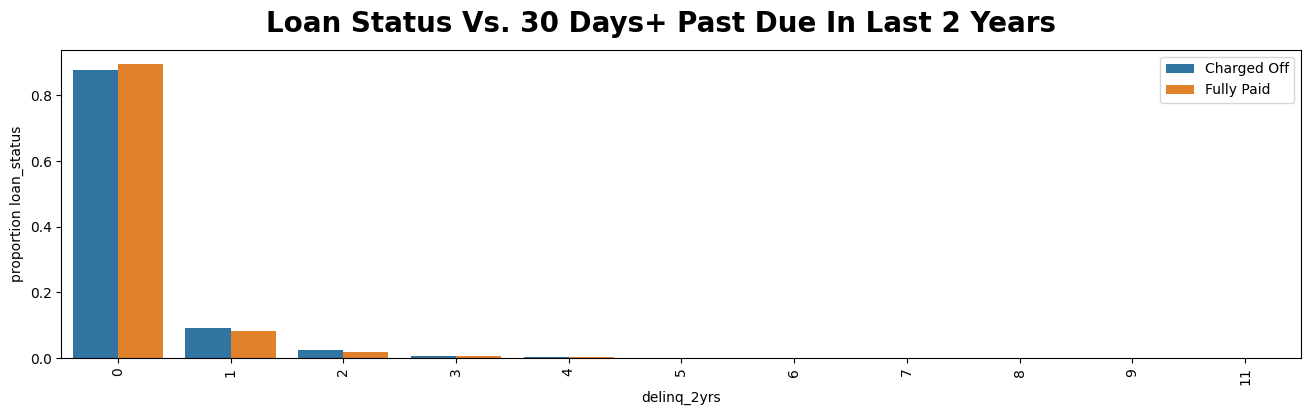

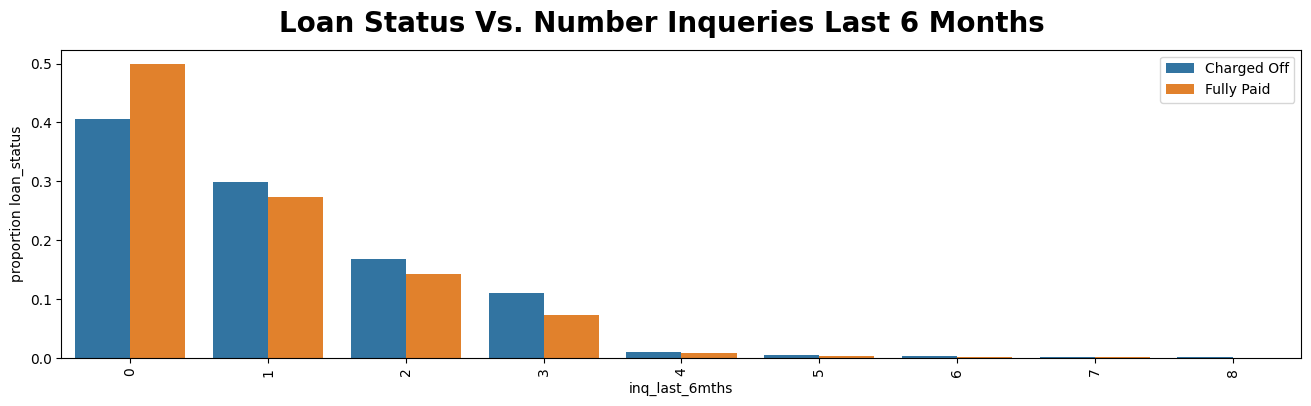

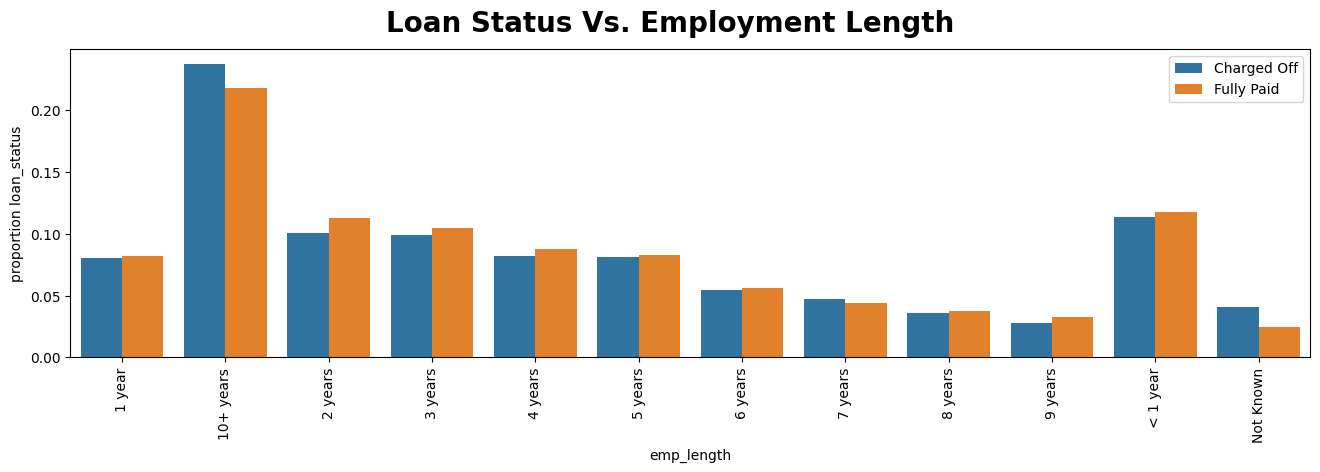

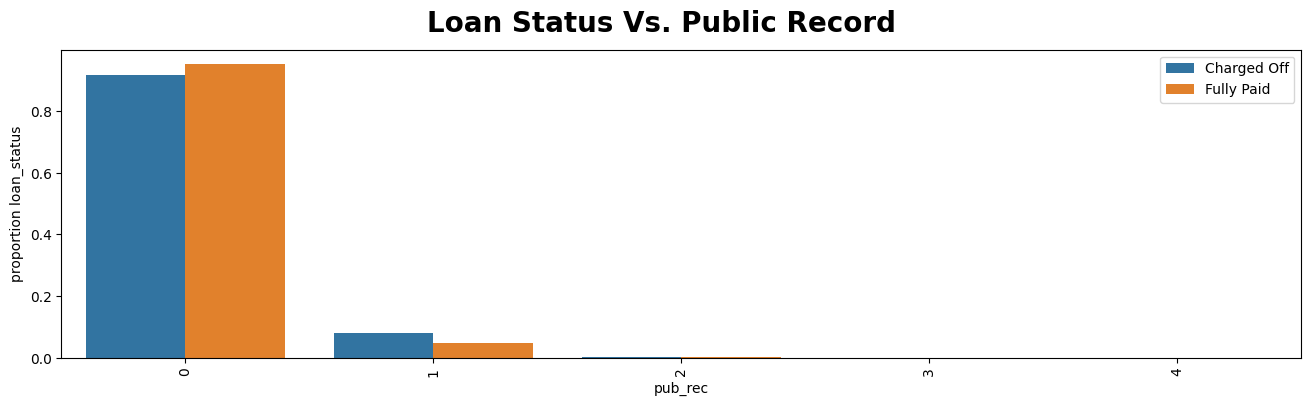

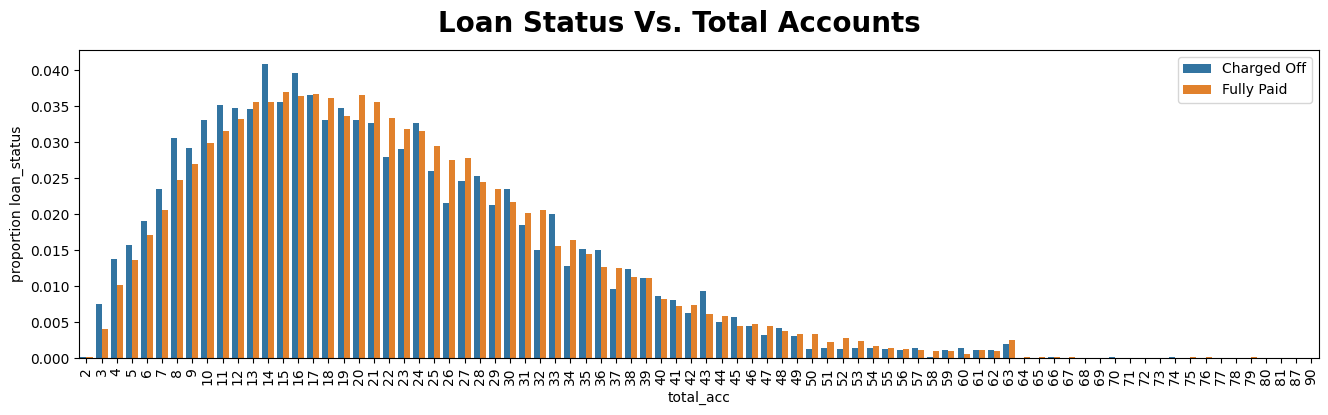

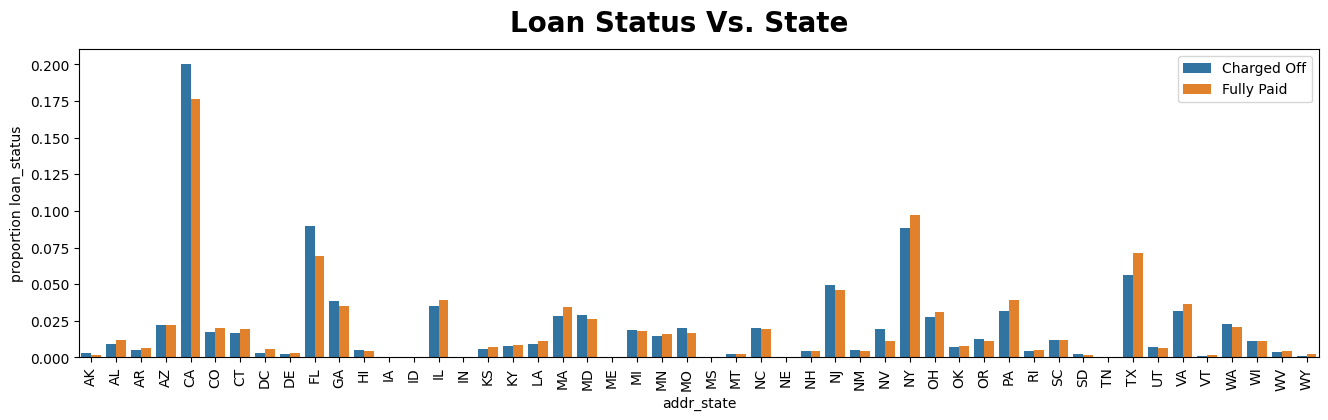

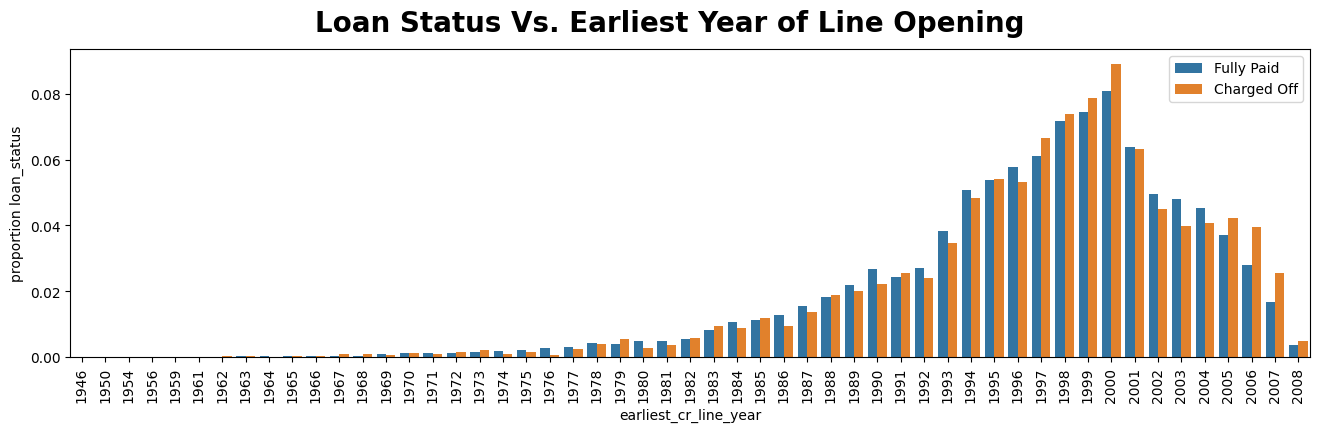

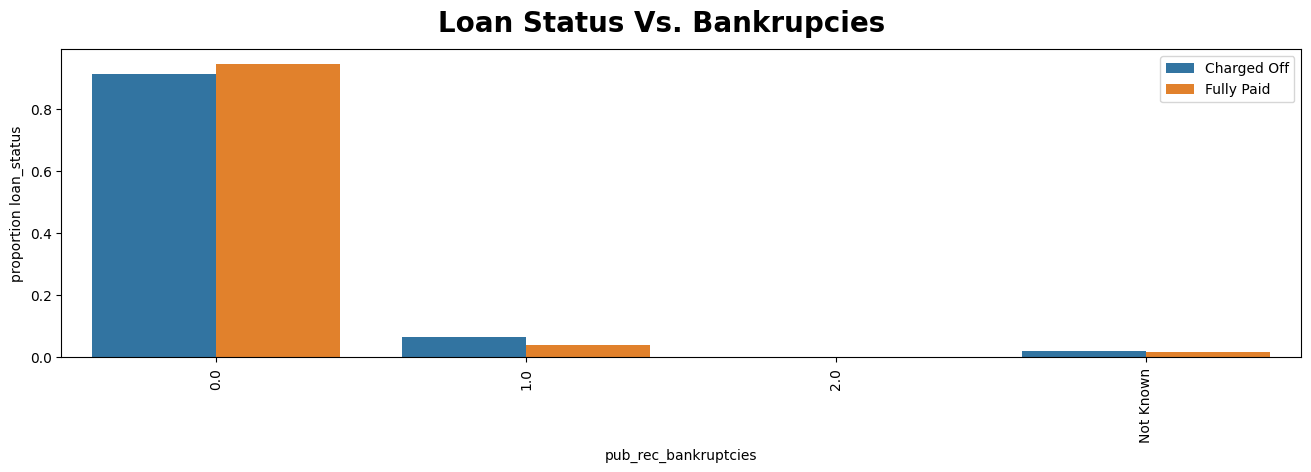

In [541]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict3 = {"Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec",
                    "Total Accounts": "total_acc", "State": "addr_state",
                   "Earliest Year of Line Opening":"earliest_cr_line_year",
                   "Number of Open Credit Lines":"open_acc",
                   "Employment Length":"emp_length",
                    "Bankrupcies": "pub_rec_bankruptcies",
                    "Public Record":"pub_rec"}

for k in categoricalDict3.keys():
  bivar_barplot(df, categoricalDict3[k], "loan_status", f"Loan Status Vs. {k}")


<IPython.core.display.Javascript object>

loan_status


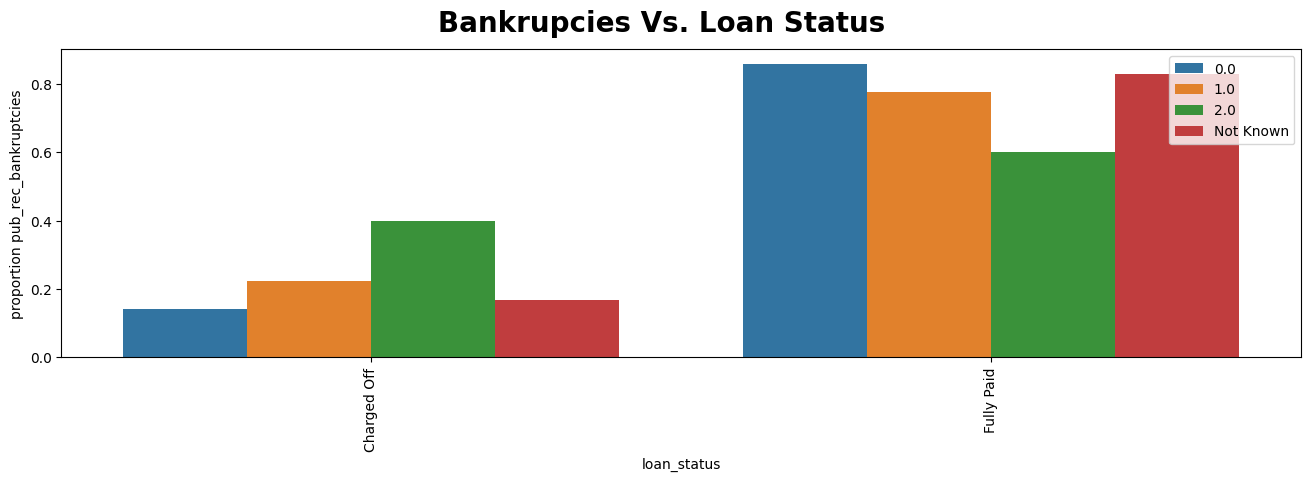

purpose


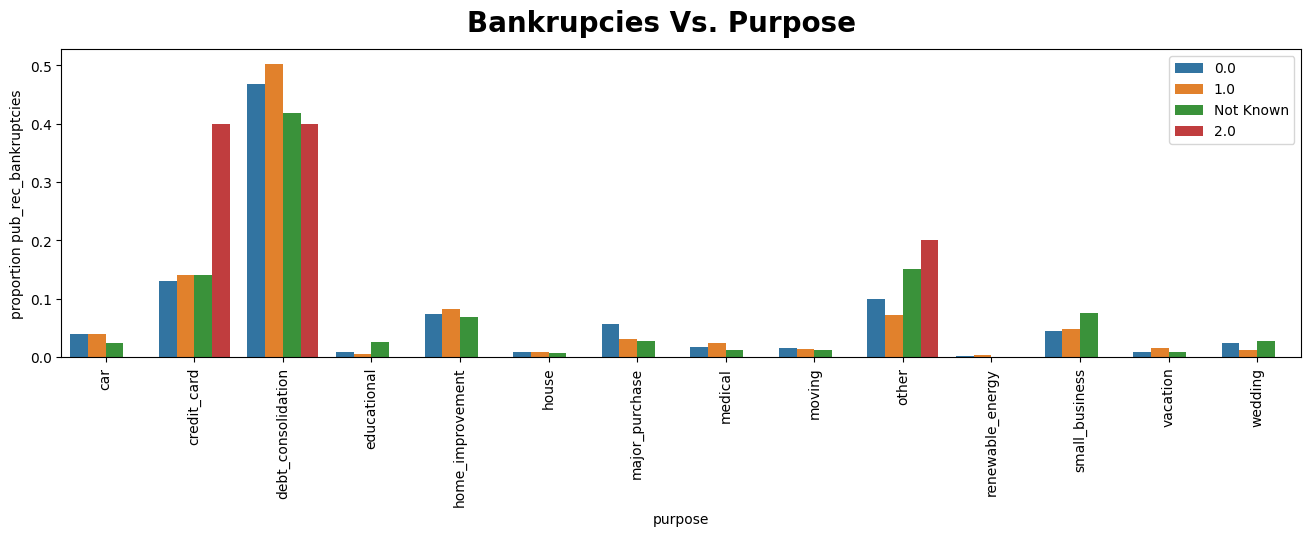

grade


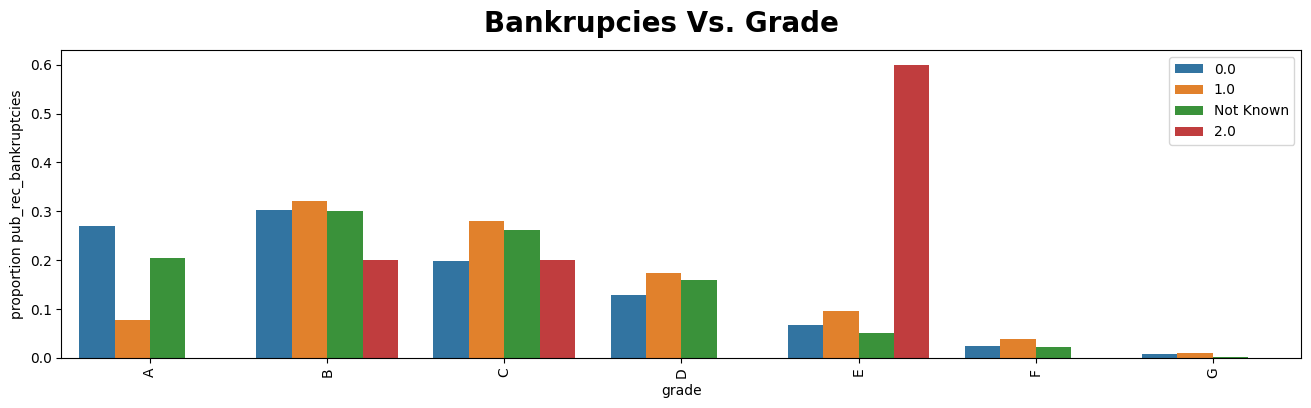

sub_grade


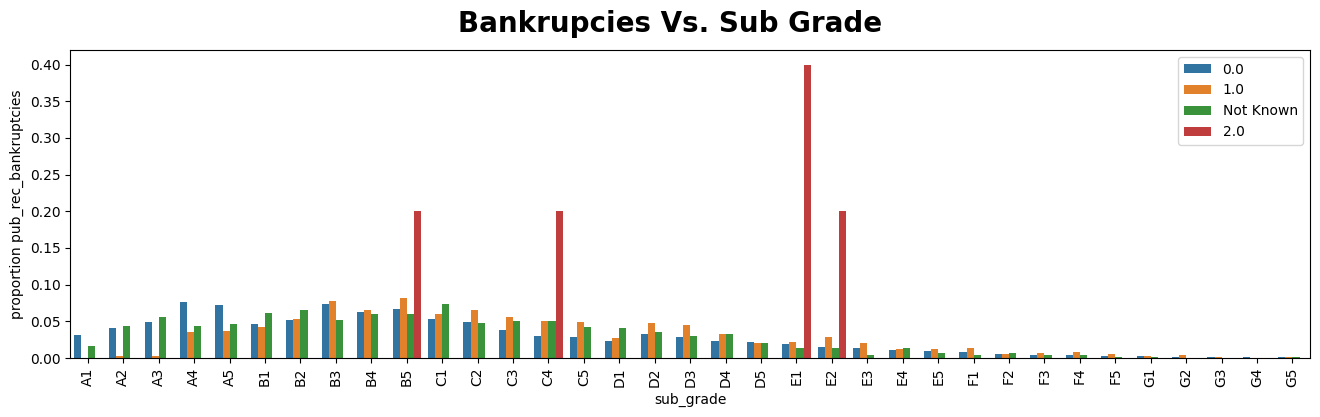

earliest_cr_line_month


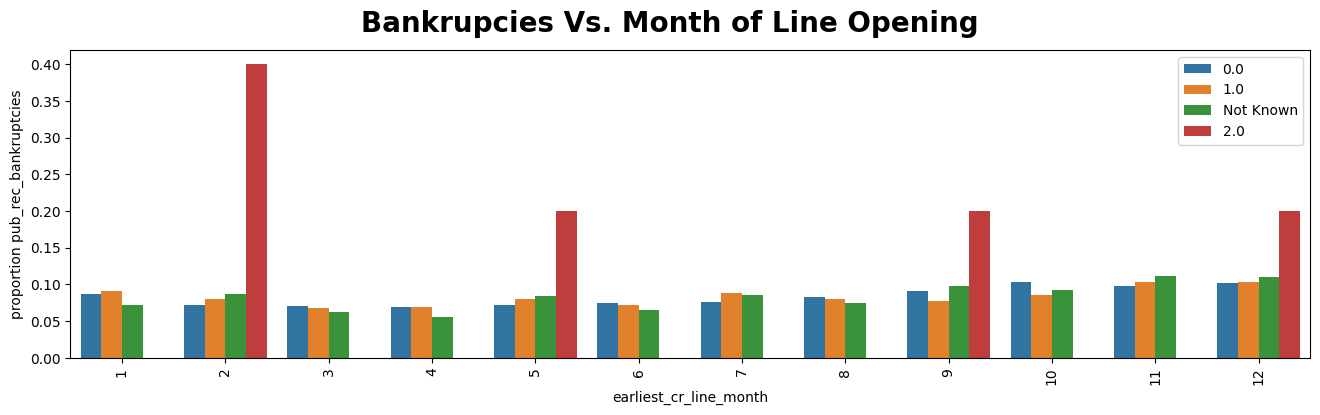

verification_status


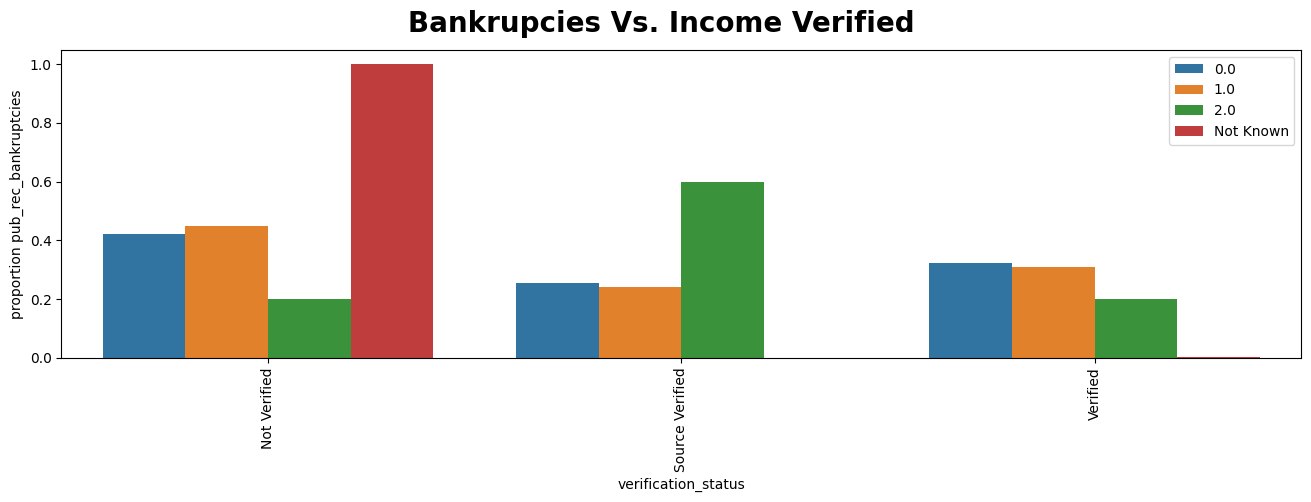

home_ownership


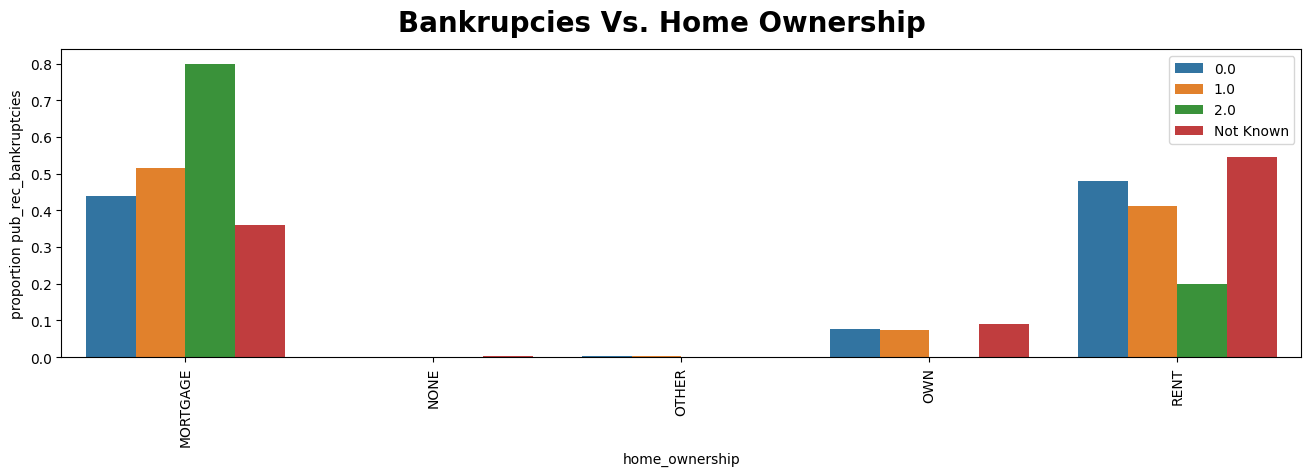

open_acc


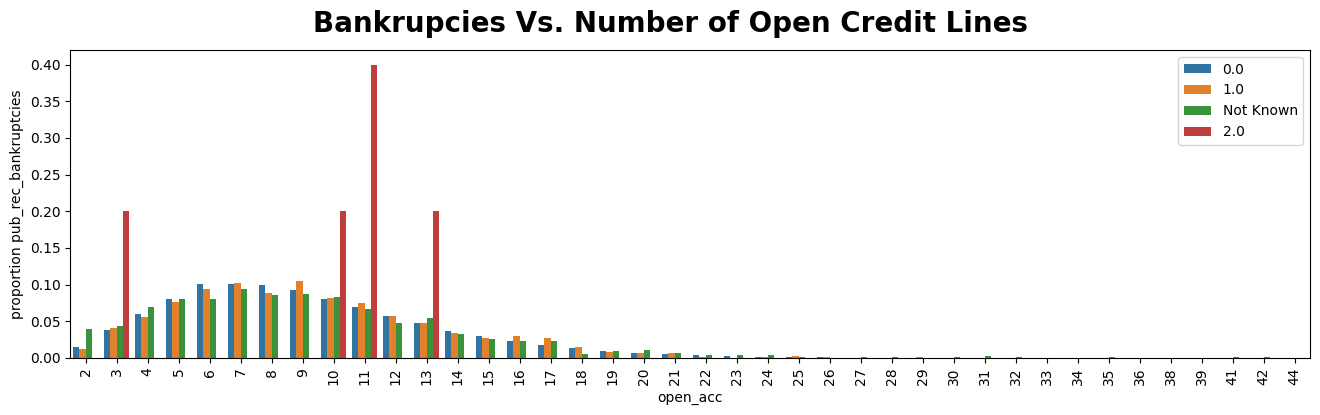

term


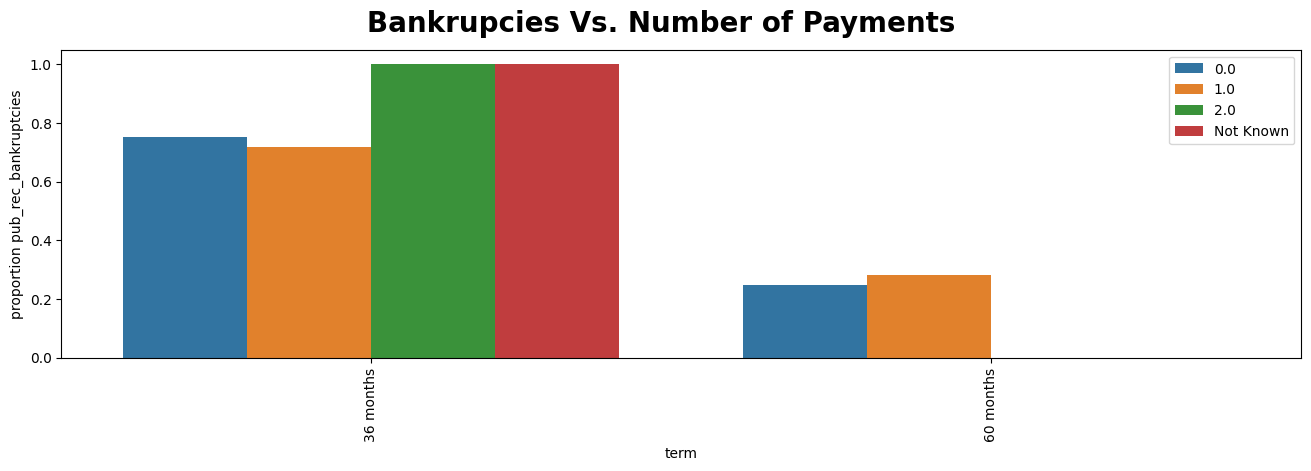

issue_year


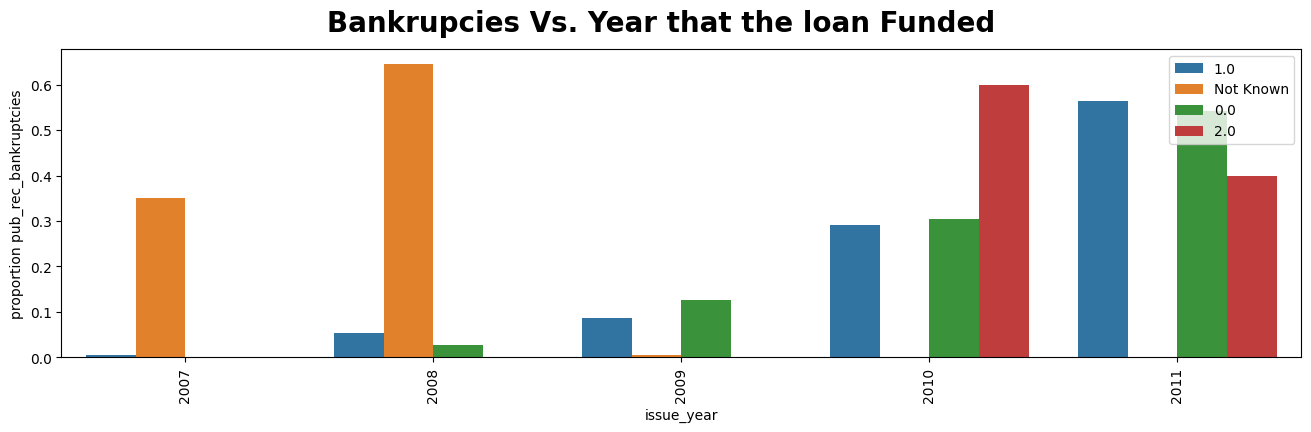

issue_month


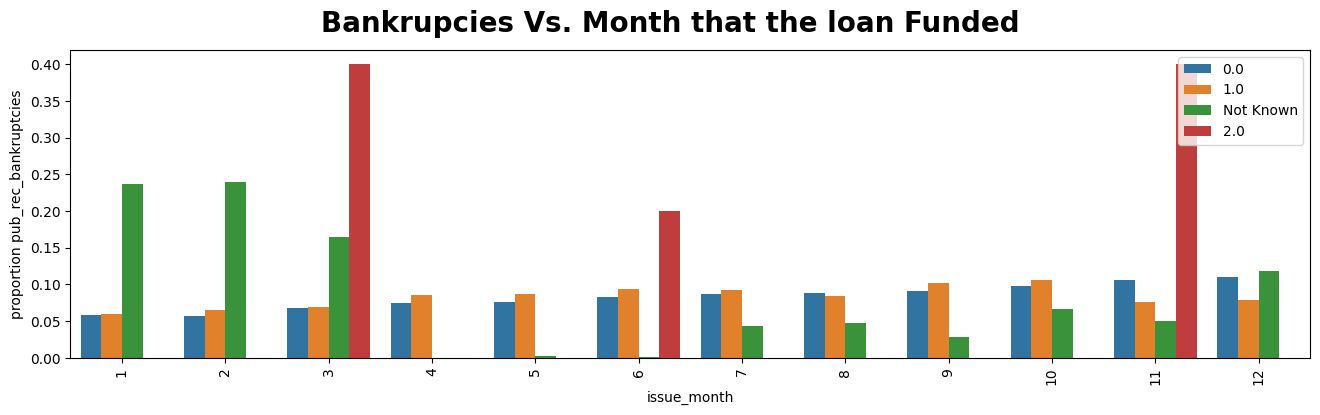

delinq_2yrs


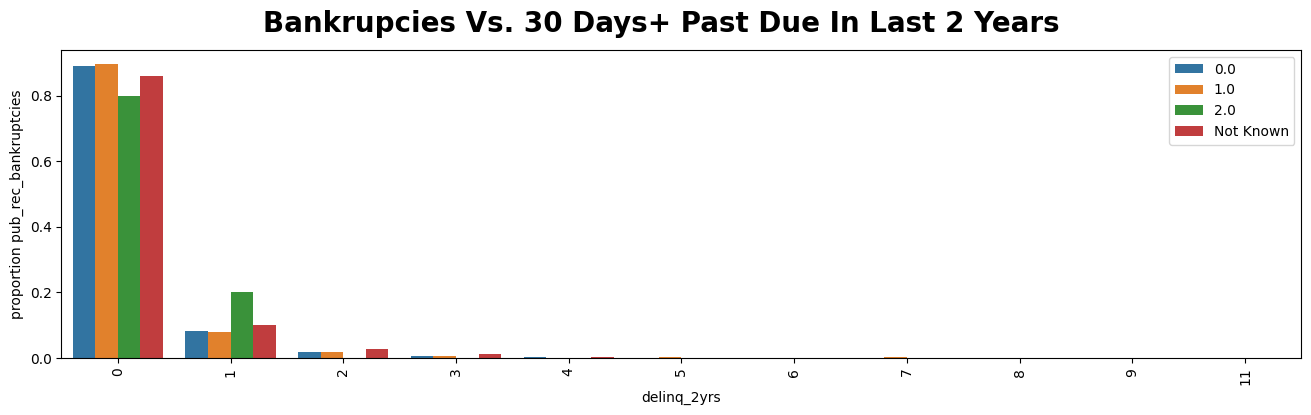

inq_last_6mths


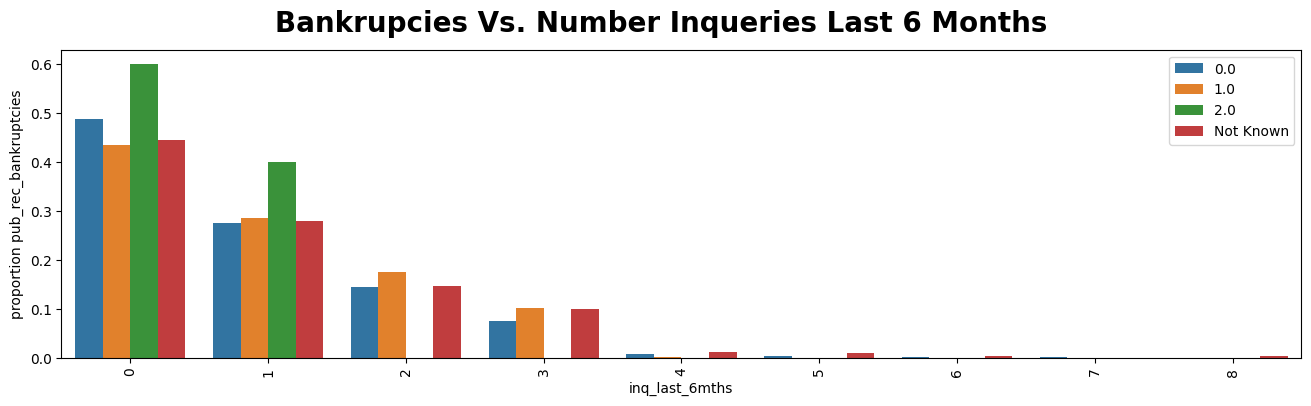

emp_length


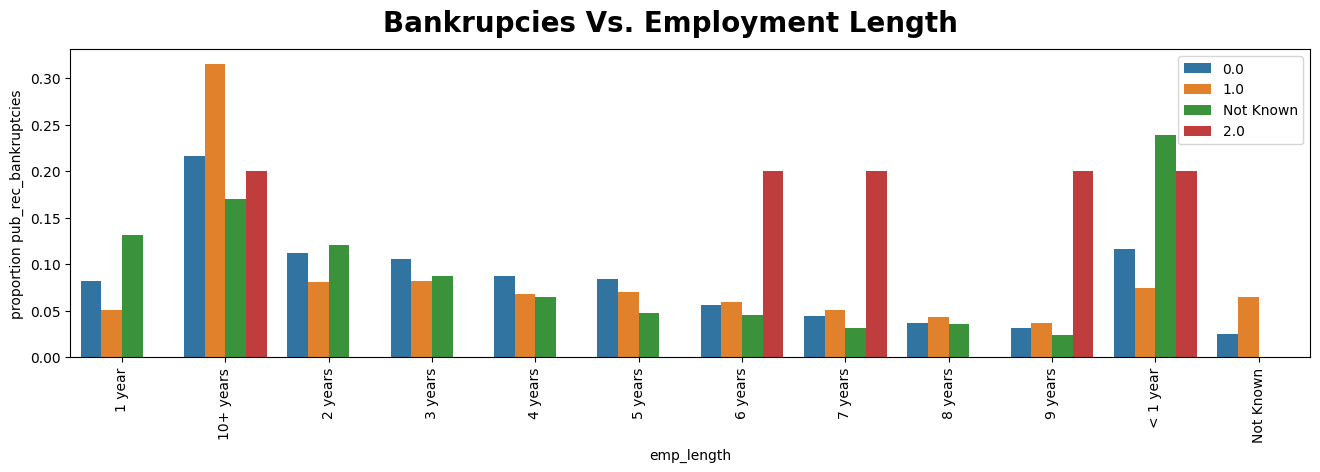

pub_rec


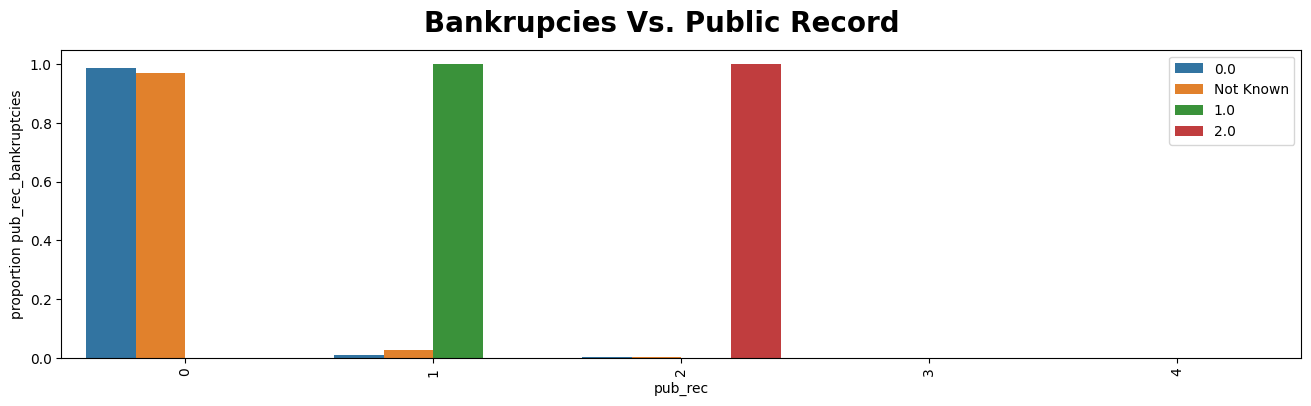

total_acc


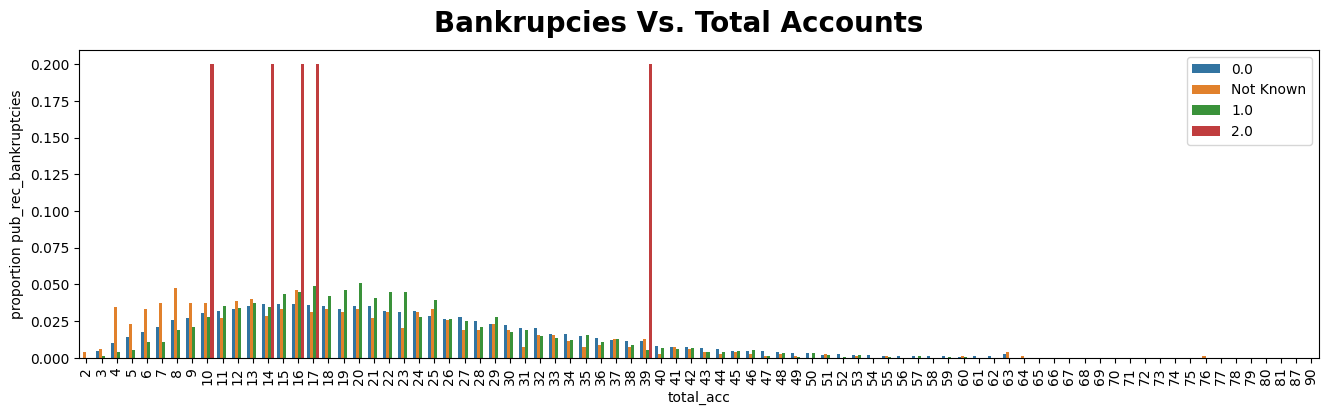

addr_state


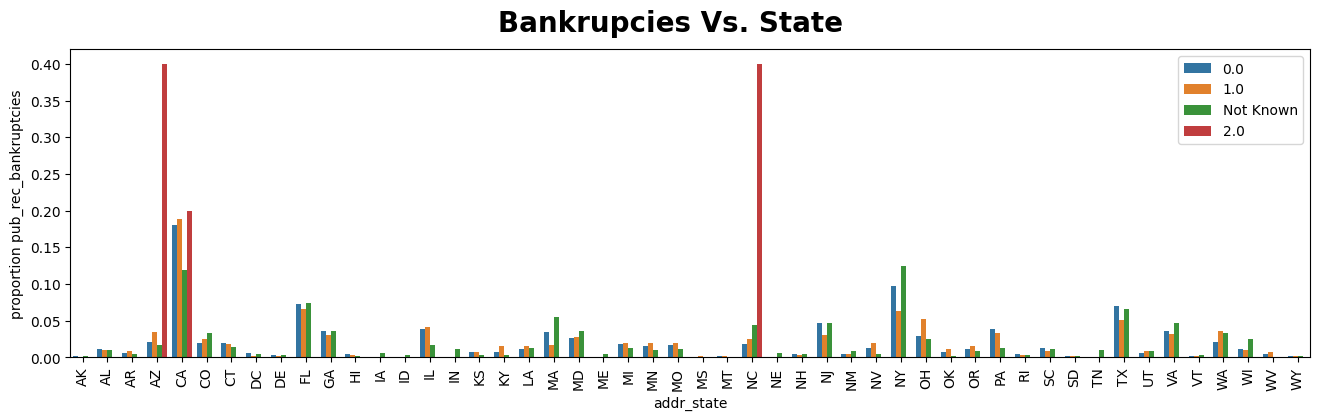

earliest_cr_line_year


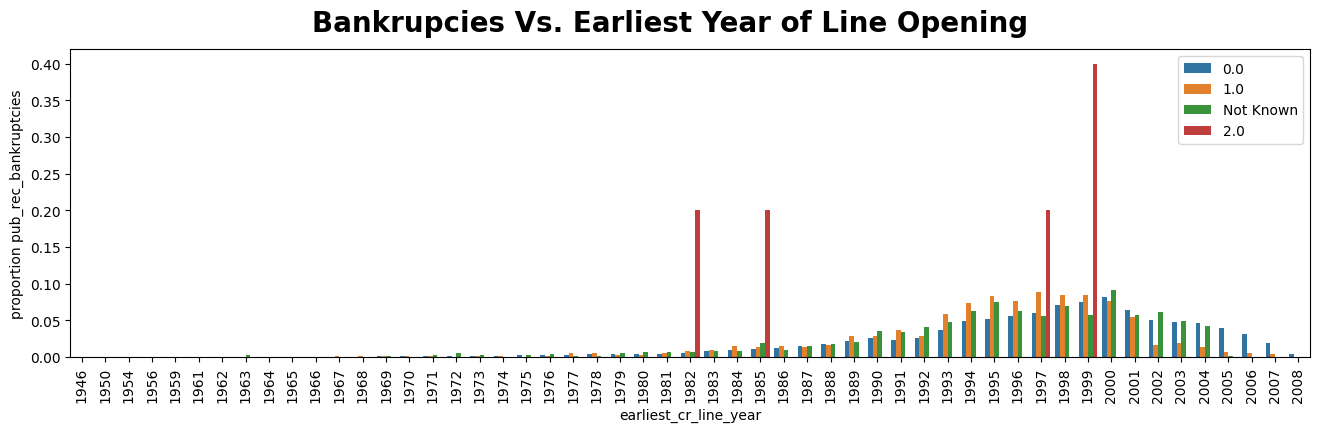

In [542]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict4 = {"Loan Status":"loan_status" , "Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec",
                    "Total Accounts": "total_acc", "State": "addr_state",
                   "Earliest Year of Line Opening":"earliest_cr_line_year",
                   "Number of Open Credit Lines":"open_acc",
                   "Employment Length":"emp_length",
                    "Public Record":"pub_rec"}

for k in categoricalDict4.keys():
  print(categoricalDict4[k])
  bivar_barplot(df, categoricalDict4[k], "pub_rec_bankruptcies", f"Bankrupcies Vs. {k}")


Correlation Analysis